In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
T_data=pd.read_csv(r"C:\Users\ARADHYA\Music\train.csv",encoding='unicode_escape')
T_data.head()

Id   Open Date         City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012        Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009    Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [3]:
print(T_data.info())
print(T_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [4]:
T_data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [5]:
T_data.drop("Id",axis=1,inplace = True)

In [6]:
T_data['Open Date'].value_counts()

Open Date
02/23/2010    2
01/07/2000    2
02/02/2012    2
07/17/1999    1
06/20/2007    1
             ..
06/01/2009    1
02/09/2011    1
03/28/2009    1
01/18/2011    1
09/01/2009    1
Name: count, Length: 134, dtype: int64

In [7]:
# pd.set_option('display.max_rows', None)

In [8]:
# pd.set_option('display.max_columns', None)

In [9]:
print("For Train Dataset\n")
print(T_data.nunique())

For Train Dataset

Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
dtype: int64


In [10]:
print("\nDuplicate Rows:")
print(T_data.duplicated().sum())


Duplicate Rows:
0


In [11]:
numerical_columns = T_data.select_dtypes(include=['int', 'float']).columns
skewness = T_data[numerical_columns].skew()

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
P1         1.841412
P2         0.040052
P3         0.145334
P4         1.035630
P5         2.414260
P6         1.562815
P7         0.669055
P8         1.474332
P9         1.726721
P10        1.724929
P11        1.324262
P12        1.403638
P13        1.164095
P14        2.879644
P15        2.011790
P16        2.223015
P17        3.451736
P18        1.973559
P19        2.503242
P20        1.642048
P21        2.729971
P22        0.806967
P23        3.276060
P24        1.774883
P25        2.200606
P26        2.149265
P27        2.456601
P28        1.920551
P29        1.541544
P30        2.879599
P31        2.288791
P32        2.916353
P33        1.241610
P34        2.719279
P35        1.985279
P36        2.433065
P37        1.576096
revenue    2.793479
dtype: float64


In [12]:
numerical_columns =T_data.select_dtypes(include=['int', 'float']).columns
kurtosis =T_data[numerical_columns].kurtosis()

print("kurtosis of numerical features:")
print(kurtosis)

kurtosis of numerical features:
P1          2.580549
P2          0.333510
P3          2.574925
P4          1.092605
P5          8.268874
P6          2.068578
P7          0.812466
P8          1.701709
P9          1.655637
P10         1.598813
P11         2.276893
P12         1.482848
P13         1.157042
P14         9.821666
P15         3.824990
P16         4.584286
P17        17.313603
P18         3.342757
P19         5.865173
P20         2.218108
P21        11.102708
P22        -0.283910
P23        11.740818
P24         2.627133
P25         5.038822
P26         4.528658
P27         7.930033
P28         4.077961
P29         2.330391
P30         8.141788
P31         5.350463
P32         8.549839
P33         0.427485
P34         6.771195
P35         3.537301
P36         5.551100
P37         1.768594
revenue    12.055177
dtype: float64


In [13]:
print("For Train data \n")
print(T_data.columns)
print("\nNo. of Columns : ",len(T_data.columns))

For Train data 

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

No. of Columns :  42


In [14]:
print("For Train data \n")
numeric_columns=list(T_data.select_dtypes(exclude=['object','datetime']).columns)
print(numeric_columns)
print("\nNo. of Numeric Columns : ",len(numeric_columns))

For Train data 

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']

No. of Numeric Columns :  38


In [15]:


print("For Train data \n")
categorical_columns=list(T_data.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

For Train data 

['Open Date', 'City', 'City Group', 'Type']
No. of Categorical Columns :  4


In [16]:
import warnings
warnings.filterwarnings("ignore")

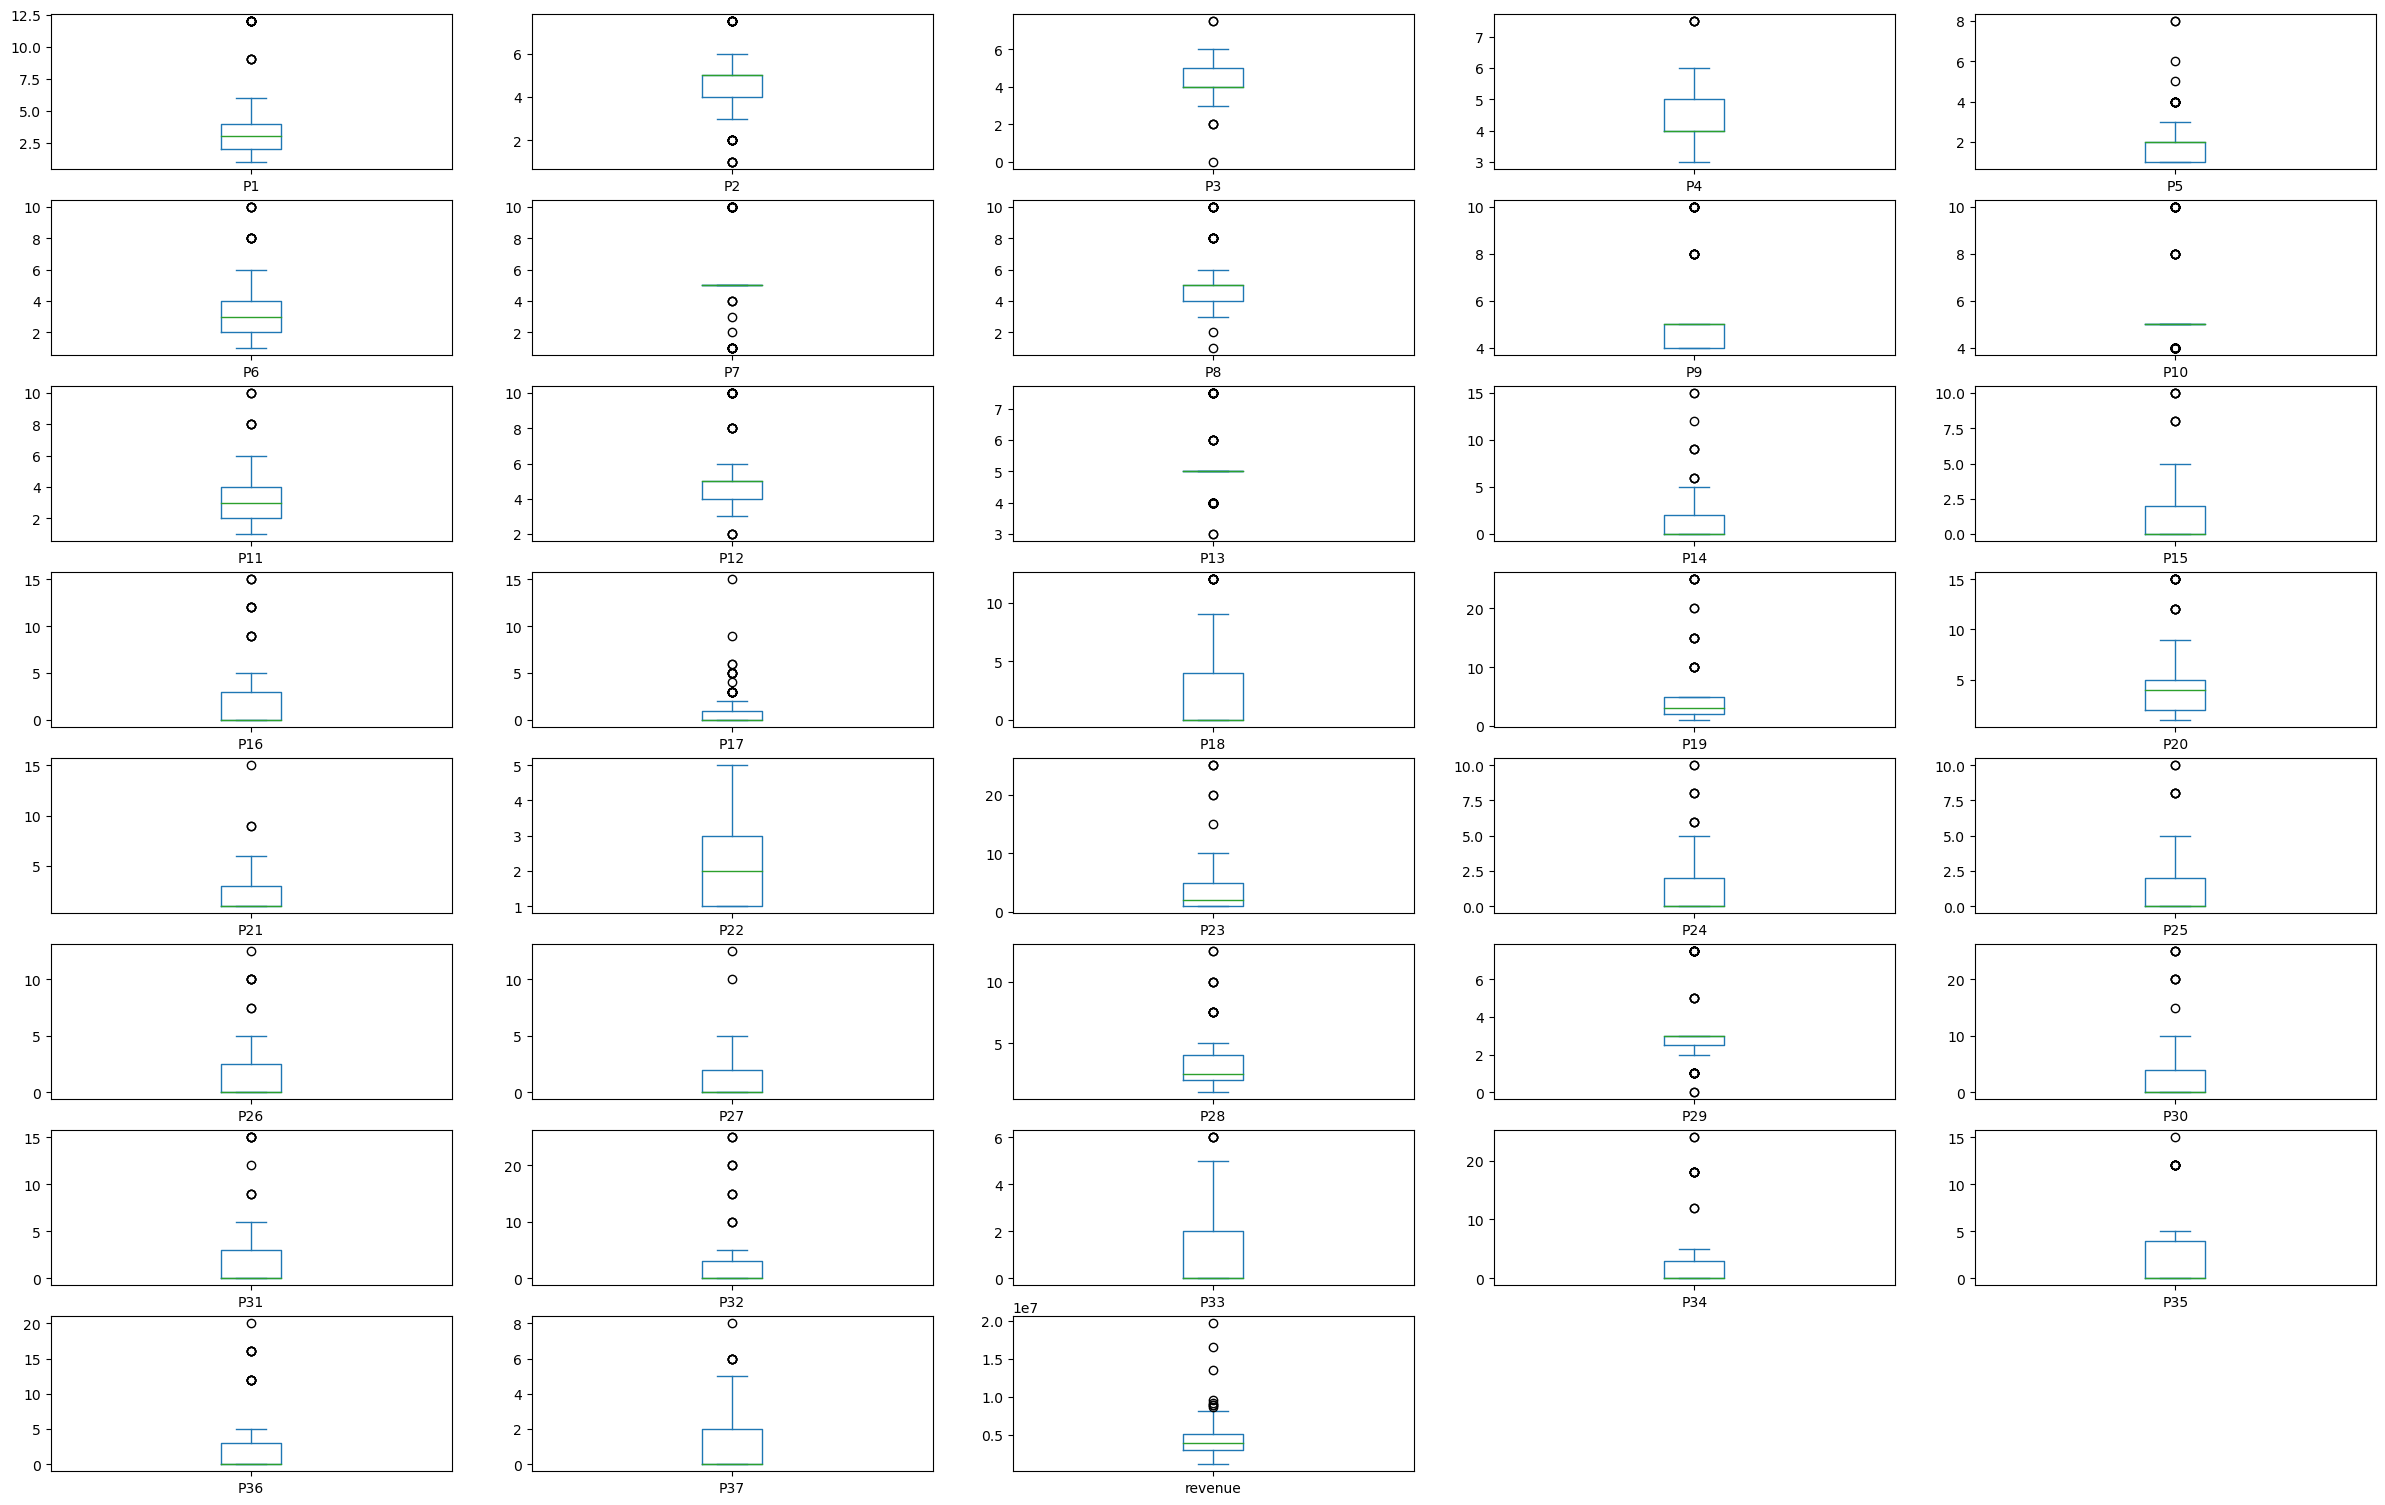

In [17]:
T_data.plot(kind='box', subplots=True, layout=(25,5), sharex=False, sharey=False,figsize=(30, 60))
plt.show()

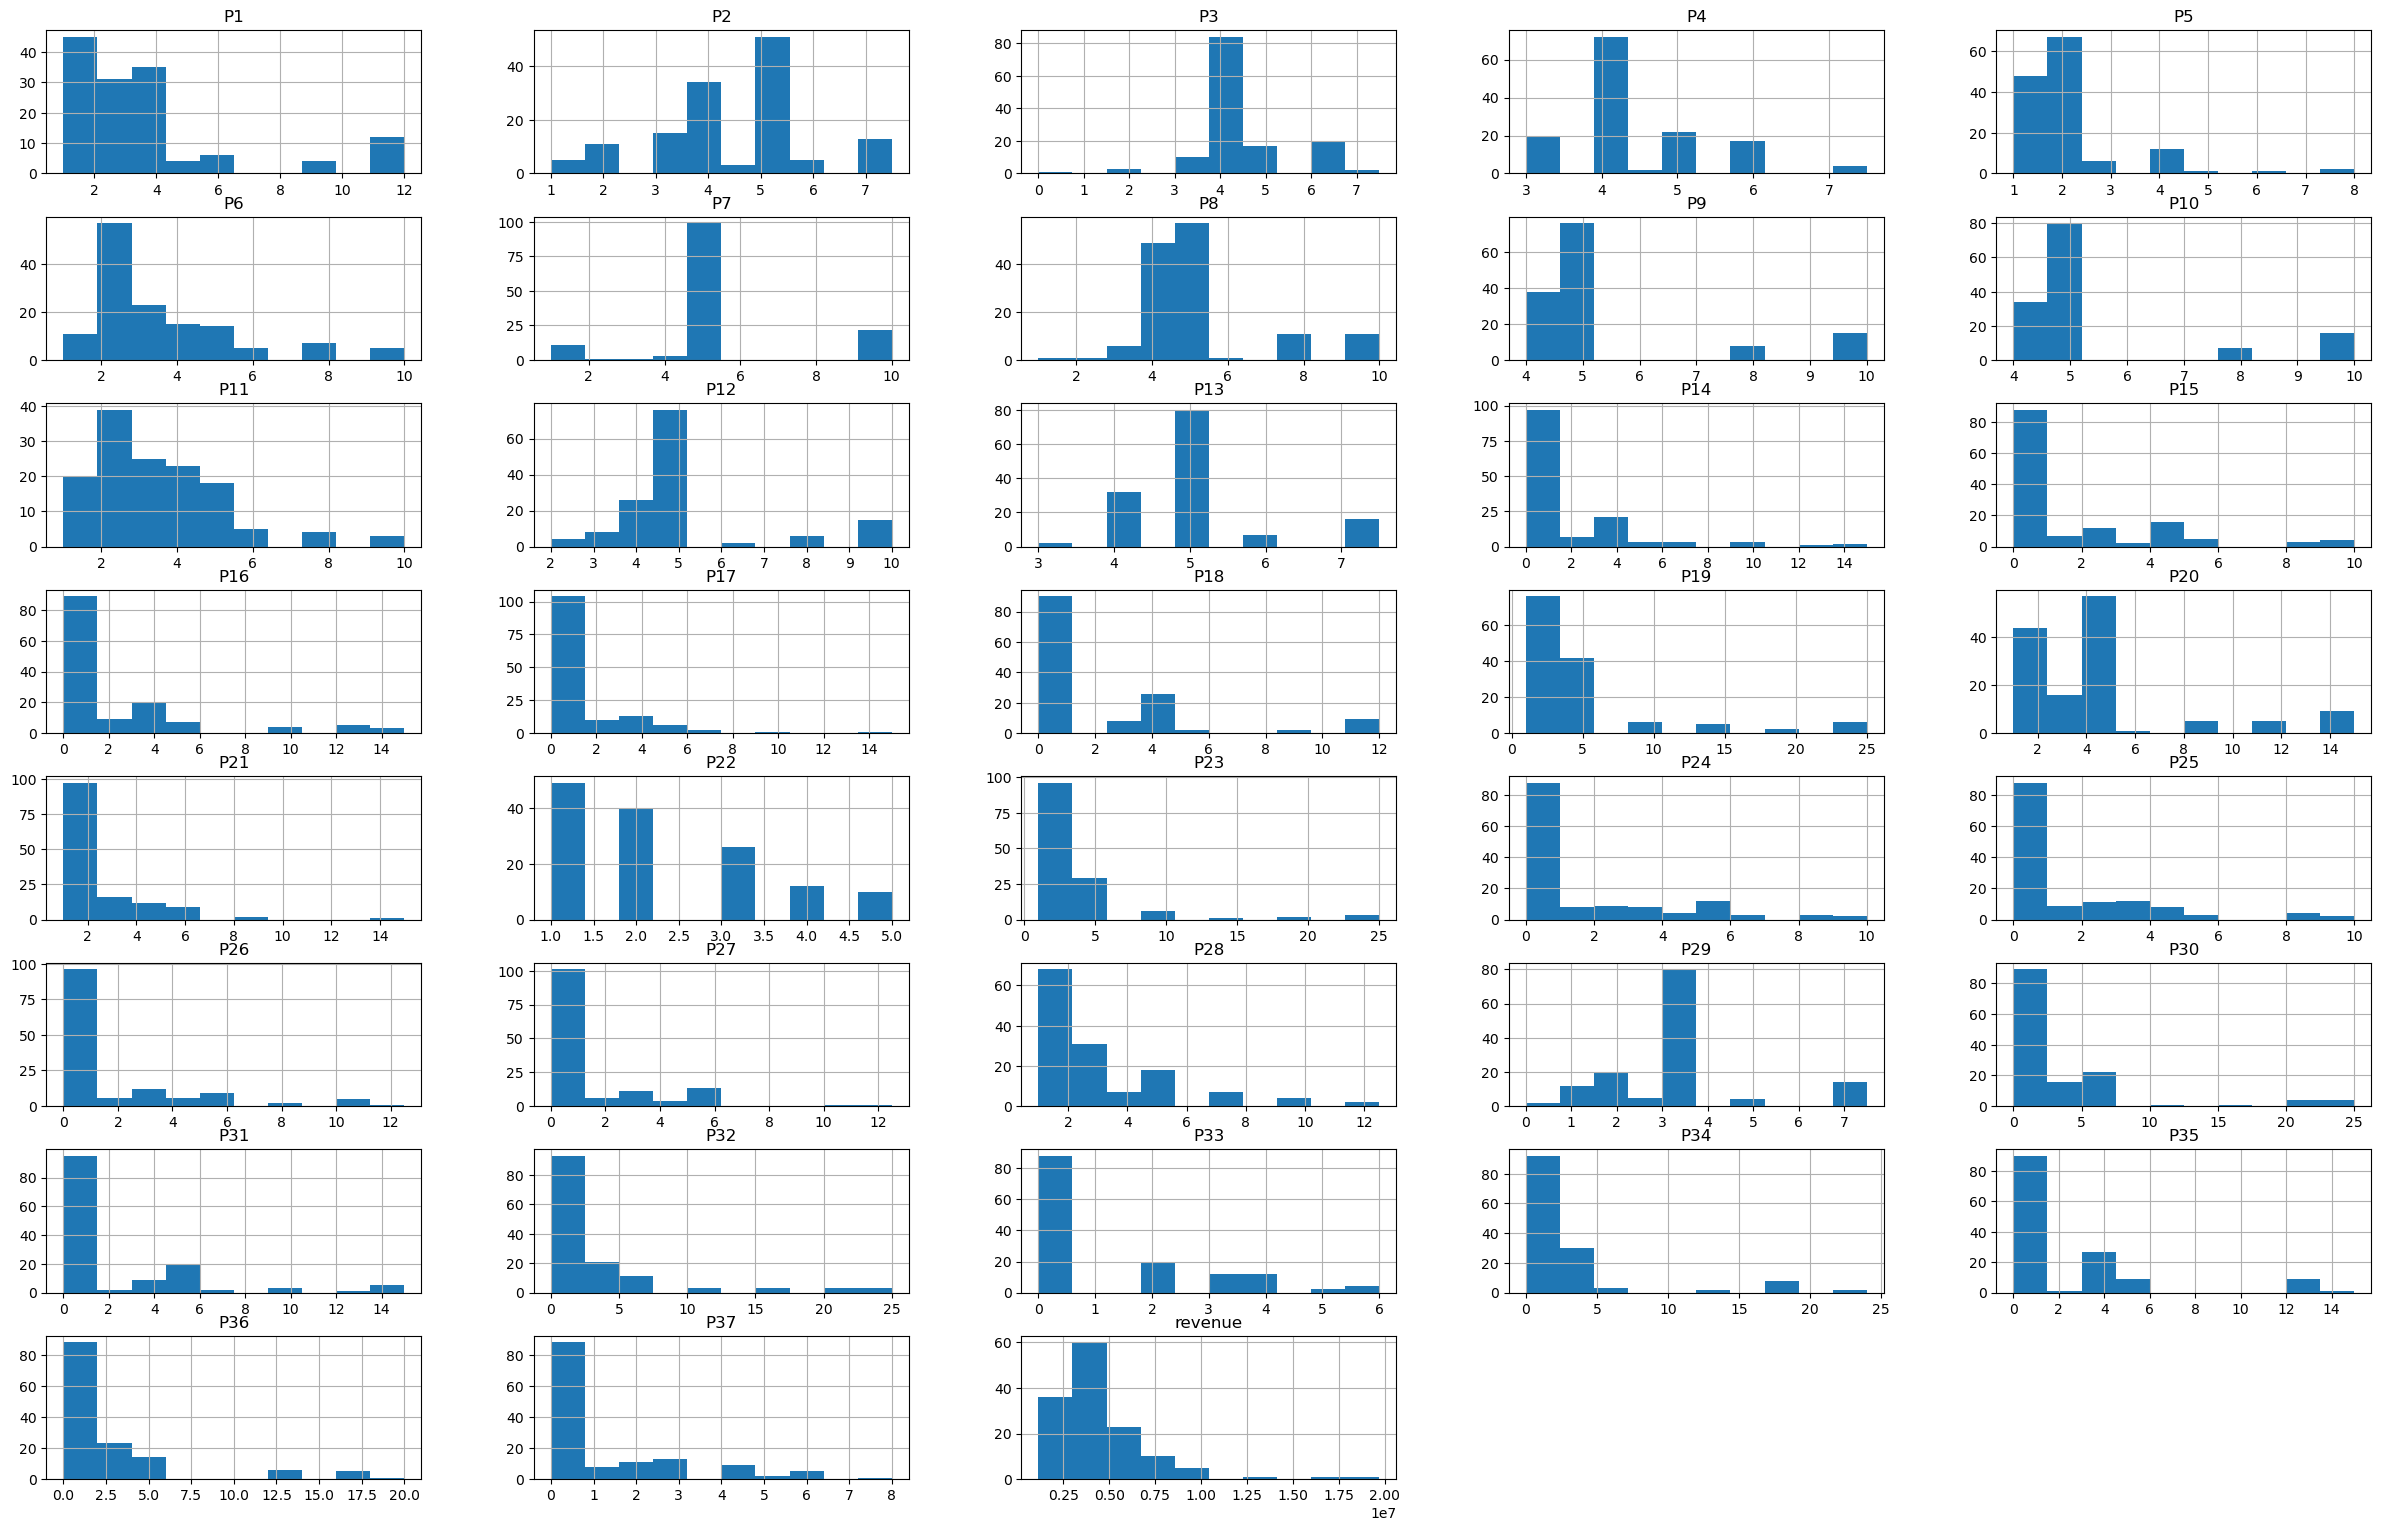

In [18]:
T_data.hist(layout=(25,5),figsize=(30, 60))
plt.show()

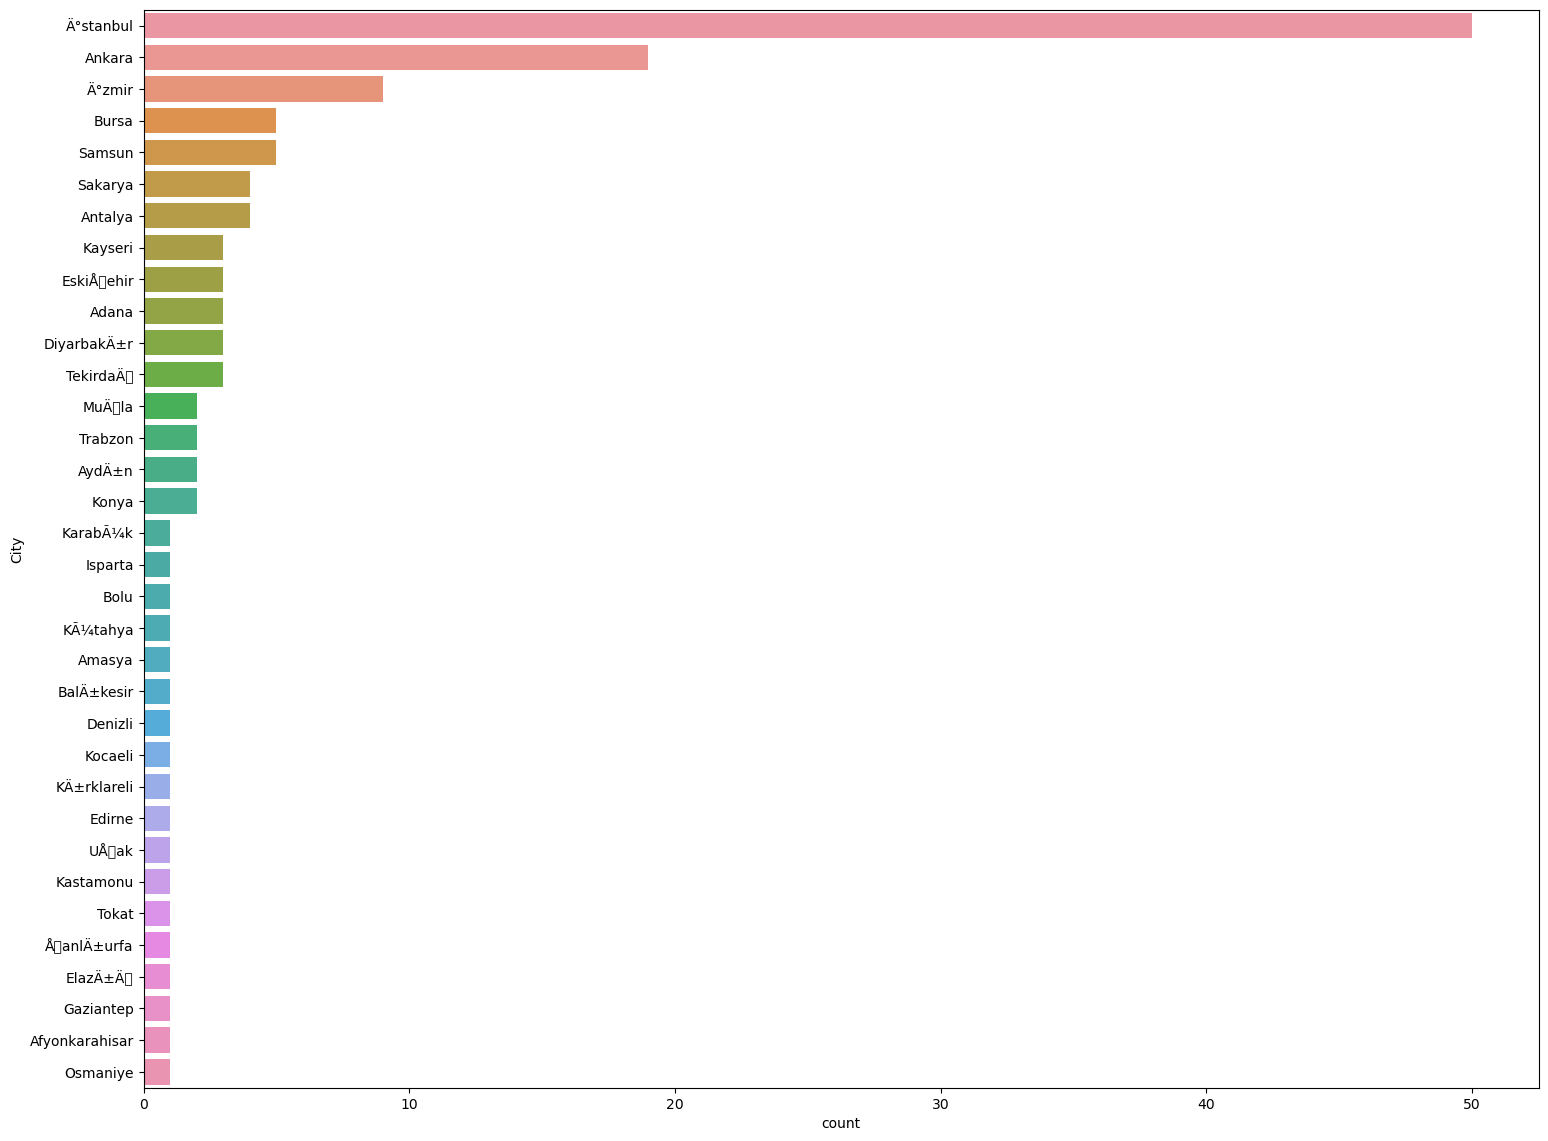

In [19]:
plt.figure(figsize=(18,14))
sns.countplot(data=T_data,y='City',order=T_data.City.value_counts(ascending=False).index)
plt.show()

In [20]:
counts = T_data['City'].value_counts() #counts unique values
percent = ((T_data['City'].value_counts()/T_data['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

count percentage
City                       
Ä°stanbul     50      36.5%
Ankara        19      13.9%
Ä°zmir         9       6.6%
Bursa          5       3.6%
Samsun         5       3.6%

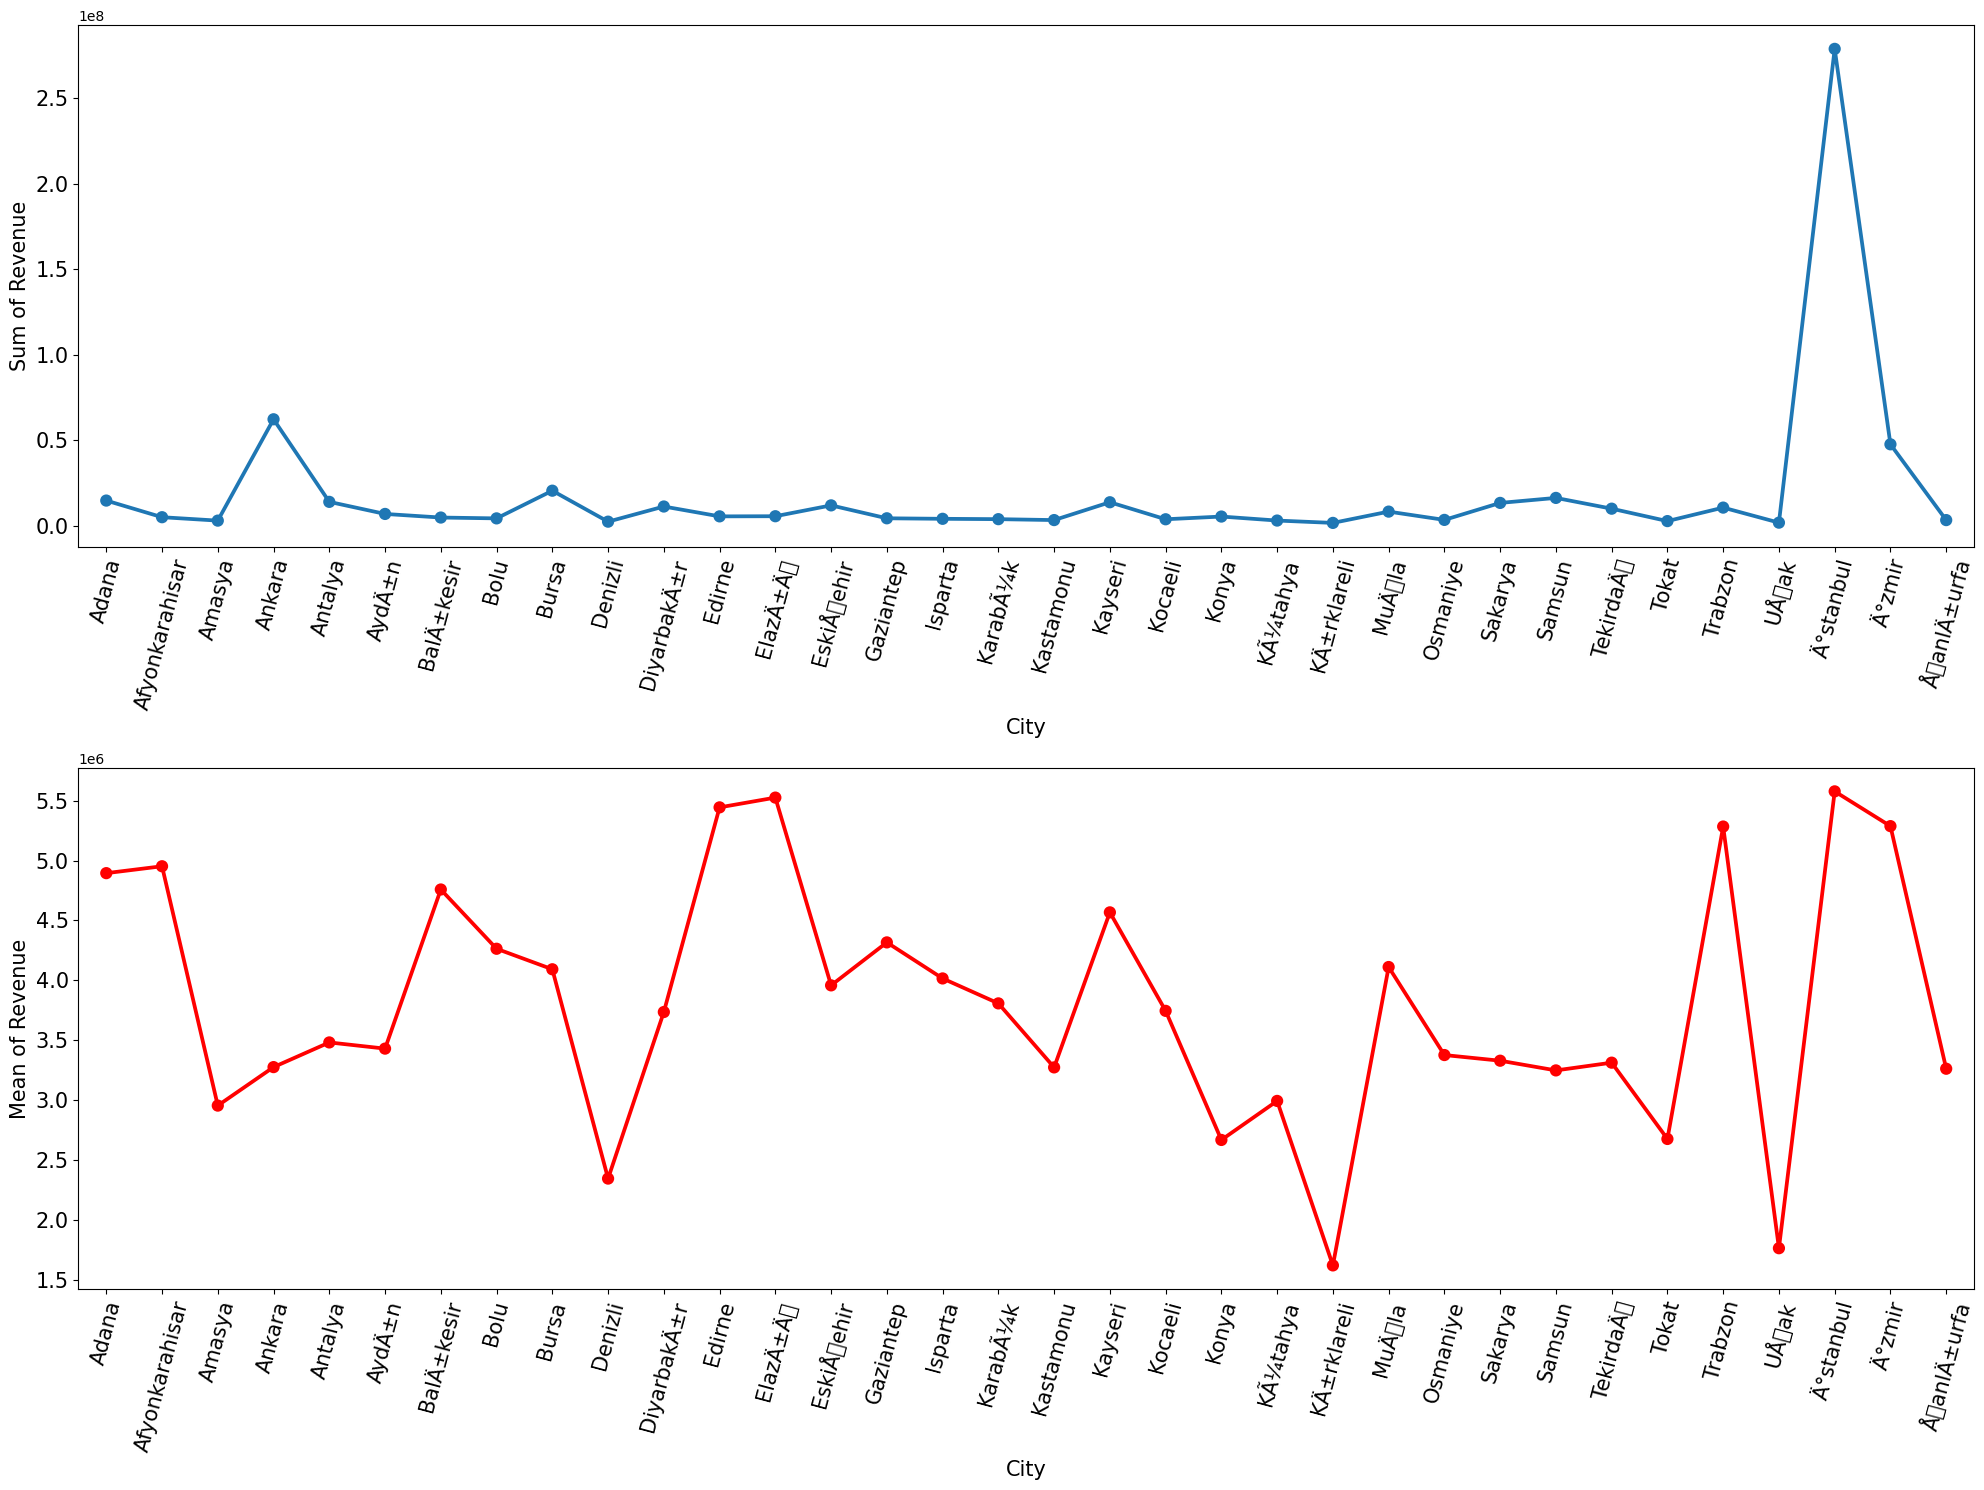

In [21]:
city_df = T_data.groupby("City")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (20,15))
ax1 = sns.pointplot(x=city_df["City"],y=city_df["sum"],ax=ax[0])
ax1.tick_params(axis= "x" ,labelsize=15,labelrotation=75)
ax1.tick_params(axis= "y" ,labelsize=15)
ax1.set_xlabel("City", fontsize=15)
ax1.set_ylabel("Sum of Revenue", fontsize=15)
ax2 = sns.pointplot(x=city_df["City"],y=city_df["mean"],ax=ax[1],color = "r")
ax2.tick_params(axis= "x" ,labelsize=15,labelrotation=75)
ax2.tick_params(axis= "y" ,labelsize=15)
ax2.set_xlabel("City", fontsize=15)
ax2.set_ylabel("Mean of Revenue", fontsize=15)
plt.tight_layout()

In [22]:
T_data['City Group'].value_counts()

City Group
Big Cities    78
Other         59
Name: count, dtype: int64

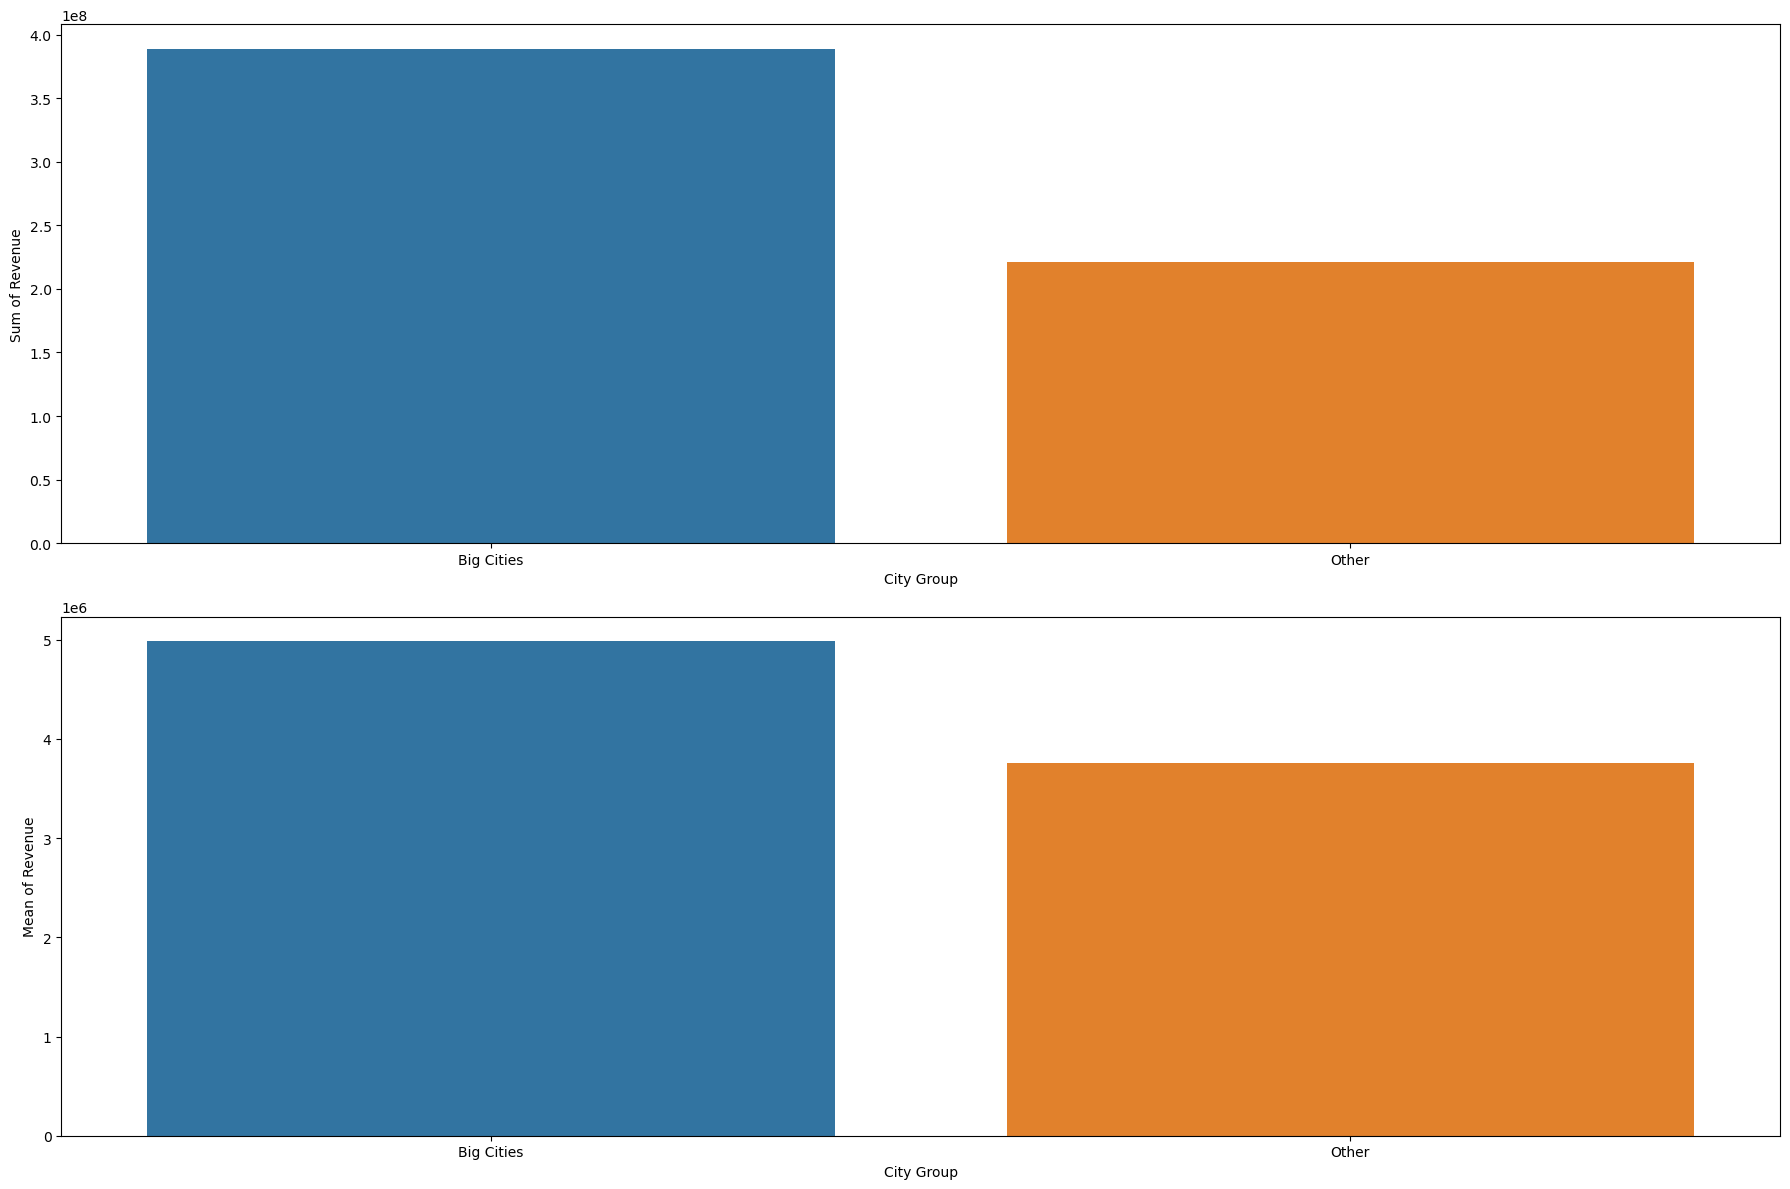

In [23]:
cityg_df = T_data.groupby("City Group")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["sum"],ax=ax[0])
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["mean"],ax=ax[1])
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

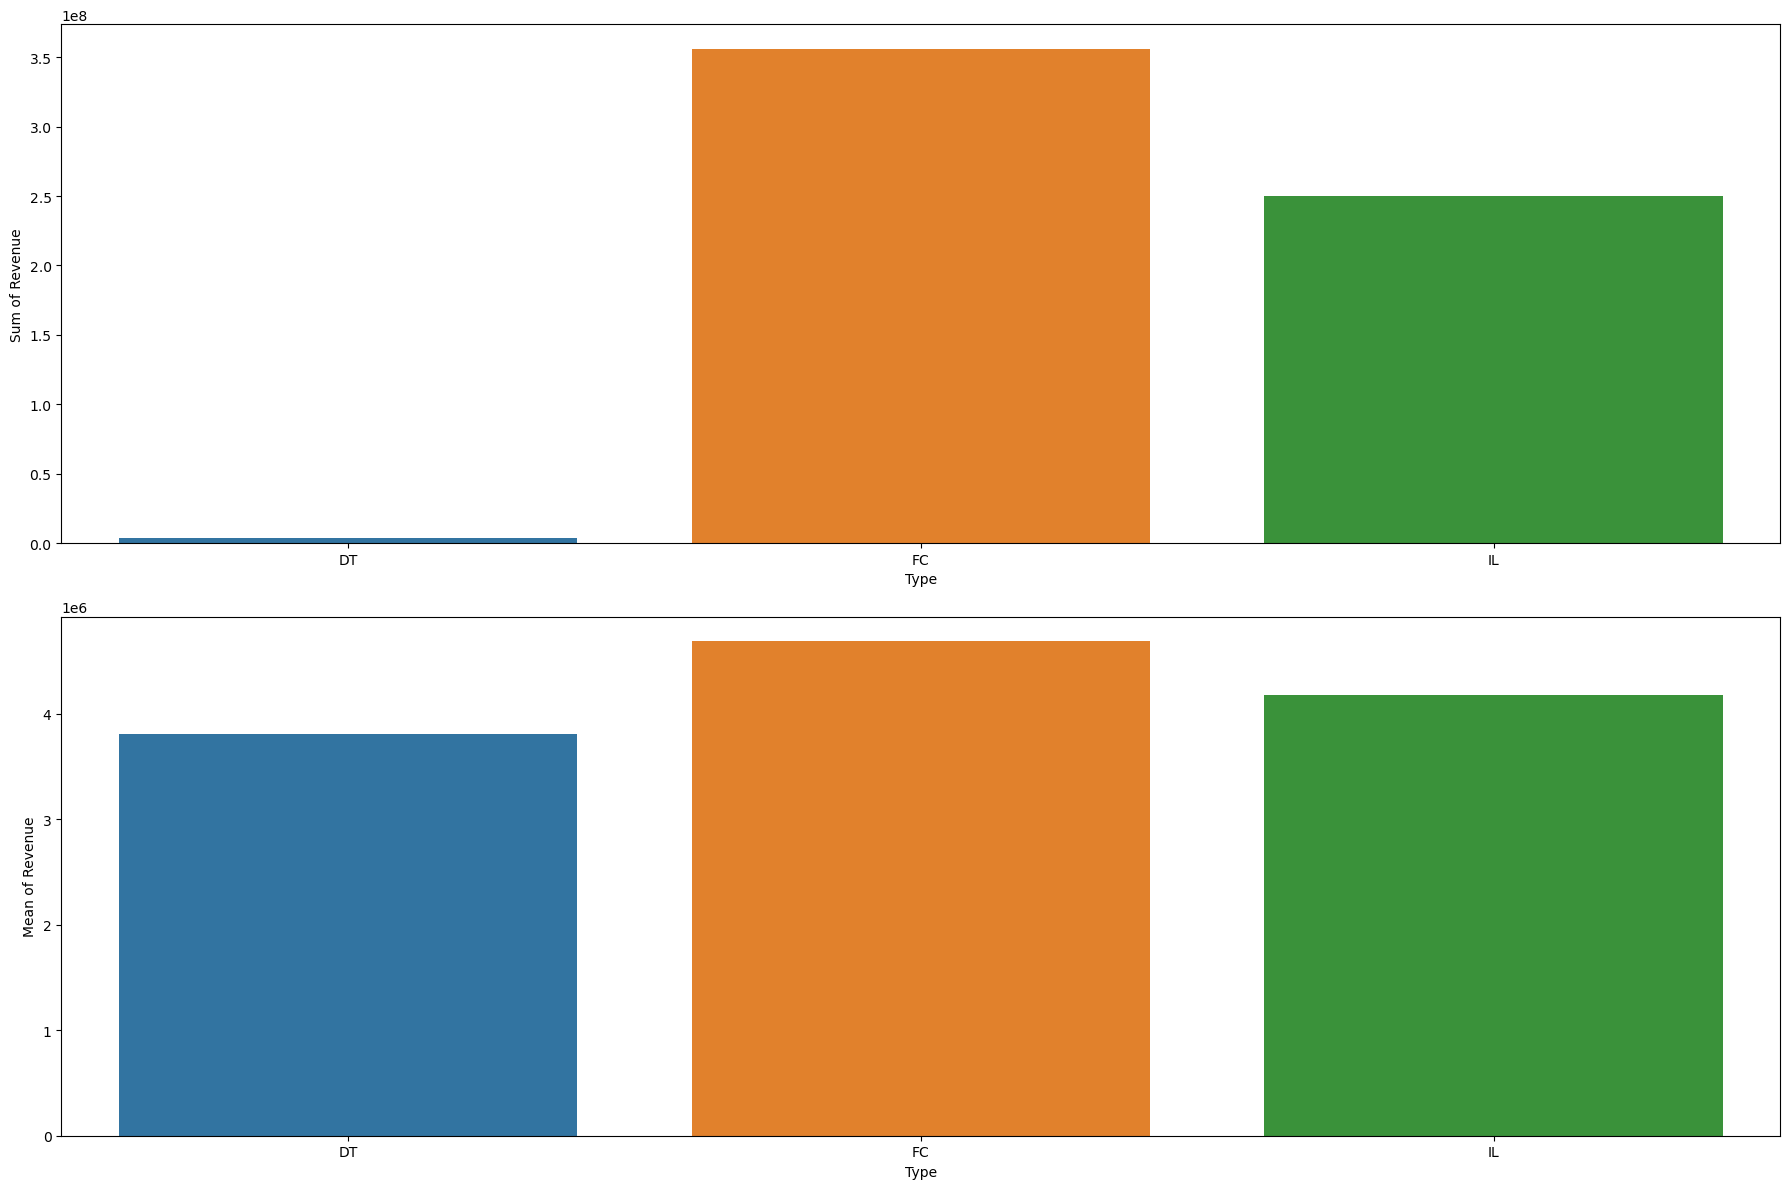

In [24]:
type_df = T_data.groupby("Type")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=type_df["Type"],y=type_df["sum"],ax=ax[0])
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=type_df["Type"],y=type_df["mean"],ax=ax[1])
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

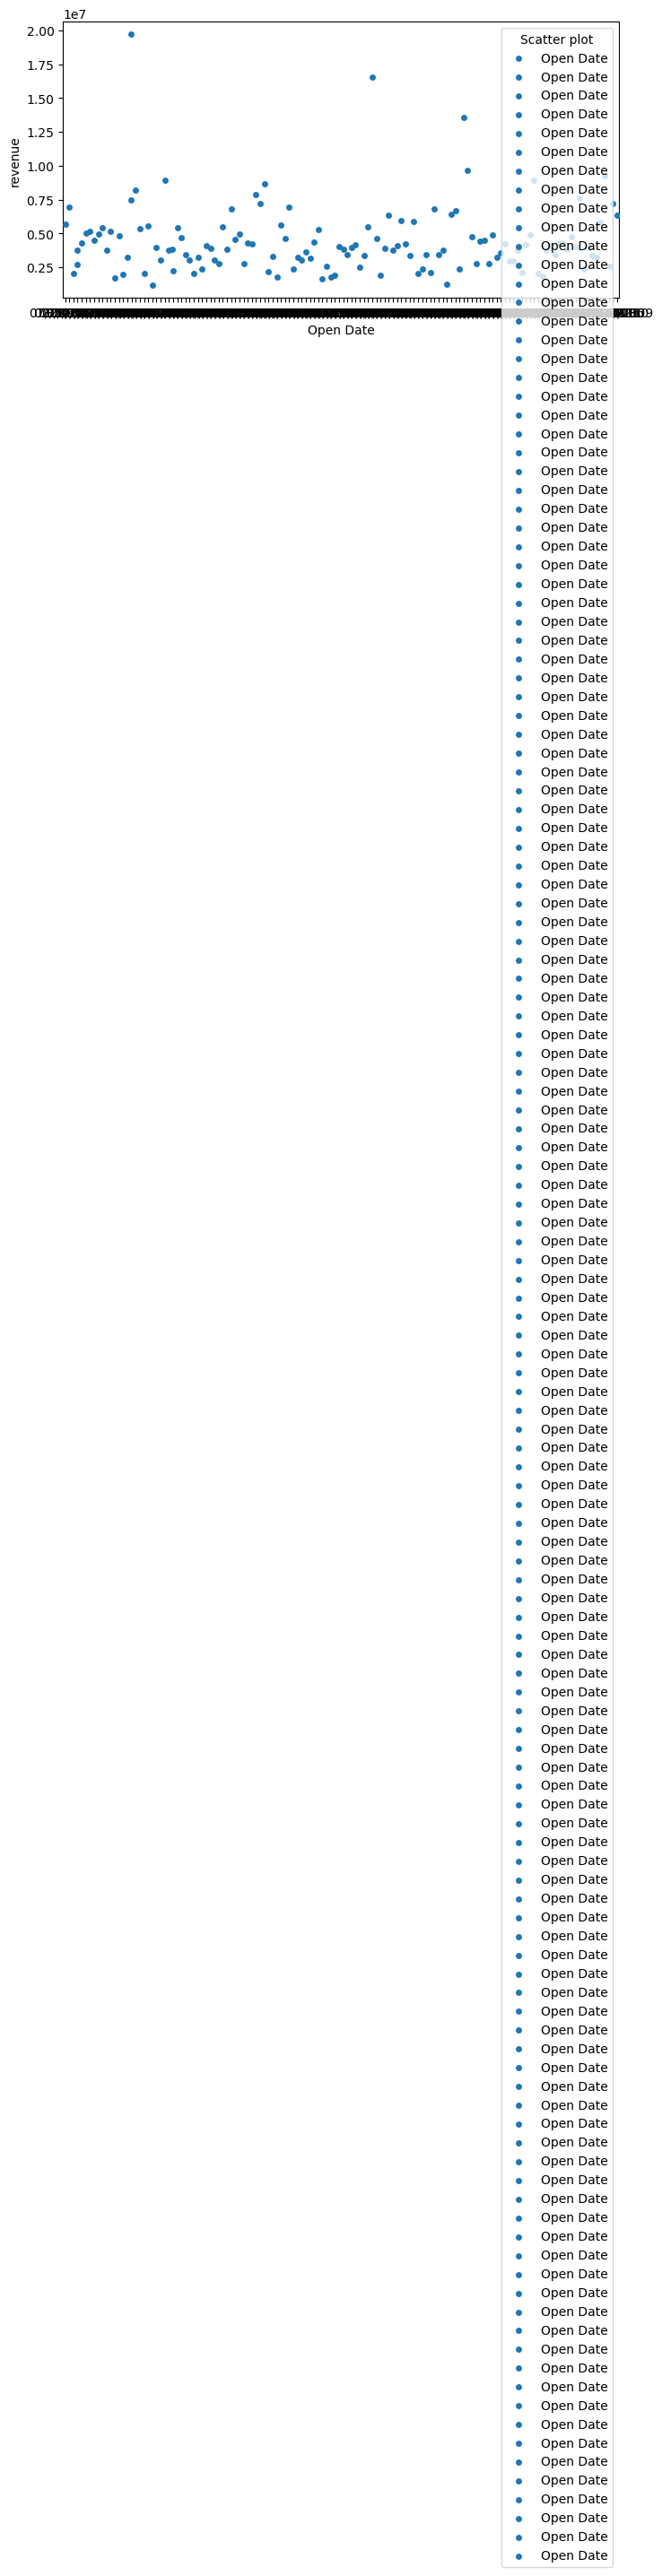

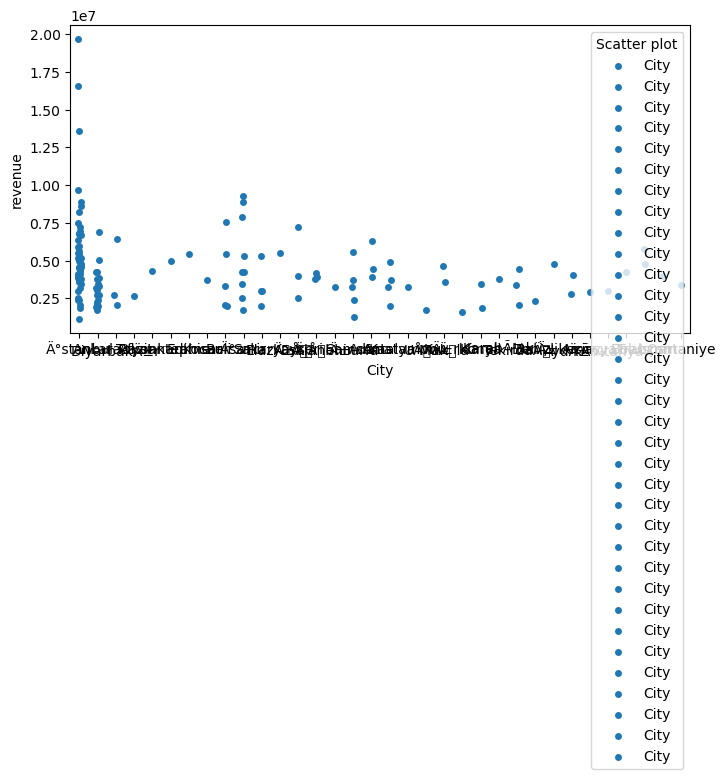

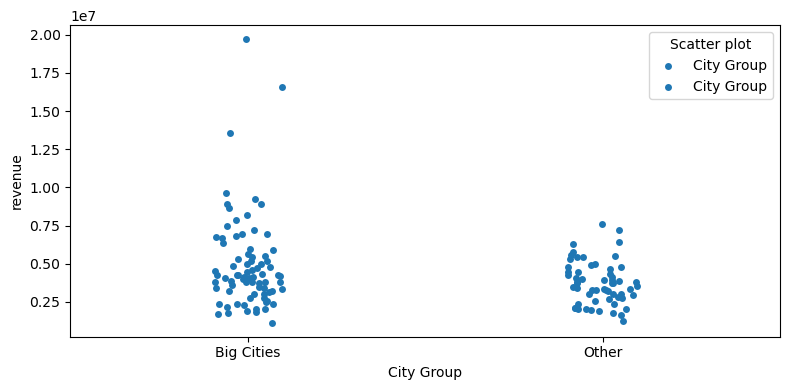

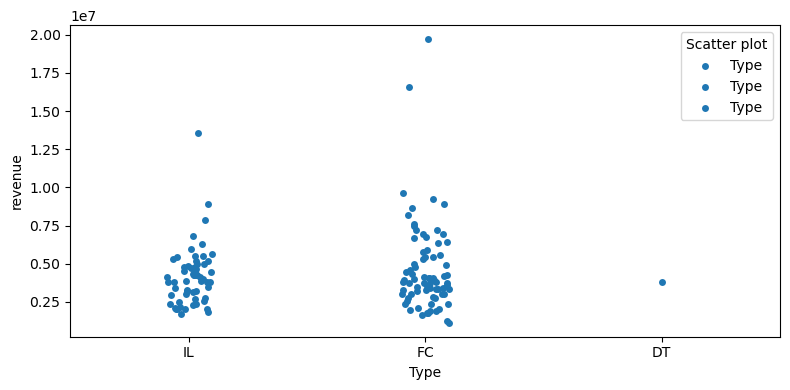

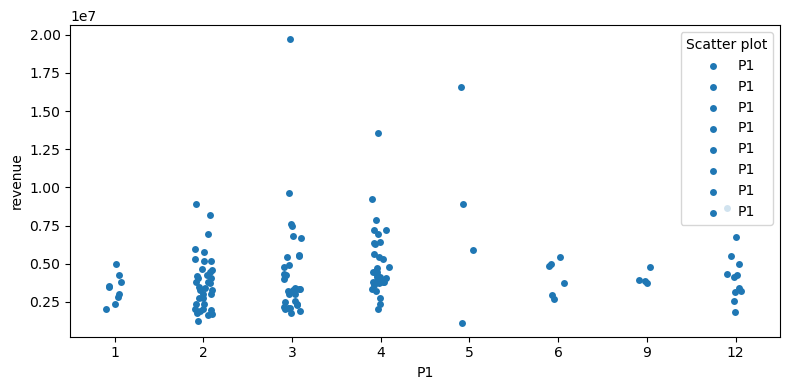

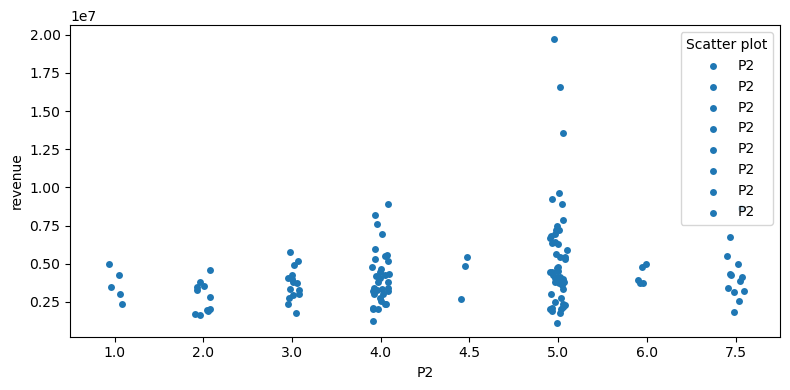

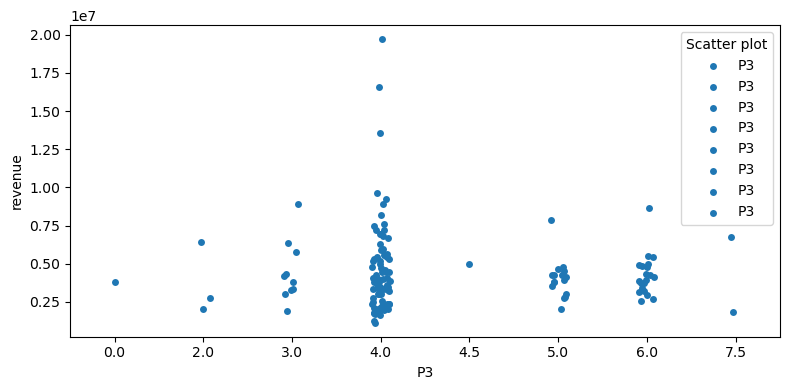

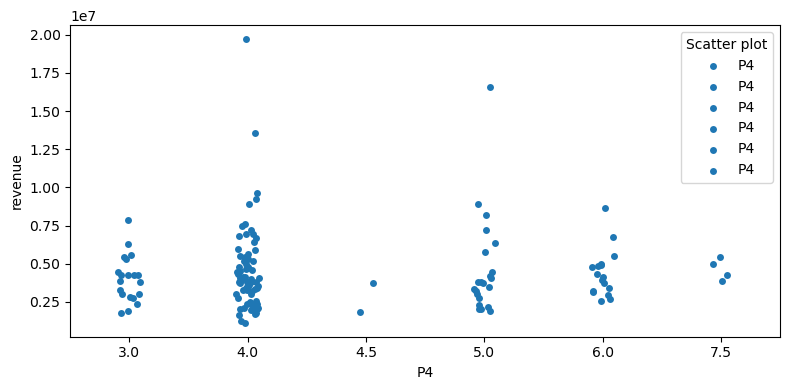

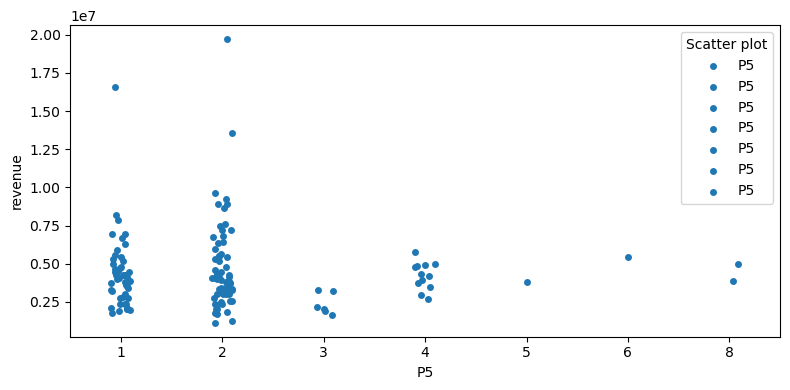

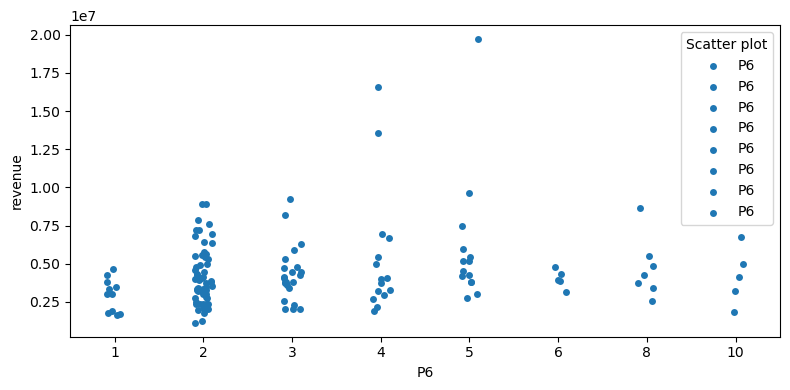

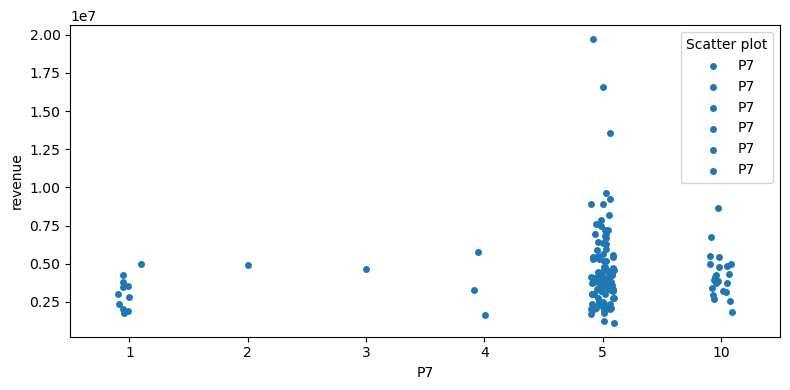

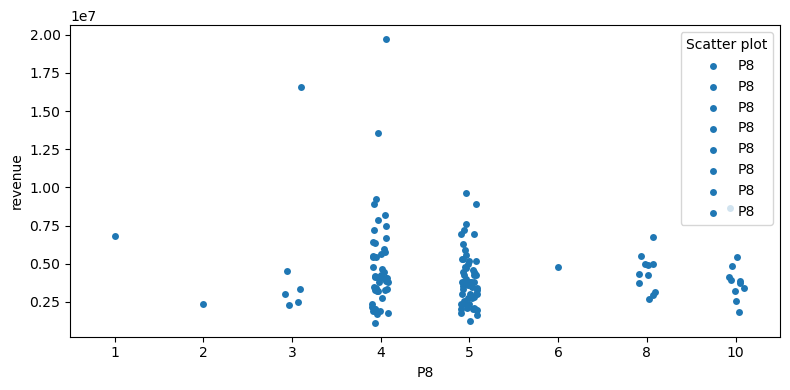

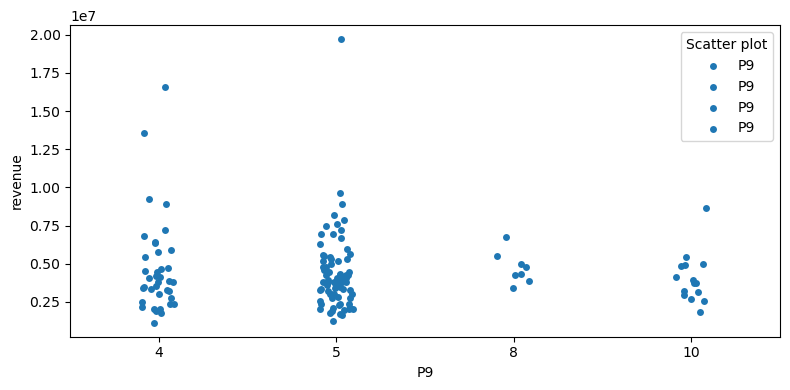

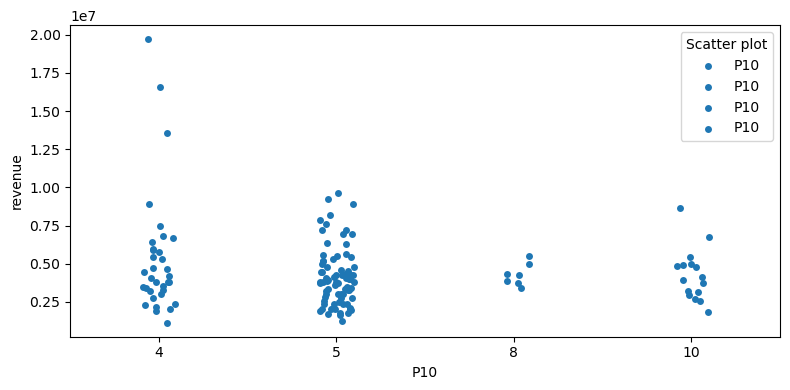

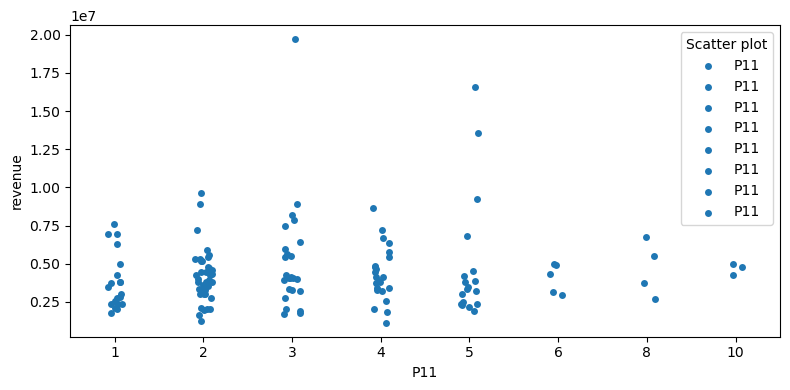

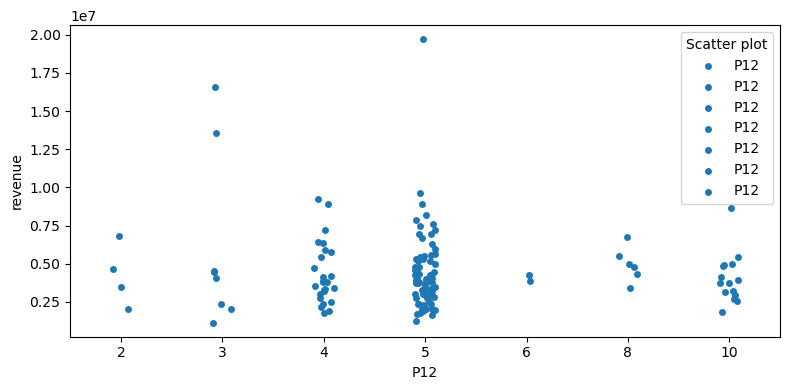

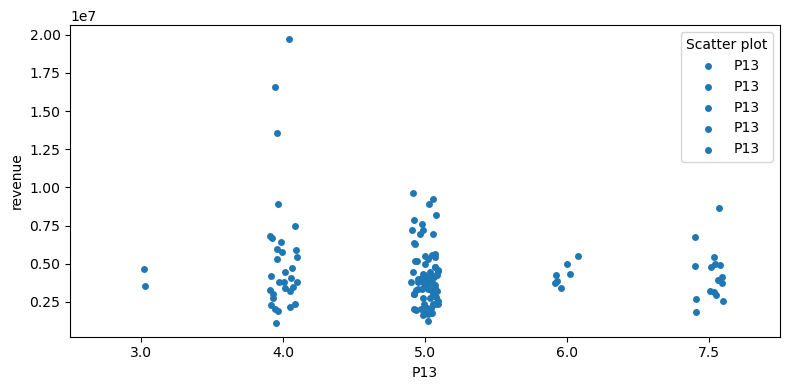

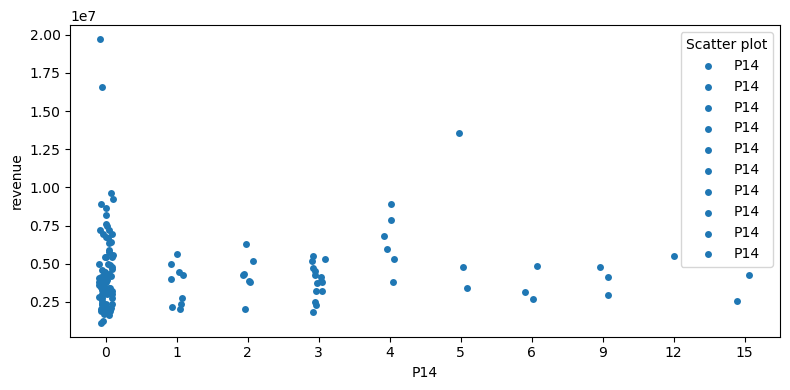

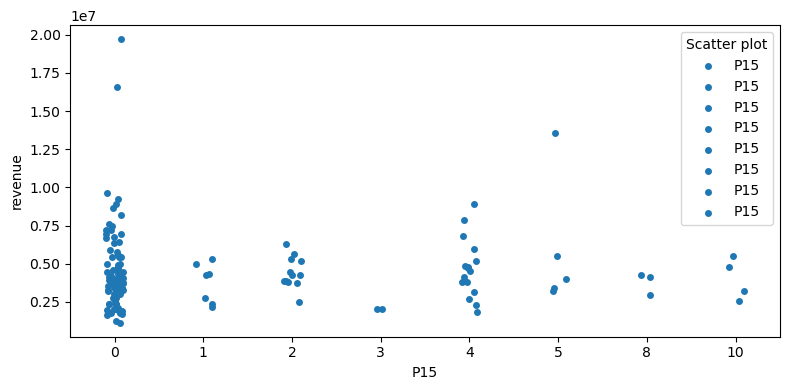

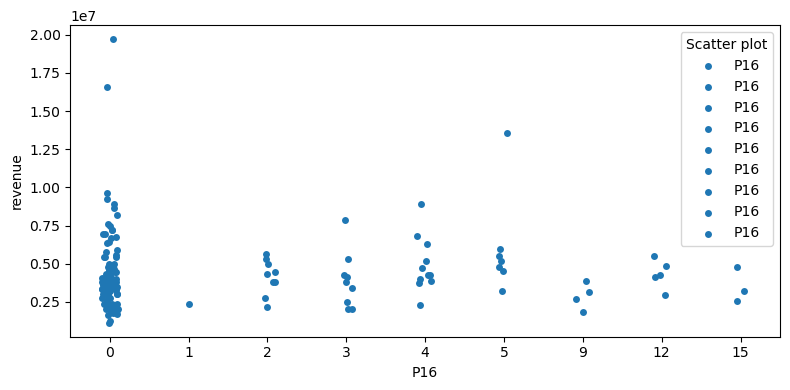

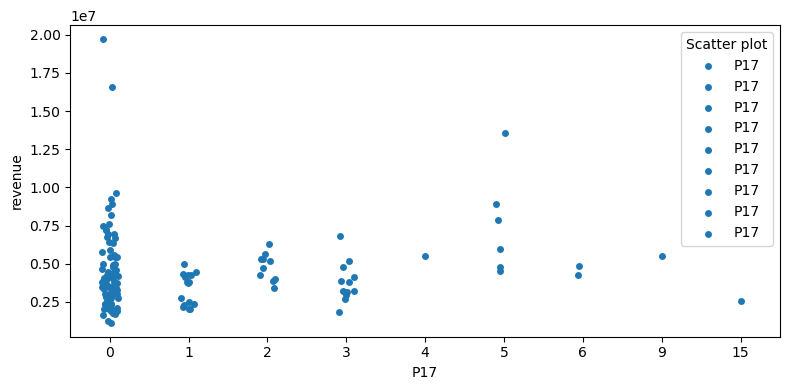

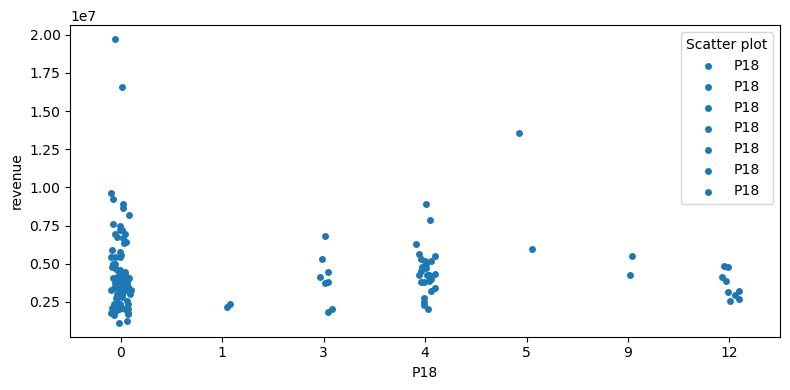

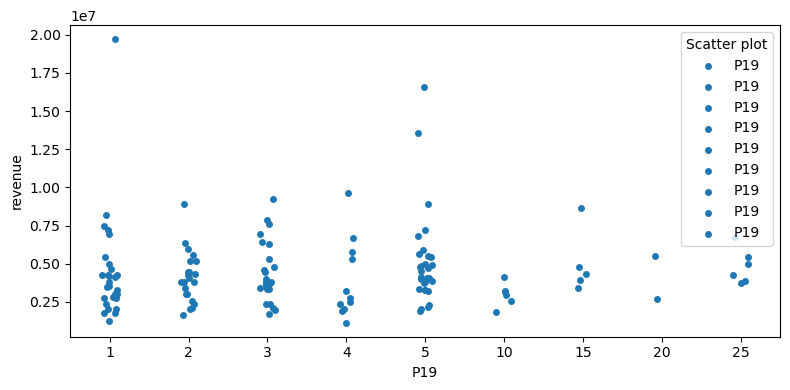

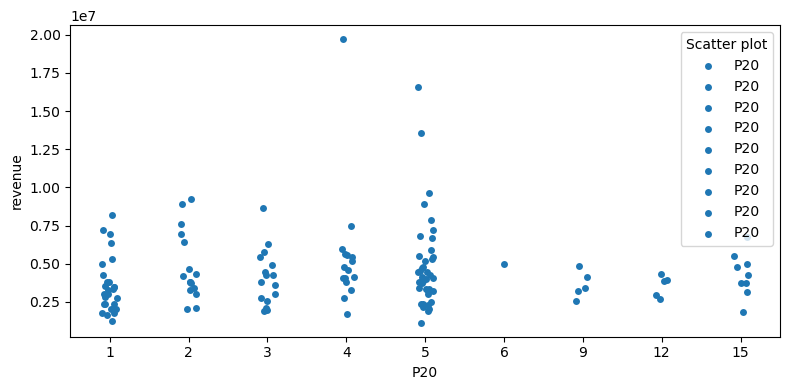

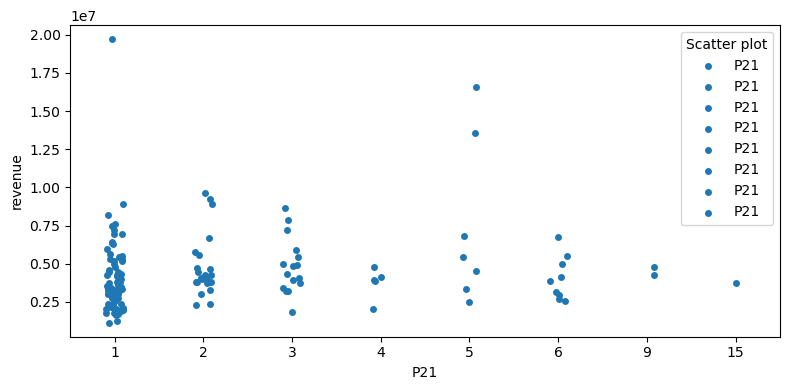

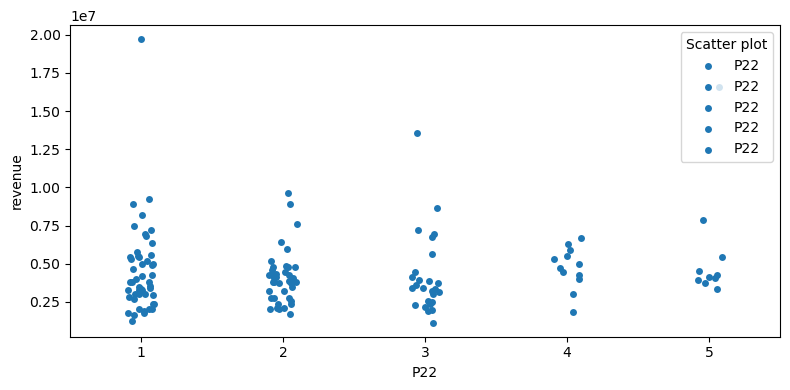

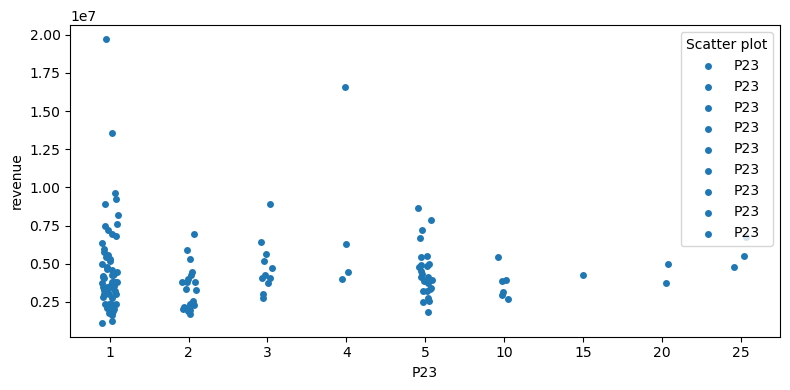

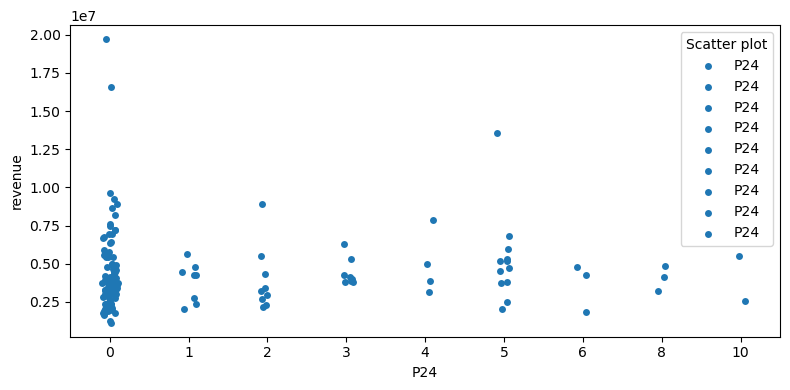

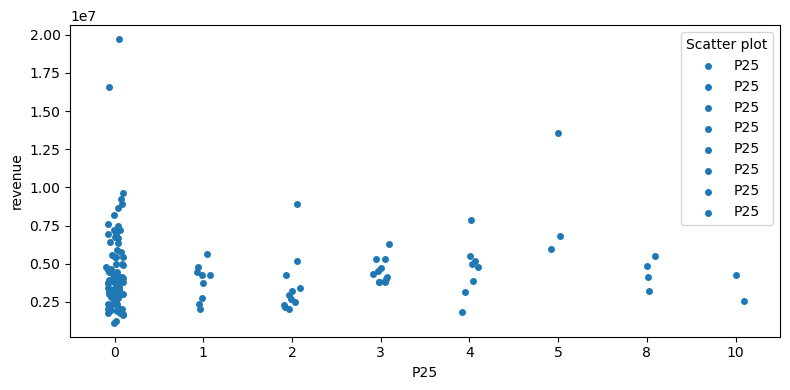

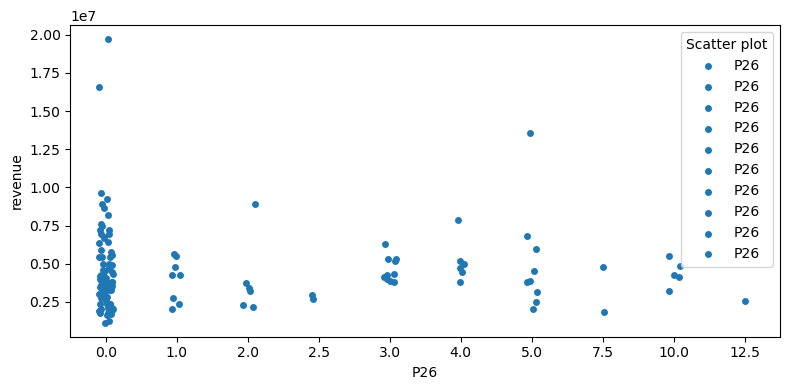

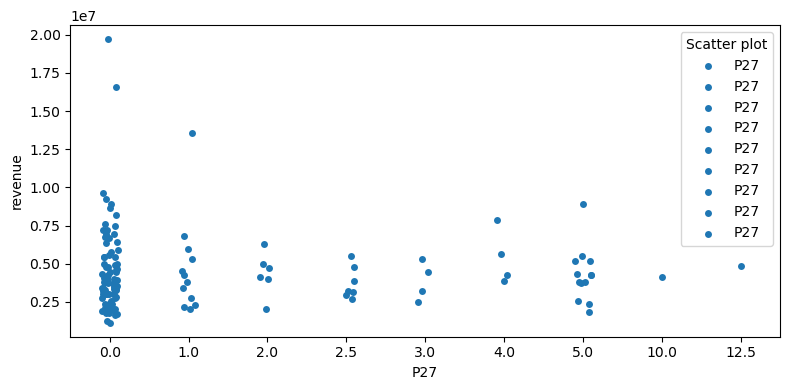

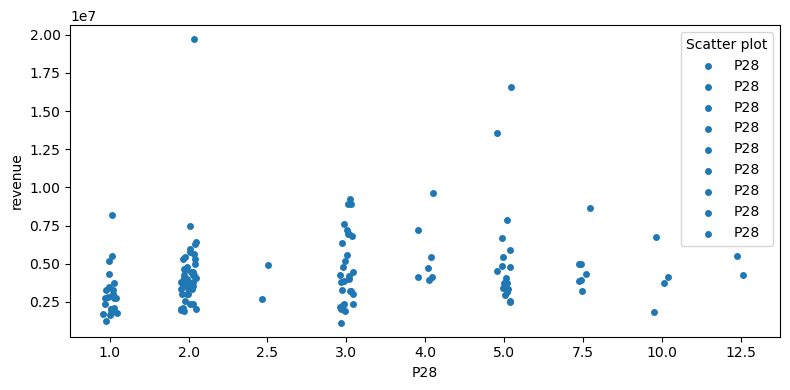

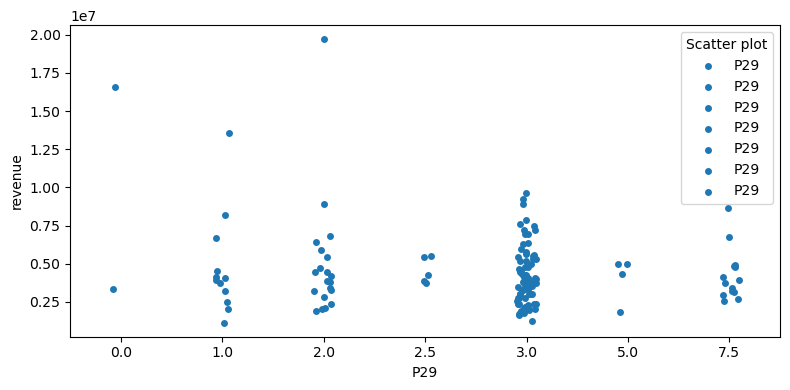

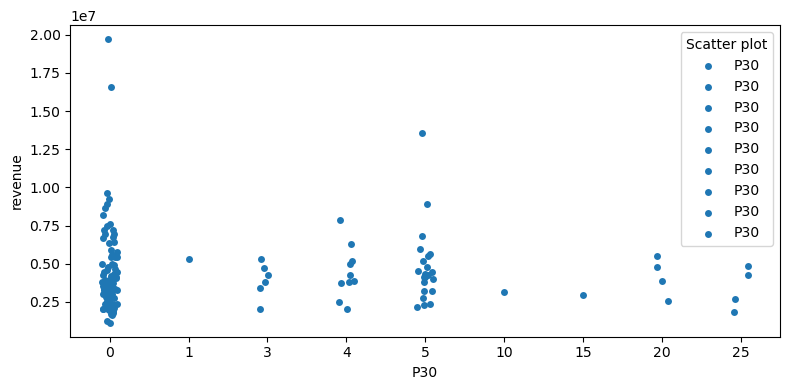

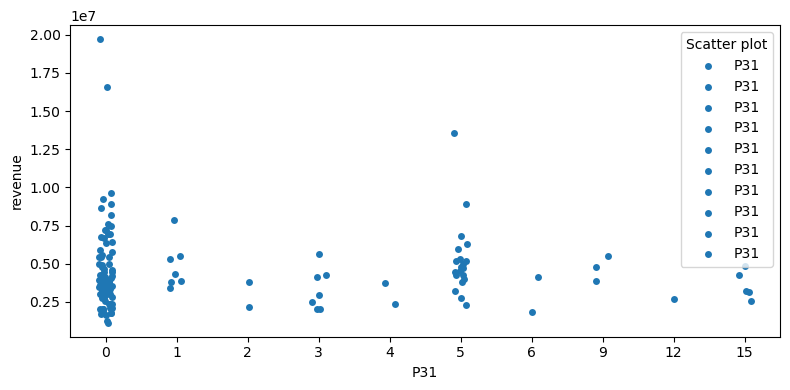

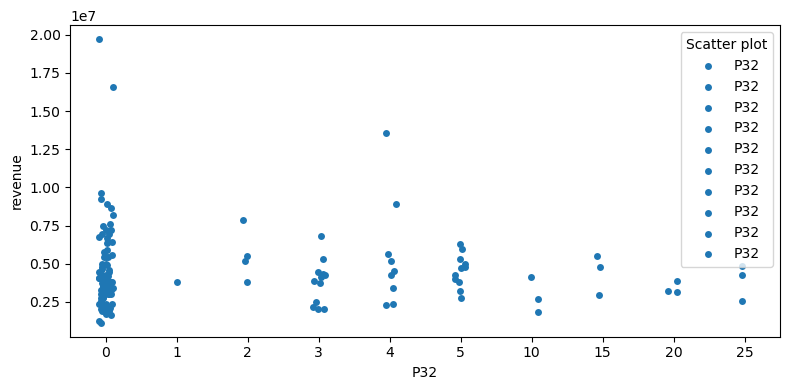

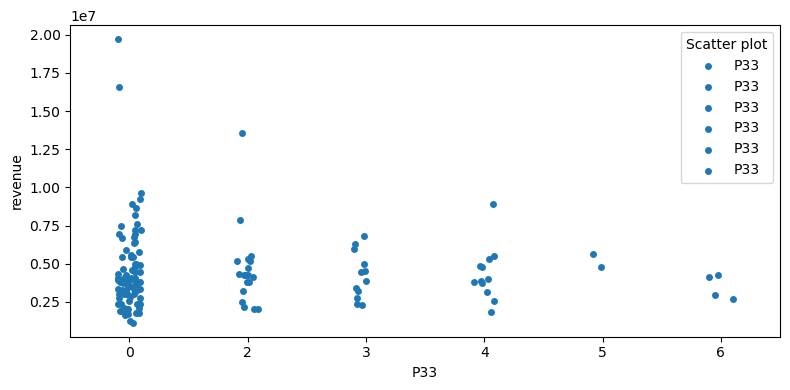

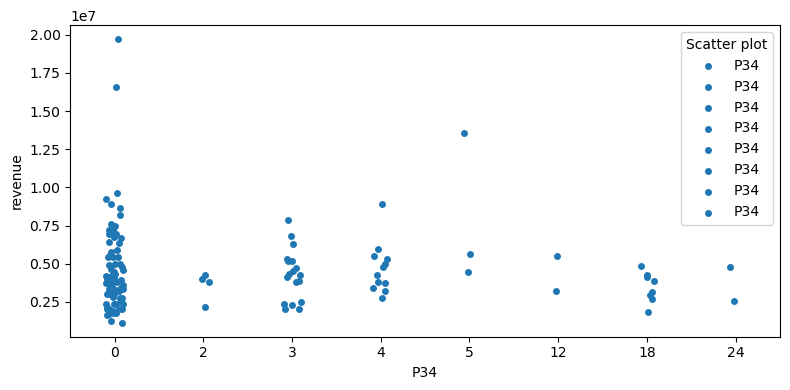

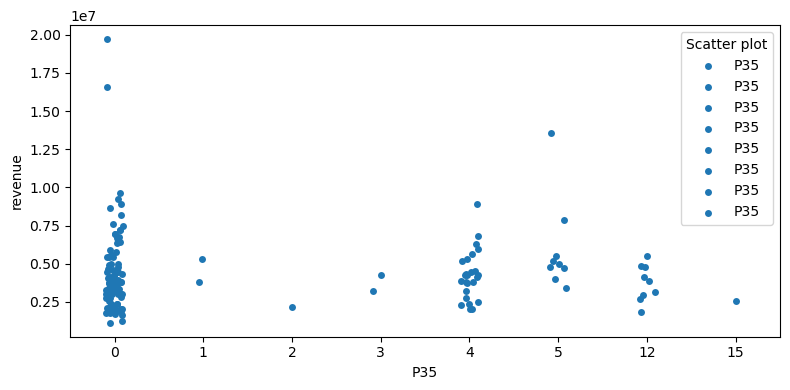

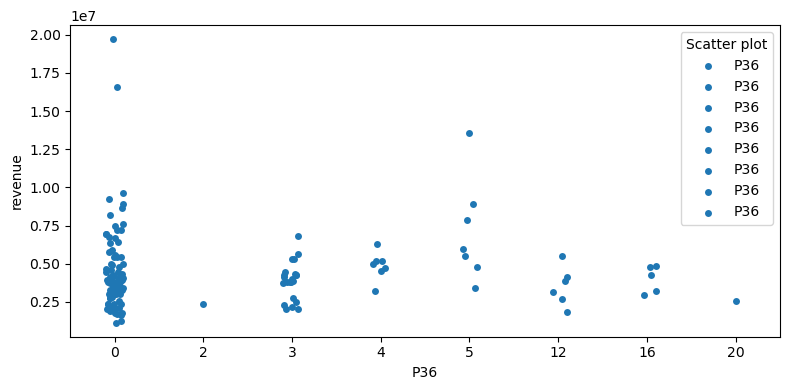

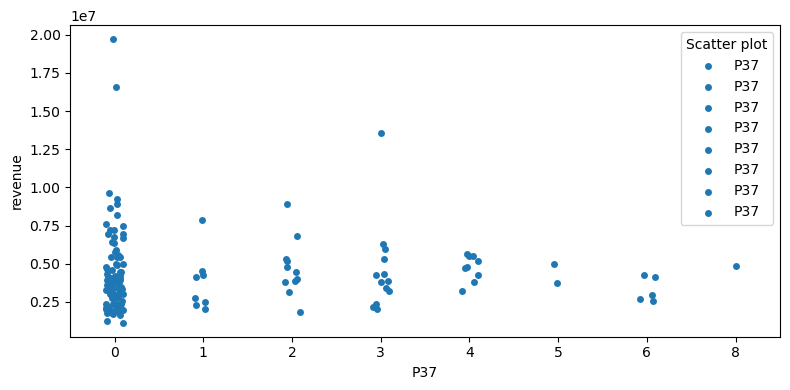

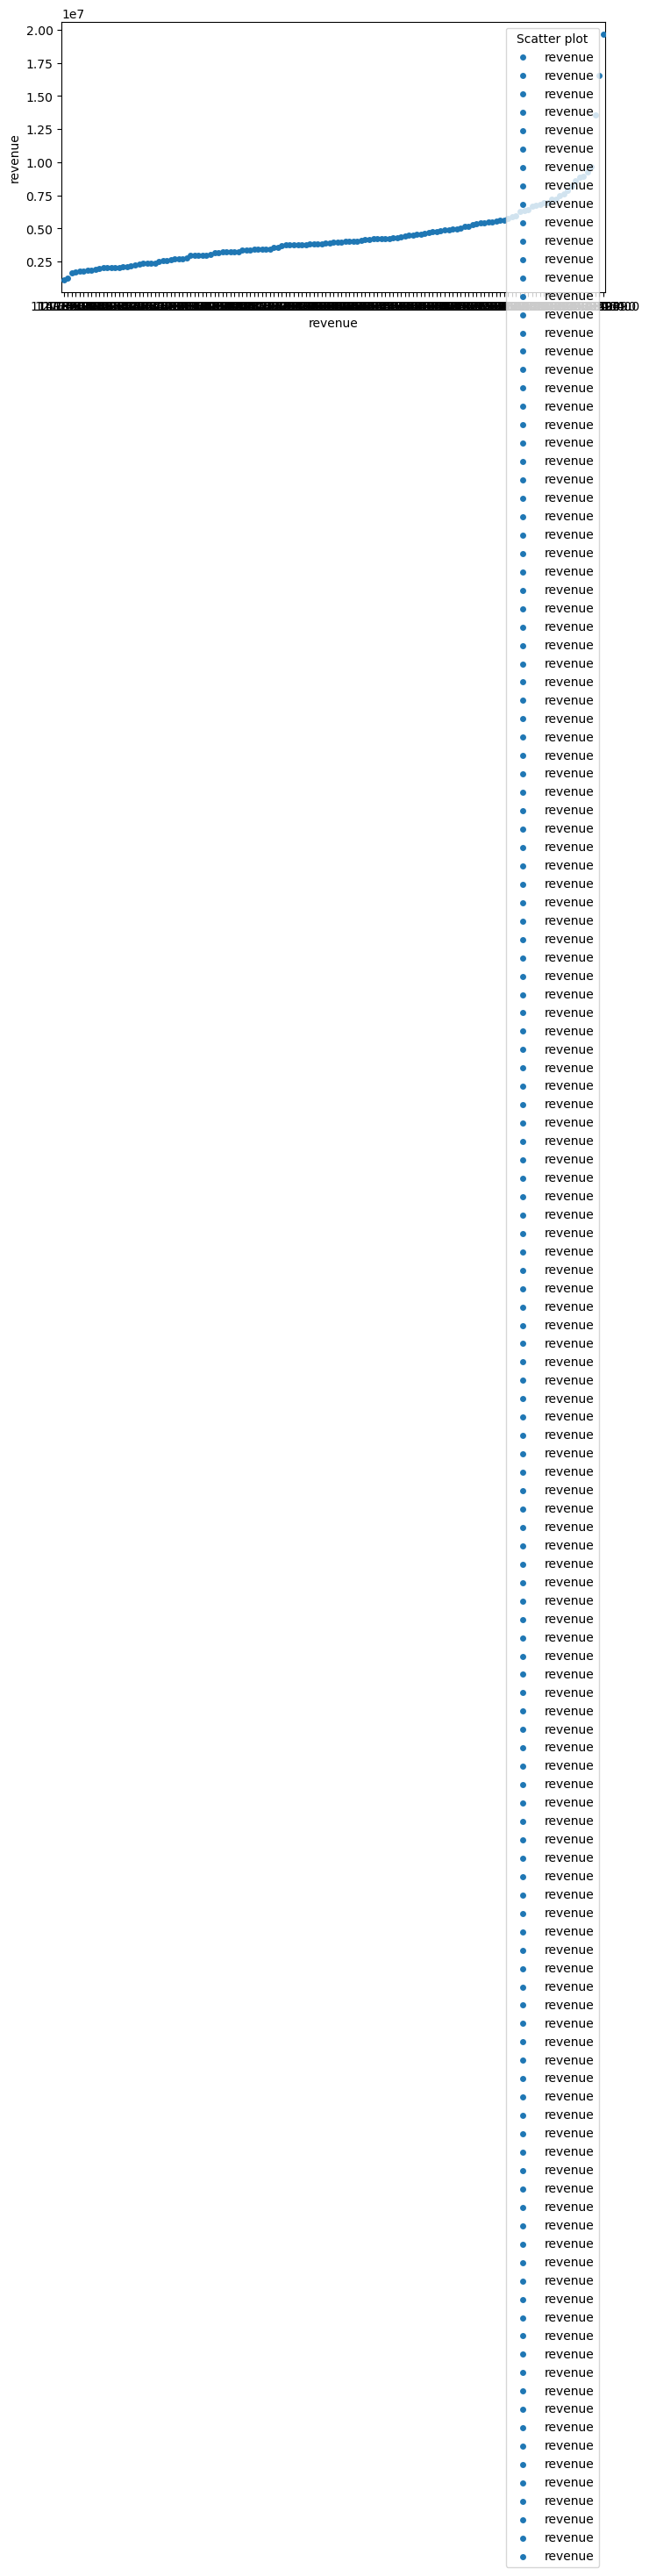

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

for column_name in T_data:
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=column_name, y="revenue", data=T_data, label=column_name)
    plt.legend(loc="upper right", title="Scatter plot")
    plt.tight_layout()

plt.show()


In [26]:
T_data1=T_data.copy()

In [27]:
T_data1

Open Date         City  City Group Type  P1   P2   P3   P4  P5  P6  ...  \
0    07/17/1999    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...   
1    02/14/2008       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...   
2    03/09/2013  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3  ...   
3    02/02/2012        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   
4    05/09/2009    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...   
..          ...          ...         ...  ...  ..  ...  ...  ...  ..  ..  ...   
132  06/25/2008      Trabzon       Other   FC   2  3.0  3.0  5.0   4   2  ...   
133  10/12/2006       Ä°zmir  Big Cities   FC   4  5.0  4.0  4.0   2   3  ...   
134  07/08/2006      Kayseri       Other   FC   3  4.0  4.0  4.0   2   3  ...   
135  10/29/2010    Ä°stanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2  ...   
136  09/01/2009    Ä°stanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    3.0    5    3    4    5    5    4    3    4  5653753.0  
1    3.0    0    0    0    0    0    0    0    0  6923131.0  
2    3.0    0    0    0    0    0    0    0    0  2055379.0  
3    7.5   25   12   10    6   18   12   12    6  2675511.0  
4    3.0    5    1    3    2    3    4    3    3  4316715.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...  
132  3.0    0    0    0    0    0    0    0    0  5787594.0  
133  3.0    0    0    0    0    0    0    0    0  9262754.0  
134  3.0    0    0    0    0    0    0    0    0  2544857.0  
135  3.0    0    0    0    0    0    0    0    0  7217634.0  
136  3.0    0    0    0    0    0    0    0    0  6363241.0  

[137 rows x 42 columns]

In [28]:
T_data1['Open Date'] = pd.to_datetime(T_data1['Open Date'])
T_data1['year'] = T_data1['Open Date'].apply(lambda x:x.year)
T_data1['month'] = T_data1['Open Date'].apply(lambda x:x.month)
T_data1['day'] = T_data1['Open Date'].apply(lambda x:x.day)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


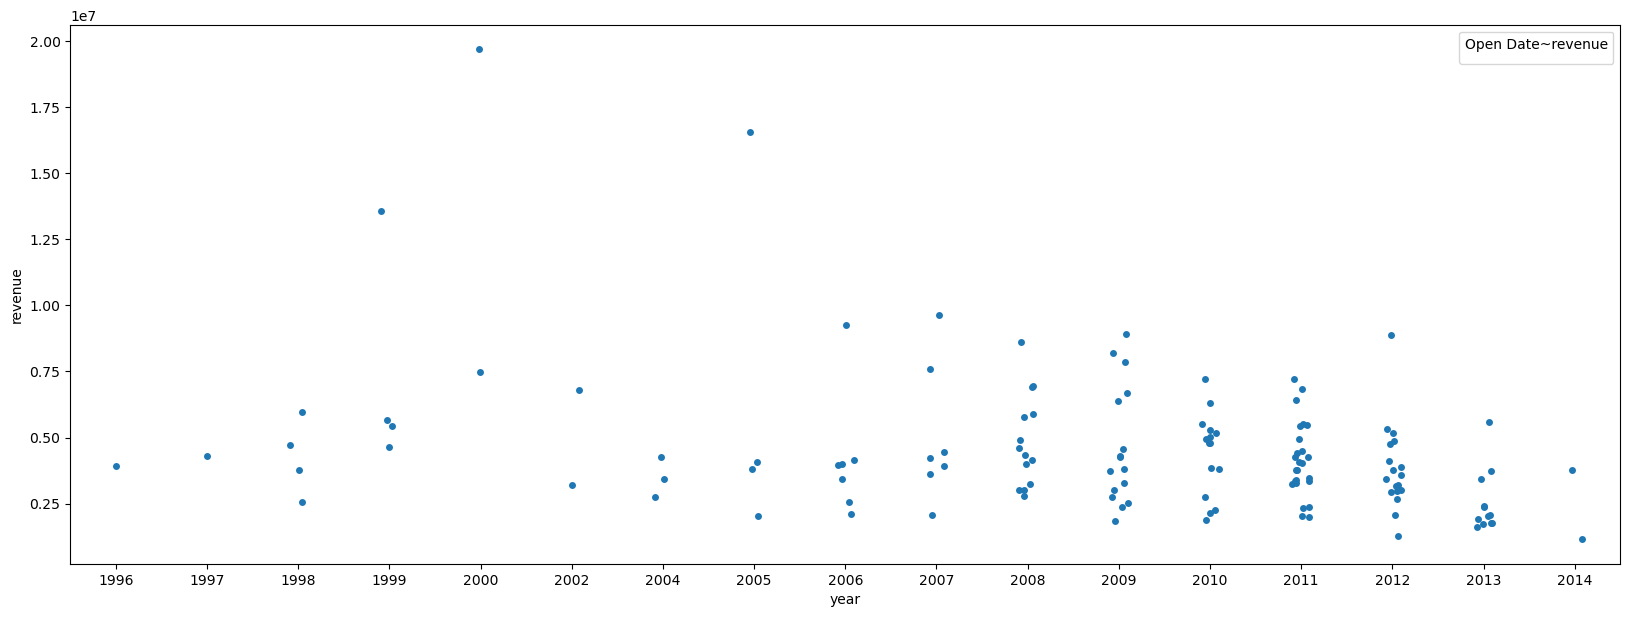

In [29]:
plt.figure(figsize=(20, 7)) 
sns.stripplot(x = 'year', y = "revenue", data = T_data1)
plt.legend(loc = "upper right", title = "Open Date~revenue")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


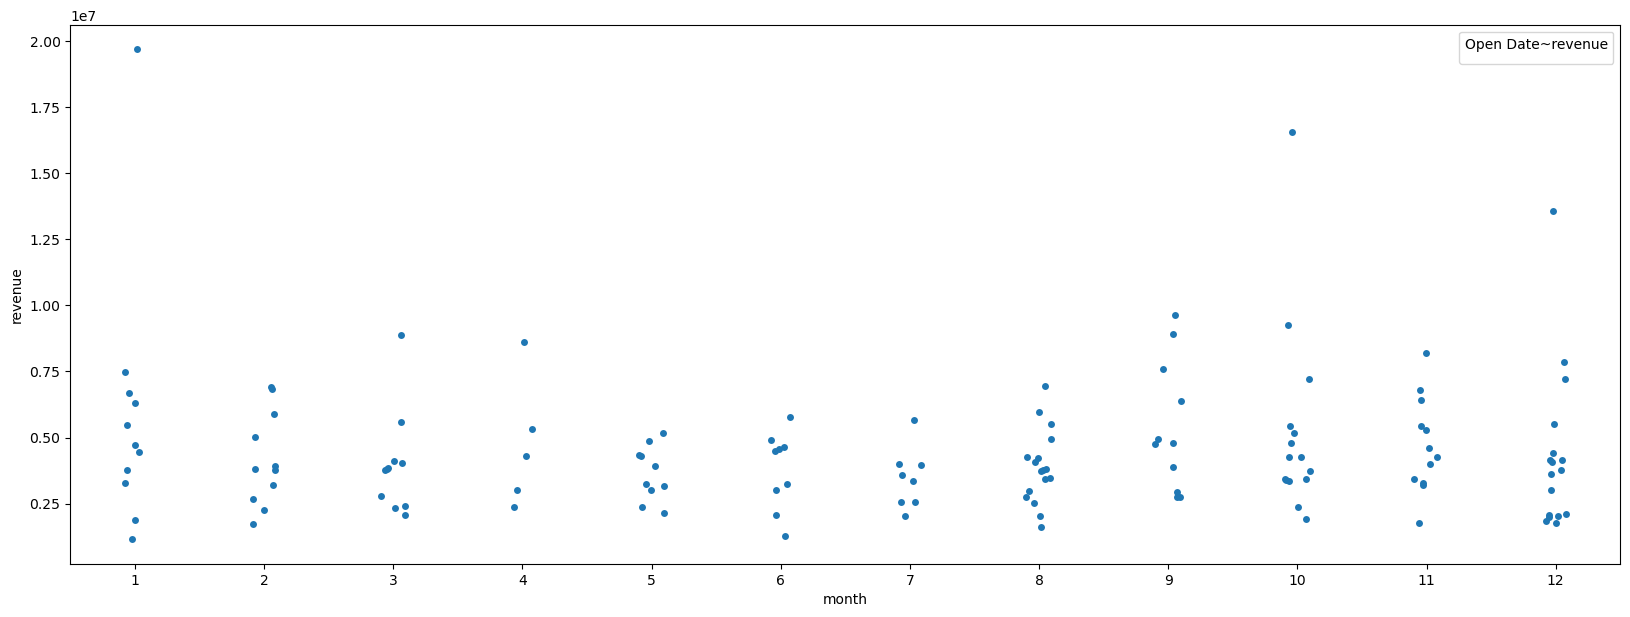

In [30]:
plt.figure(figsize=(20, 7)) 
sns.stripplot(x = 'month', y = "revenue", data = T_data1)
plt.legend(loc = "upper right", title = "Open Date~revenue")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


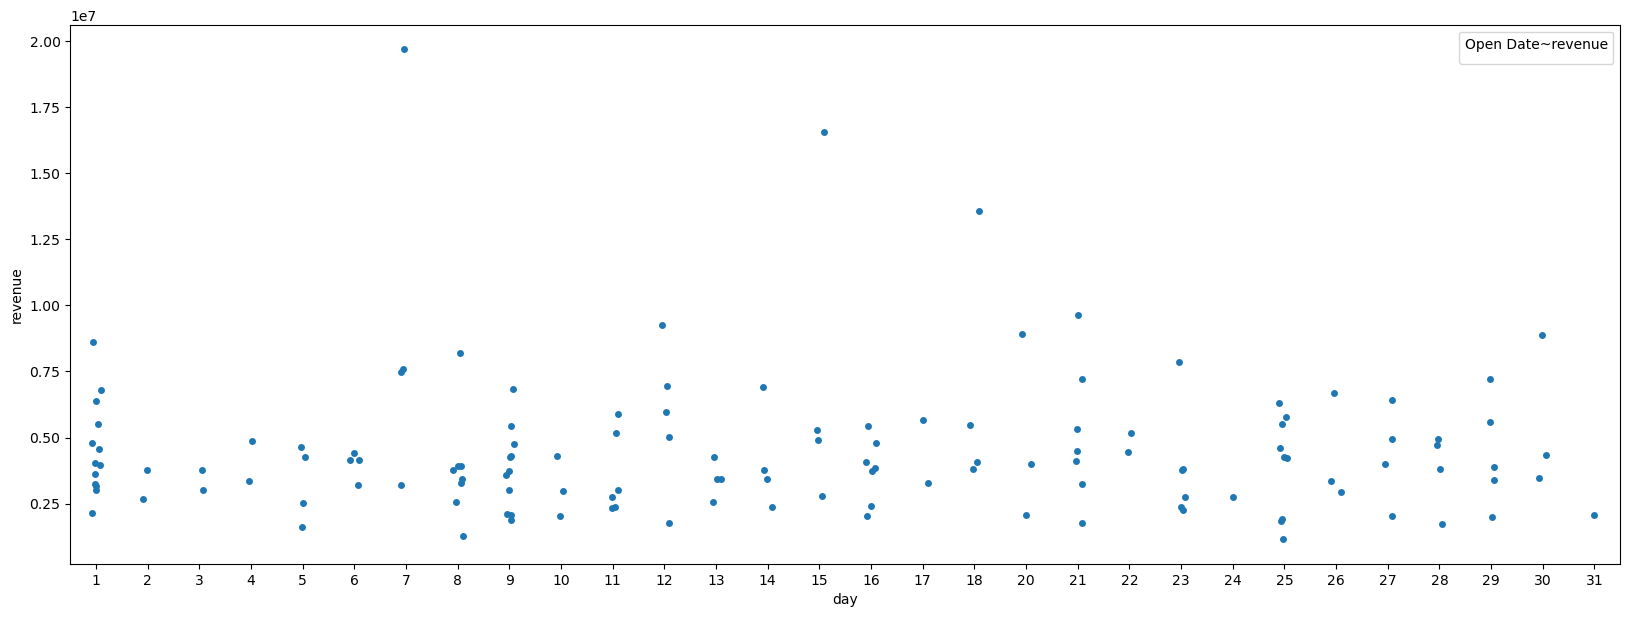

In [31]:
plt.figure(figsize=(20, 7)) 
sns.stripplot(x = 'day', y = "revenue", data = T_data1)
plt.legend(loc = "upper right", title = "Open Date~revenue")

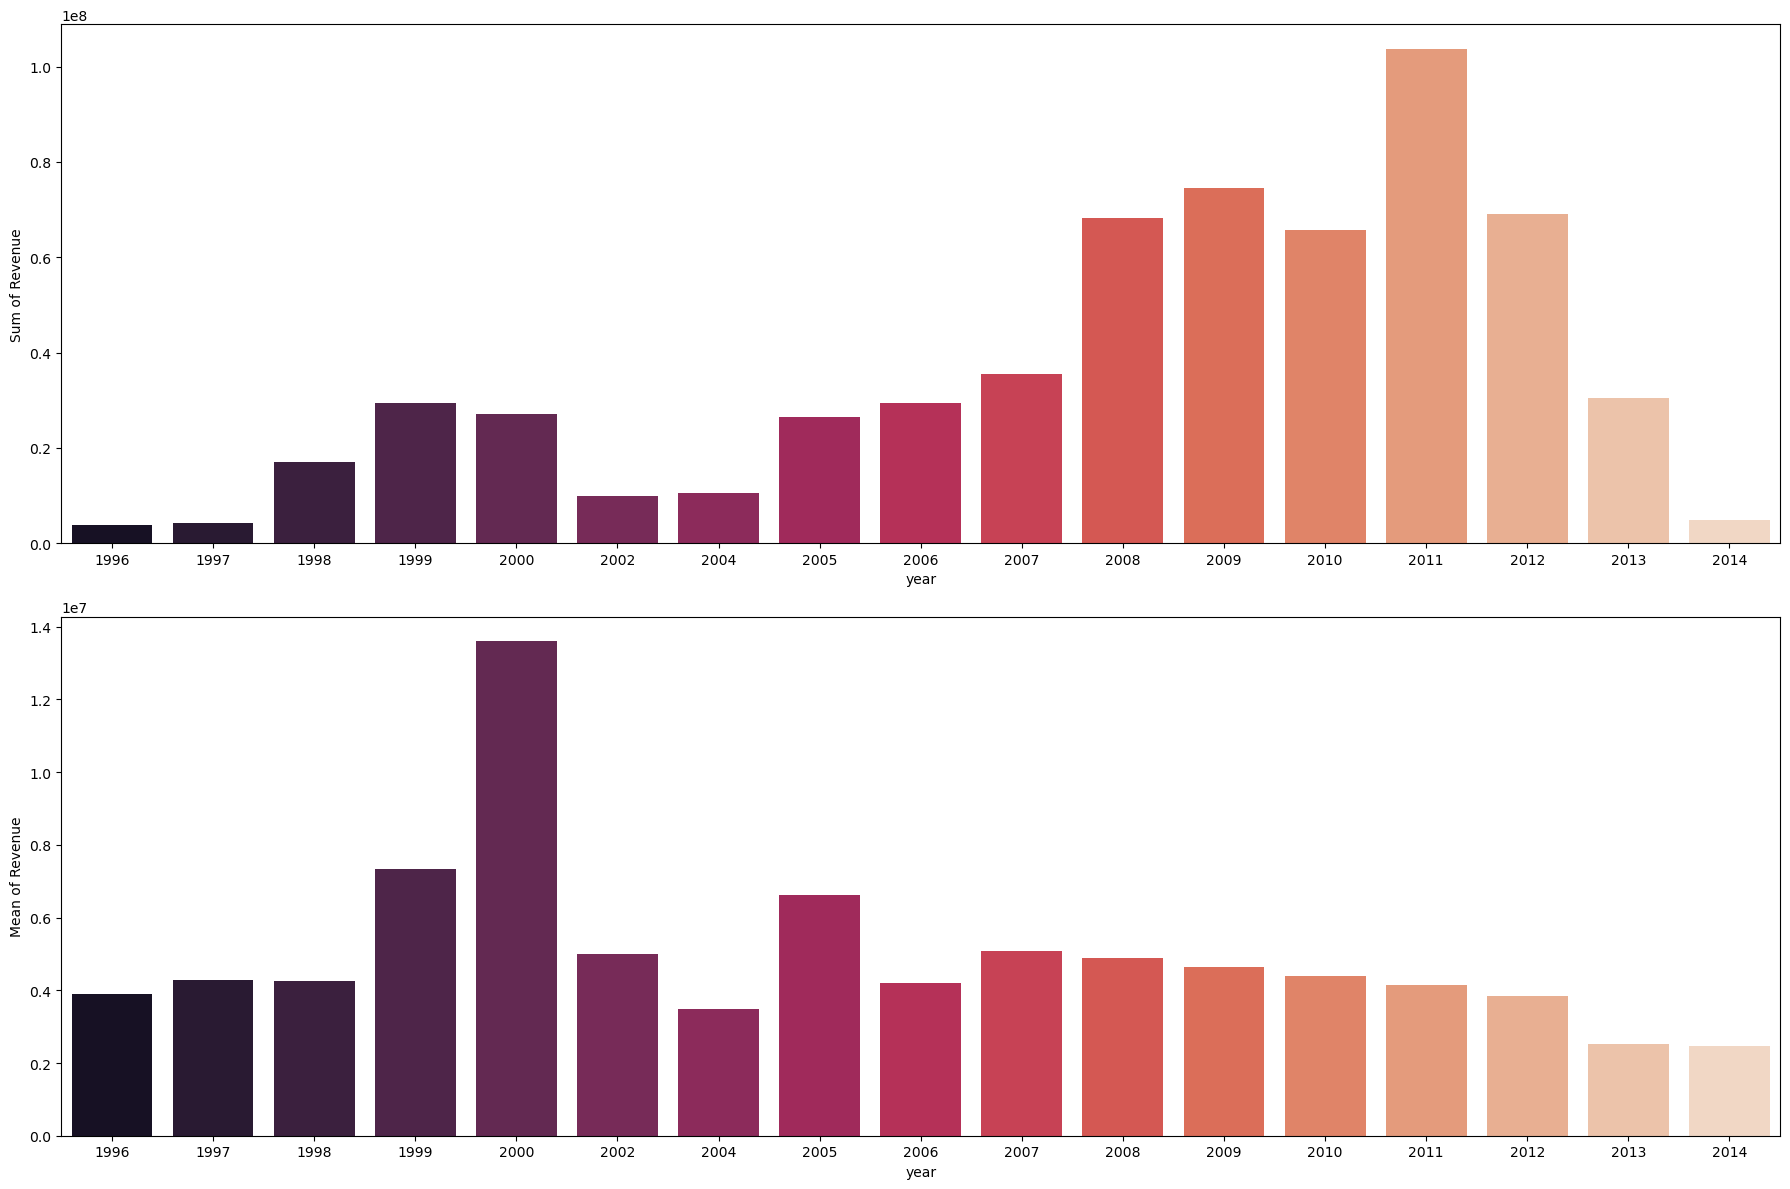

In [32]:
Year_df = T_data1.groupby("year")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=Year_df["year"],y=Year_df["sum"],ax=ax[0],palette = "rocket")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=Year_df["year"],y=Year_df["mean"],ax=ax[1],palette = "rocket")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

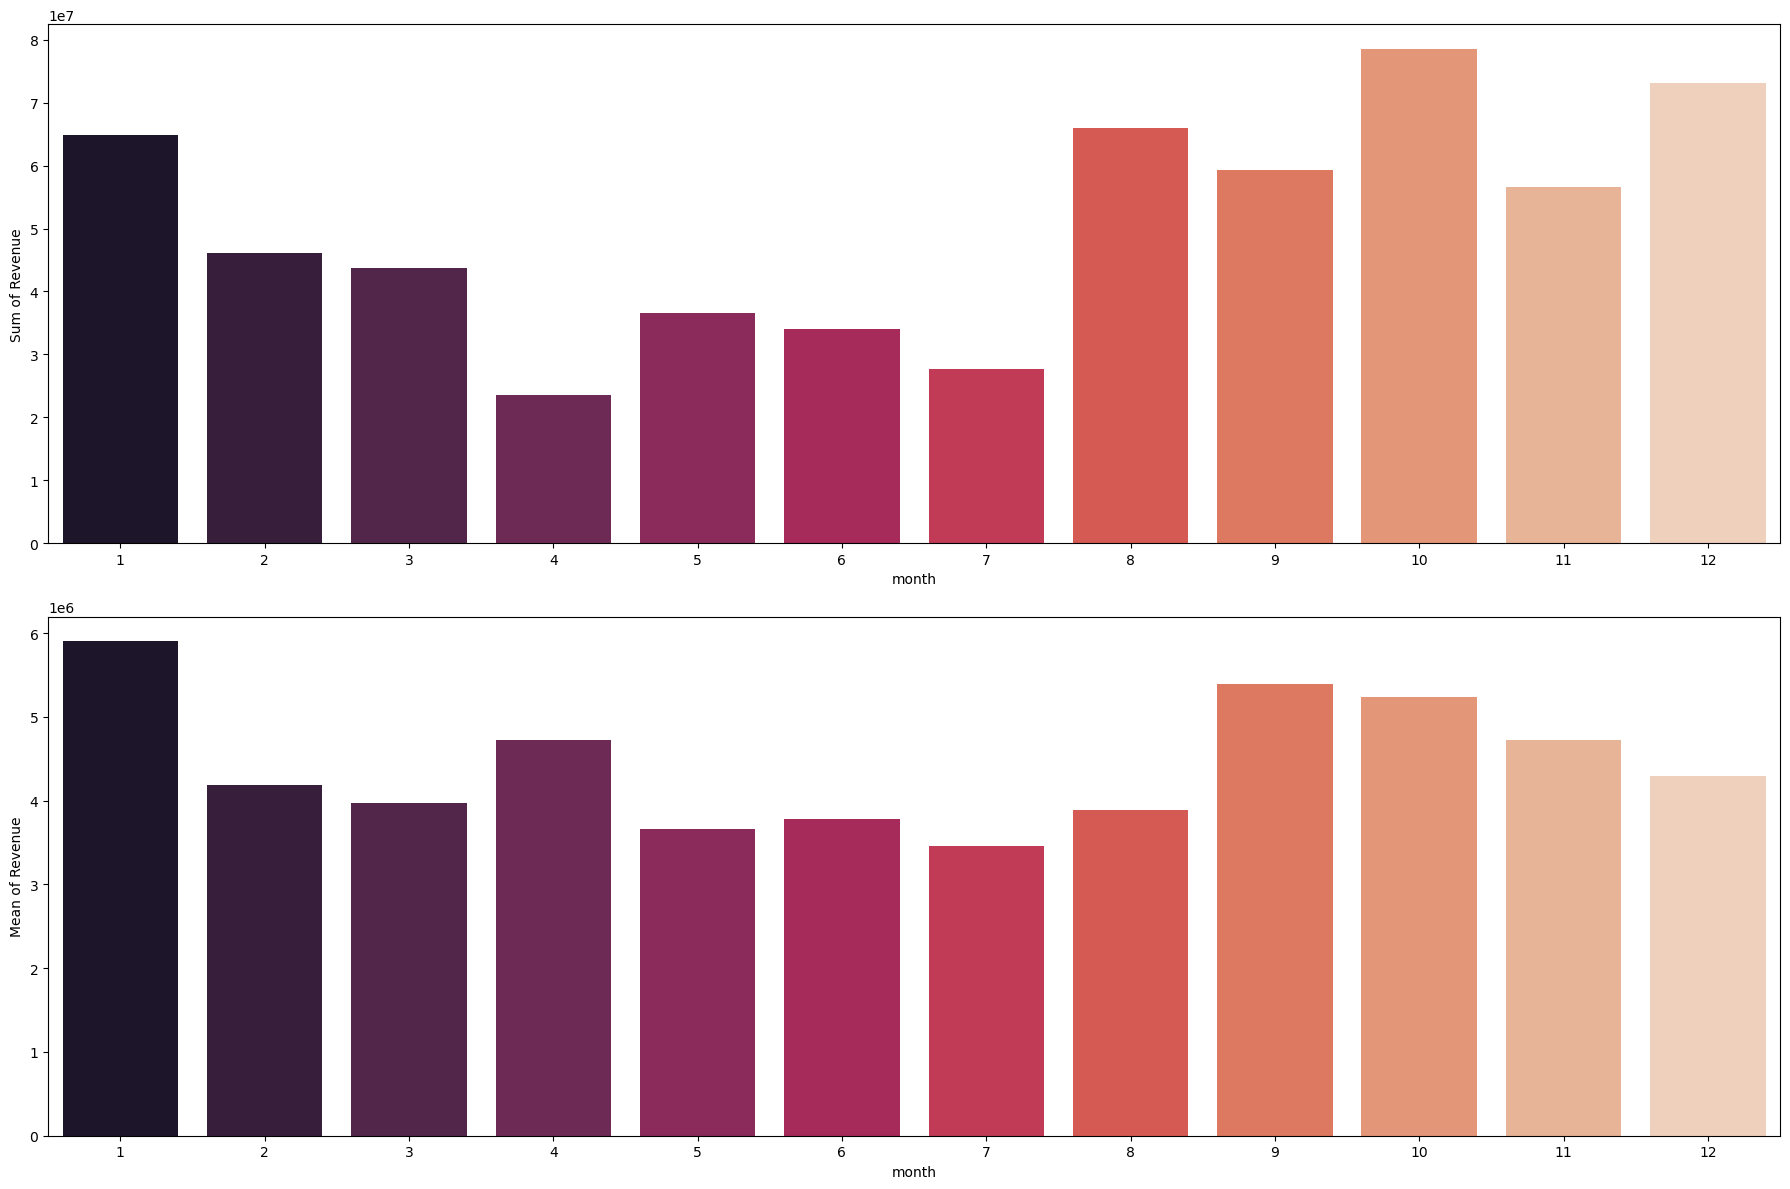

In [33]:
Month_df = T_data1.groupby("month")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=Month_df["month"],y=Month_df["sum"],ax=ax[0],palette = "rocket")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=Month_df["month"],y=Month_df["mean"],ax=ax[1],palette = "rocket")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

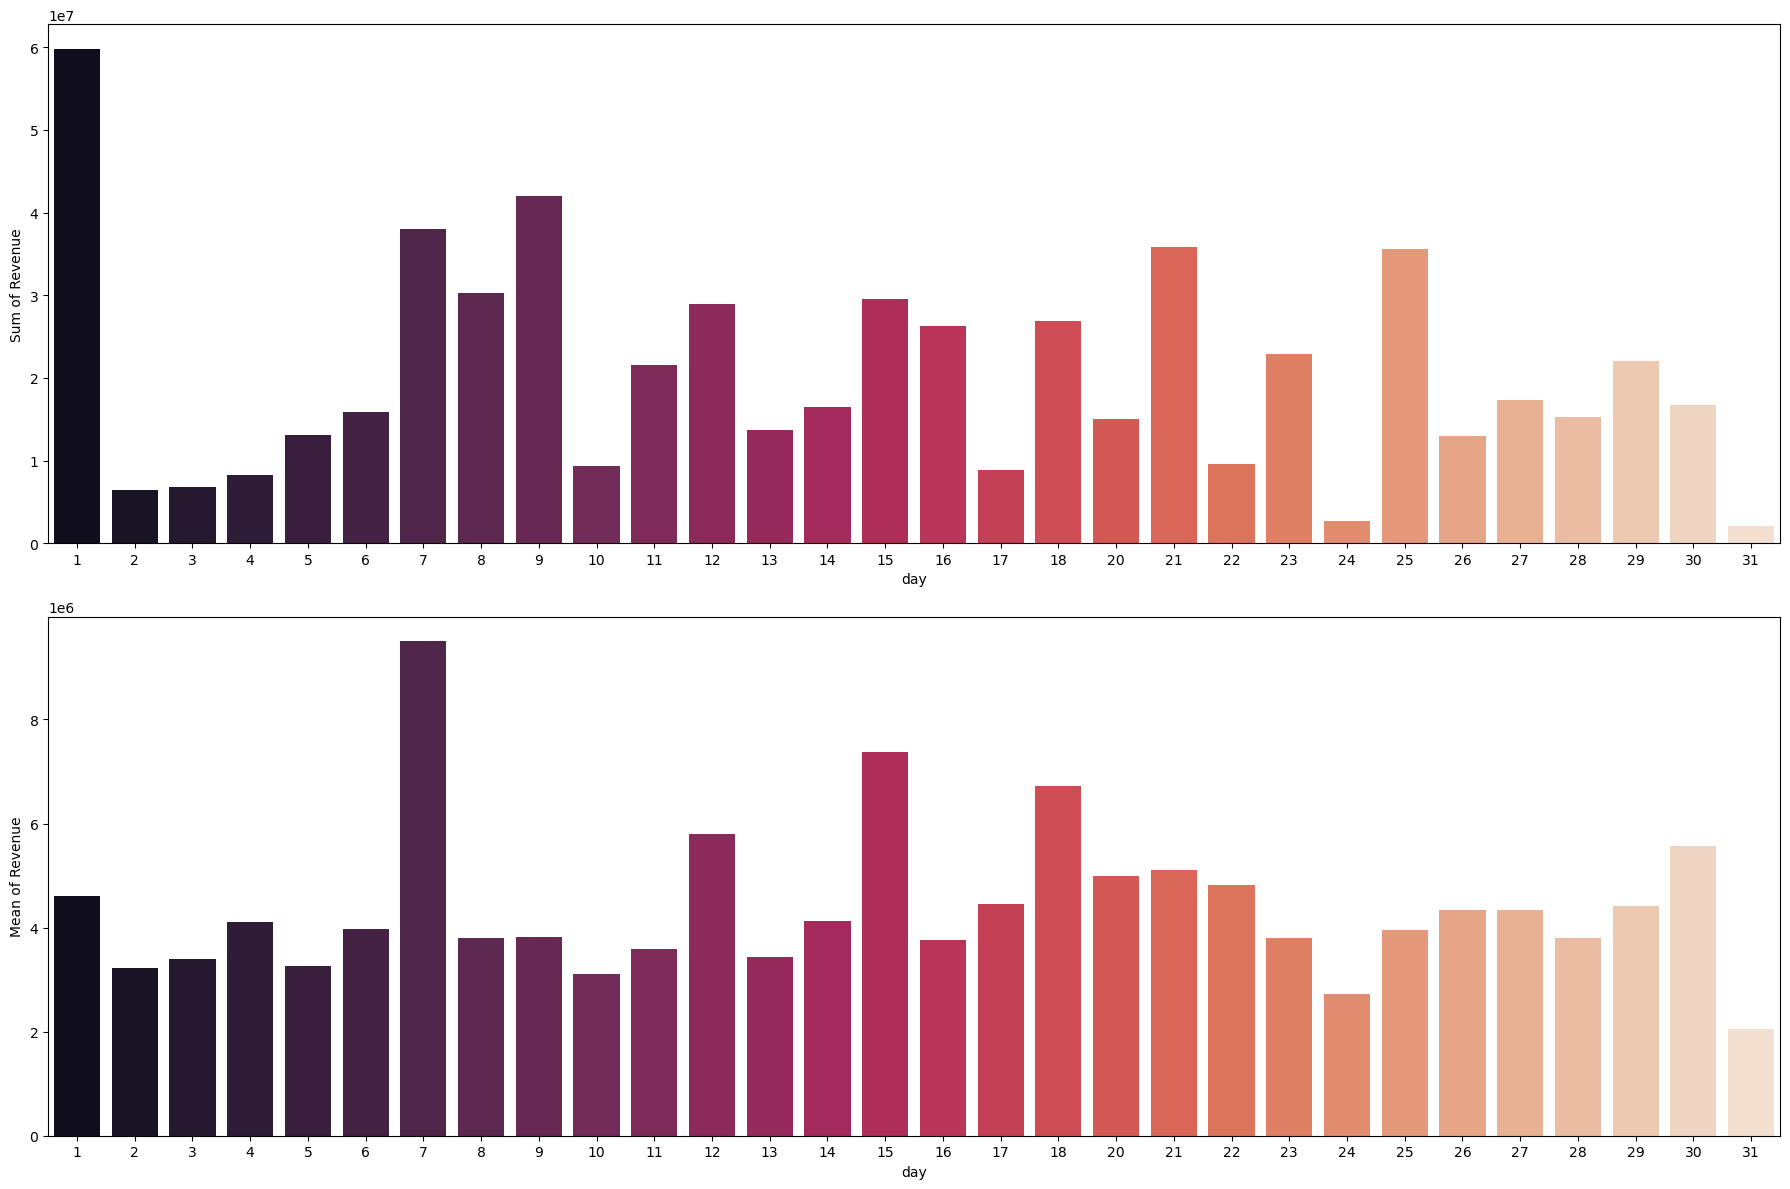

In [34]:
Day_df = T_data1.groupby("day")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=Day_df["day"],y=Day_df["sum"],ax=ax[0],palette = "rocket")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=Day_df["day"],y=Day_df["mean"],ax=ax[1],palette = "rocket")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

In [35]:
T_data1

Open Date         City  City Group Type  P1   P2   P3   P4  P5  P6  ...  \
0   1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...   
1   2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...   
2   2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3  ...   
3   2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   
4   2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...   
..         ...          ...         ...  ...  ..  ...  ...  ...  ..  ..  ...   
132 2008-06-25      Trabzon       Other   FC   2  3.0  3.0  5.0   4   2  ...   
133 2006-10-12       Ä°zmir  Big Cities   FC   4  5.0  4.0  4.0   2   3  ...   
134 2006-07-08      Kayseri       Other   FC   3  4.0  4.0  4.0   2   3  ...   
135 2010-10-29    Ä°stanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2  ...   
136 2009-09-01    Ä°stanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2  ...   

     P32  P33  P34  P35  P36  P37    revenue  year  month  day  
0      4    5    5    4    3    4  5653753.0  1999      7   17  
1      0    0    0    0    0    0  6923131.0  2008      2   14  
2      0    0    0    0    0    0  2055379.0  2013      3    9  
3     10    6   18   12   12    6  2675511.0  2012      2    2  
4      3    2    3    4    3    3  4316715.0  2009      5    9  
..   ...  ...  ...  ...  ...  ...        ...   ...    ...  ...  
132    0    0    0    0    0    0  5787594.0  2008      6   25  
133    0    0    0    0    0    0  9262754.0  2006     10   12  
134    0    0    0    0    0    0  2544857.0  2006      7    8  
135    0    0    0    0    0    0  7217634.0  2010     10   29  
136    0    0    0    0    0    0  6363241.0  2009      9    1  

[137 rows x 45 columns]

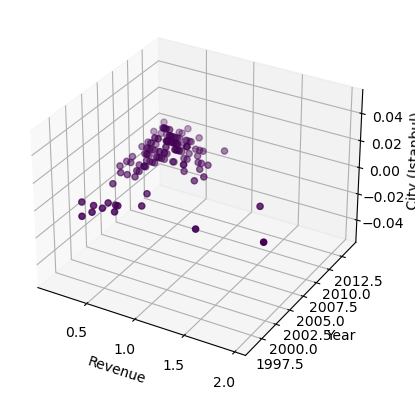

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting necessary columns from the dataset
revenue = T_data1['revenue']
year = T_data1['year']
city = T_data1['City']

# Assigning colors based on whether the city is Istanbul or not
color = city.apply(lambda x: 1 if x == 'Istanbul' else 0)

# Creating the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(revenue, year, color, c=color)

# Labeling the axes
ax.set_xlabel('Revenue')
ax.set_ylabel('Year')
ax.set_zlabel('City (Istanbul)')

# Show plot
plt.show()



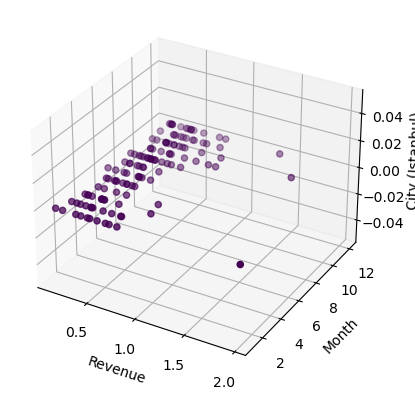

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting necessary columns from the dataset
revenue = T_data1['revenue']
month = T_data1['month']
city = T_data1['City']

# Assigning colors based on whether the city is Istanbul or not
color = city.apply(lambda x: 1 if x == 'Istanbul' else 0)

# Creating the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(revenue, month, color, c=color)

# Labeling the axes
ax.set_xlabel('Revenue')
ax.set_ylabel('Month')
ax.set_zlabel('City (Istanbul)')

# Show plot
plt.show()


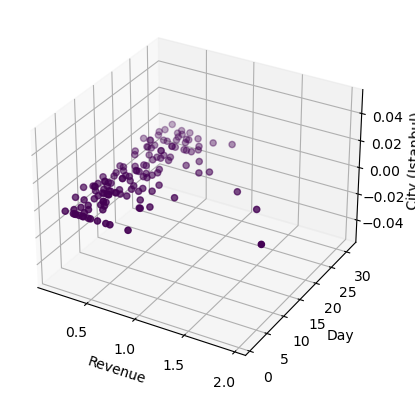

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting necessary columns from the dataset
revenue = T_data1['revenue']
day = T_data1['day']
city = T_data1['City']

# Assigning colors based on whether the city is Istanbul or not
color = city.apply(lambda x: 1 if x == 'Istanbul' else 0)

# Creating the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(revenue, day, color, c=color)

# Labeling the axes
ax.set_xlabel('Revenue')
ax.set_ylabel('Day')
ax.set_zlabel('City (Istanbul)')

# Show plot
plt.show()


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
T_data1

Open Date         City  City Group Type  P1   P2   P3   P4  P5  P6  P7  \
0   1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   
1   2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   
2   2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3   5   
3   2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10   
4   2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   5   
..         ...          ...         ...  ...  ..  ...  ...  ...  ..  ..  ..   
132 2008-06-25      Trabzon       Other   FC   2  3.0  3.0  5.0   4   2   4   
133 2006-10-12       Ä°zmir  Big Cities   FC   4  5.0  4.0  4.0   2   3   5   
134 2006-07-08      Kayseri       Other   FC   3  4.0  4.0  4.0   2   3   5   
135 2010-10-29    Ä°stanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2   5   
136 2009-09-01    Ä°stanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2   5   

     P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  \
0     4   5    5    3    5  5.0    1    2    2    2    4    5    4    1    3   
1     5   5    5    1    5  5.0    0    0    0    0    0    3    2    1    3   
2     5   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1   
3     8  10   10    8   10  7.5    6    4    9    3   12   20   12    6    1   
4     5   5    5    2    5  5.0    2    1    2    1    4    2    2    1    2   
..   ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132   4   4    4    4    4  4.0    0    0    0    0    0    4    3    2    1   
133   4   4    5    5    4  5.0    0    0    0    0    0    3    2    2    1   
134   5   5    5    1    5  5.0    0    0    0    0    0    2    3    1    2   
135   5   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1   
136   4   4    5    4    4  5.0    0    0    0    0    0    2    1    1    1   

     P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  \
0      3    1    1  1.0  4.0  2.0  3.0    5    3    4    5    5    4    3   
1      2    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0   
2      1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0   
3     10    2    2  2.5  2.5  2.5  7.5   25   12   10    6   18   12   12   
4      1    2    3  3.0  5.0  1.0  3.0    5    1    3    2    3    4    3   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    1    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
133    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0   
134    2    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
135    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0   
136    1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0   

     P37    revenue  year  month  day  
0      4  5653753.0  1999      7   17  
1      0  6923131.0  2008      2   14  
2      0  2055379.0  2013      3    9  
3      6  2675511.0  2012      2    2  
4      3  4316715.0  2009      5    9  
..   ...        ...   ...    ...  ...  
132    0  5787594.0  2008      6   25  
133    0  9262754.0  2006     10   12  
134    0  2544857.0  2006      7    8  
135    0  7217634.0  2010     10   29  
136    0  6363241.0  2009      9    1  

[137 rows x 45 columns]

In [41]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn import preprocessing

# # Define encoder function
# def encoder(data):
#     label_encoder= preprocessing.LabelEncoder()
#     data['City'] = label_encoder.fit_transform(data['City'])
#     data['Type'] = label_encoder.fit_transform(data['Type'])
#     data['City Group'] = label_encoder.fit_transform(data['City Group'])
#     return data

# # Apply encoder function to your data
# T_data_encoded = encoder(T_data1)

In [42]:
T_data1.head()

Open Date         City  City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  \
0 1999-07-17    Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   4   
1 2008-02-14       Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   5   
2 2013-03-09  DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3   5   5   
3 2012-02-02        Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10   8   
4 2009-05-09    Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   5   5   

   P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  \
0   5    5    3    5  5.0    1    2    2    2    4    5    4    1    3    3   
1   5    5    1    5  5.0    0    0    0    0    0    3    2    1    3    2   
2   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1    1   
3  10   10    8   10  7.5    6    4    9    3   12   20   12    6    1   10   
4   5    5    2    5  5.0    2    1    2    1    4    2    2    1    2    1   

   P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  \
0    1    1  1.0  4.0  2.0  3.0    5    3    4    5    5    4    3    4   
1    0    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
2    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0   
3    2    2  2.5  2.5  2.5  7.5   25   12   10    6   18   12   12    6   
4    2    3  3.0  5.0  1.0  3.0    5    1    3    2    3    4    3    3   

     revenue  year  month  day  
0  5653753.0  1999      7   17  
1  6923131.0  2008      2   14  
2  2055379.0  2013      3    9  
3  2675511.0  2012      2    2  
4  4316715.0  2009      5    9

In [43]:
T_data1 = T_data1.drop("Open Date", axis=1)
T_data1

City  City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  P9  P10  \
0      Ä°stanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   4   5    5   
1         Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   5   5    5   
2    DiyarbakÄ±r       Other   IL   2  4.0  2.0  5.0   2   3   5   5   5    5   
3          Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10   8  10   10   
4      Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   5   5   5    5   
..           ...         ...  ...  ..  ...  ...  ...  ..  ..  ..  ..  ..  ...   
132      Trabzon       Other   FC   2  3.0  3.0  5.0   4   2   4   4   4    4   
133       Ä°zmir  Big Cities   FC   4  5.0  4.0  4.0   2   3   5   4   4    5   
134      Kayseri       Other   FC   3  4.0  4.0  4.0   2   3   5   5   5    5   
135    Ä°stanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2   5   5   5    5   
136    Ä°stanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2   5   4   4    5   

     P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  \
0      3    5  5.0    1    2    2    2    4    5    4    1    3    3    1   
1      1    5  5.0    0    0    0    0    0    3    2    1    3    2    0   
2      2    5  5.0    0    0    0    0    0    1    1    1    1    1    0   
3      8   10  7.5    6    4    9    3   12   20   12    6    1   10    2   
4      2    5  5.0    2    1    2    1    4    2    2    1    2    1    2   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    4    4  4.0    0    0    0    0    0    4    3    2    1    1    0   
133    5    4  5.0    0    0    0    0    0    3    2    2    1    1    0   
134    1    5  5.0    0    0    0    0    0    2    3    1    2    2    0   
135    2    5  5.0    0    0    0    0    0    1    1    1    1    1    0   
136    4    4  5.0    0    0    0    0    0    2    1    1    1    1    0   

     P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  \
0      1  1.0  4.0  2.0  3.0    5    3    4    5    5    4    3    4   
1      0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
2      0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0   
3      2  2.5  2.5  2.5  7.5   25   12   10    6   18   12   12    6   
4      3  3.0  5.0  1.0  3.0    5    1    3    2    3    4    3    3   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0   
133    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
134    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0   
135    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   
136    0  0.0  0.0  3.0  3.0    0    0    0    0    0    0    0    0   

       revenue  year  month  day  
0    5653753.0  1999      7   17  
1    6923131.0  2008      2   14  
2    2055379.0  2013      3    9  
3    2675511.0  2012      2    2  
4    4316715.0  2009      5    9  
..         ...   ...    ...  ...  
132  5787594.0  2008      6   25  
133  9262754.0  2006     10   12  
134  2544857.0  2006      7    8  
135  7217634.0  2010     10   29  
136  6363241.0  2009      9    1  

[137 rows x 44 columns]

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming your DataFrame is named 'T_data1'
label_encoder = LabelEncoder()

# Encode 'City Group' column
T_data1['City Group'] = label_encoder.fit_transform(T_data1['City Group'])

# One-hot encode 'City' and 'Type' columns
T_data1 = pd.get_dummies(T_data1, columns=['City', 'Type'], drop_first=True)

# Convert boolean columns to integers (0 and 1)
T_data1 = T_data1.astype(int)

# Display the updated DataFrame
print(T_data1.head())


   City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           0   4   5   4   4   2   2   5   4   5    5    3    5    5    1   
1           0   4   5   4   4   1   2   5   5   5    5    1    5    5    0   
2           1   2   4   2   5   2   3   5   5   5    5    2    5    5    0   
3           1   6   4   6   6   4   4  10   8  10   10    8   10    7    6   
4           1   3   4   3   4   2   2   5   5   5    5    2    5    5    2   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    2    2    2    4    5    4    1    3    3    1    1    1    4    2    3   
1    0    0    0    0    3    2    1    3    2    0    0    0    0    3    3   
2    0    0    0    0    1    1    1    1    1    0    0    0    0    1    3   
3    4    9    3   12   20   12    6    1   10    2    2    2    2    2    7   
4    1    2    1    4    2    2    1    2    1    2    3    3    5    1    3   

   P30  P31  P32  P33  P34  P35  P36  P37  revenue

In [45]:
T_data1['Revenue']= T_data1['revenue']
T_data1.drop('revenue', axis=1, inplace=True)
T_data1

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0             0   4   5   4   4   2   2   5   4   5    5    3    5    5    1   
1             0   4   5   4   4   1   2   5   5   5    5    1    5    5    0   
2             1   2   4   2   5   2   3   5   5   5    5    2    5    5    0   
3             1   6   4   6   6   4   4  10   8  10   10    8   10    7    6   
4             1   3   4   3   4   2   2   5   5   5    5    2    5    5    2   
..          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
132           1   2   3   3   5   4   2   4   4   4    4    4    4    4    0   
133           0   4   5   4   4   2   3   5   4   4    5    5    4    5    0   
134           1   3   4   4   4   2   3   5   5   5    5    1    5    5    0   
135           0   4   5   4   5   2   2   5   5   5    5    2    5    5    0   
136           0   4   5   3   5   2   2   5   4   4    5    4    4    5    0   

     P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  \
0      2    2    2    4    5    4    1    3    3    1    1    1    4    2   
1      0    0    0    0    3    2    1    3    2    0    0    0    0    3   
2      0    0    0    0    1    1    1    1    1    0    0    0    0    1   
3      4    9    3   12   20   12    6    1   10    2    2    2    2    2   
4      1    2    1    4    2    2    1    2    1    2    3    3    5    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    0    0    0    0    4    3    2    1    1    0    0    0    0    2   
133    0    0    0    0    3    2    2    1    1    0    0    0    0    3   
134    0    0    0    0    2    3    1    2    2    0    0    0    0    2   
135    0    0    0    0    1    1    1    1    1    0    0    0    0    3   
136    0    0    0    0    2    1    1    1    1    0    0    0    0    3   

     P29  P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0      3    5    3    4    5    5    4    3    4  1999      7   17   
1      3    0    0    0    0    0    0    0    0  2008      2   14   
2      3    0    0    0    0    0    0    0    0  2013      3    9   
3      7   25   12   10    6   18   12   12    6  2012      2    2   
4      3    5    1    3    2    3    4    3    3  2009      5    9   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...   
132    3    0    0    0    0    0    0    0    0  2008      6   25   
133    3    0    0    0    0    0    0    0    0  2006     10   12   
134    3    0    0    0    0    0    0    0    0  2006      7    8   
135    3    0    0    0    0    0    0    0    0  2010     10   29   
136    3    0    0    0    0    0    0    0    0  2009      9    1   

     City_Afyonkarahisar  City_Amasya  City_Ankara  City_Antalya  City_AydÄ±n  \
0                      0            0            0             0            0   
1                      0            0            1             0            0   
2                      0            0            0             0            0   
3                      0            0            0             0            0   
4                      0            0            0             0            0   
..                   ...          ...          ...           ...          ...   
132                    0            0            0             0            0   
133                    0            0            0             0            0   
134                    0            0            0             0            0   
135                    0            0            0             0            0   
136                    0            0            0             0            0   

     City_BalÄ±kesir  City_Bolu  City_Bursa  City_Denizli  City_DiyarbakÄ±r  \
0                  0          0           0             0                 0   
1                  0          0           0             0                 0   
2                  0          0           0             0           

In [46]:
T_data1

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0             0   4   5   4   4   2   2   5   4   5    5    3    5    5    1   
1             0   4   5   4   4   1   2   5   5   5    5    1    5    5    0   
2             1   2   4   2   5   2   3   5   5   5    5    2    5    5    0   
3             1   6   4   6   6   4   4  10   8  10   10    8   10    7    6   
4             1   3   4   3   4   2   2   5   5   5    5    2    5    5    2   
..          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
132           1   2   3   3   5   4   2   4   4   4    4    4    4    4    0   
133           0   4   5   4   4   2   3   5   4   4    5    5    4    5    0   
134           1   3   4   4   4   2   3   5   5   5    5    1    5    5    0   
135           0   4   5   4   5   2   2   5   5   5    5    2    5    5    0   
136           0   4   5   3   5   2   2   5   4   4    5    4    4    5    0   

     P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  \
0      2    2    2    4    5    4    1    3    3    1    1    1    4    2   
1      0    0    0    0    3    2    1    3    2    0    0    0    0    3   
2      0    0    0    0    1    1    1    1    1    0    0    0    0    1   
3      4    9    3   12   20   12    6    1   10    2    2    2    2    2   
4      1    2    1    4    2    2    1    2    1    2    3    3    5    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    0    0    0    0    4    3    2    1    1    0    0    0    0    2   
133    0    0    0    0    3    2    2    1    1    0    0    0    0    3   
134    0    0    0    0    2    3    1    2    2    0    0    0    0    2   
135    0    0    0    0    1    1    1    1    1    0    0    0    0    3   
136    0    0    0    0    2    1    1    1    1    0    0    0    0    3   

     P29  P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0      3    5    3    4    5    5    4    3    4  1999      7   17   
1      3    0    0    0    0    0    0    0    0  2008      2   14   
2      3    0    0    0    0    0    0    0    0  2013      3    9   
3      7   25   12   10    6   18   12   12    6  2012      2    2   
4      3    5    1    3    2    3    4    3    3  2009      5    9   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...   
132    3    0    0    0    0    0    0    0    0  2008      6   25   
133    3    0    0    0    0    0    0    0    0  2006     10   12   
134    3    0    0    0    0    0    0    0    0  2006      7    8   
135    3    0    0    0    0    0    0    0    0  2010     10   29   
136    3    0    0    0    0    0    0    0    0  2009      9    1   

     City_Afyonkarahisar  City_Amasya  City_Ankara  City_Antalya  City_AydÄ±n  \
0                      0            0            0             0            0   
1                      0            0            1             0            0   
2                      0            0            0             0            0   
3                      0            0            0             0            0   
4                      0            0            0             0            0   
..                   ...          ...          ...           ...          ...   
132                    0            0            0             0            0   
133                    0            0            0             0            0   
134                    0            0            0             0            0   
135                    0            0            0             0            0   
136                    0            0            0             0            0   

     City_BalÄ±kesir  City_Bolu  City_Bursa  City_Denizli  City_DiyarbakÄ±r  \
0                  0          0           0             0                 0   
1                  0          0           0             0                 0   
2                  0          0           0             0           

In [47]:
non_numeric_columns = T_data1.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index([], dtype='object')


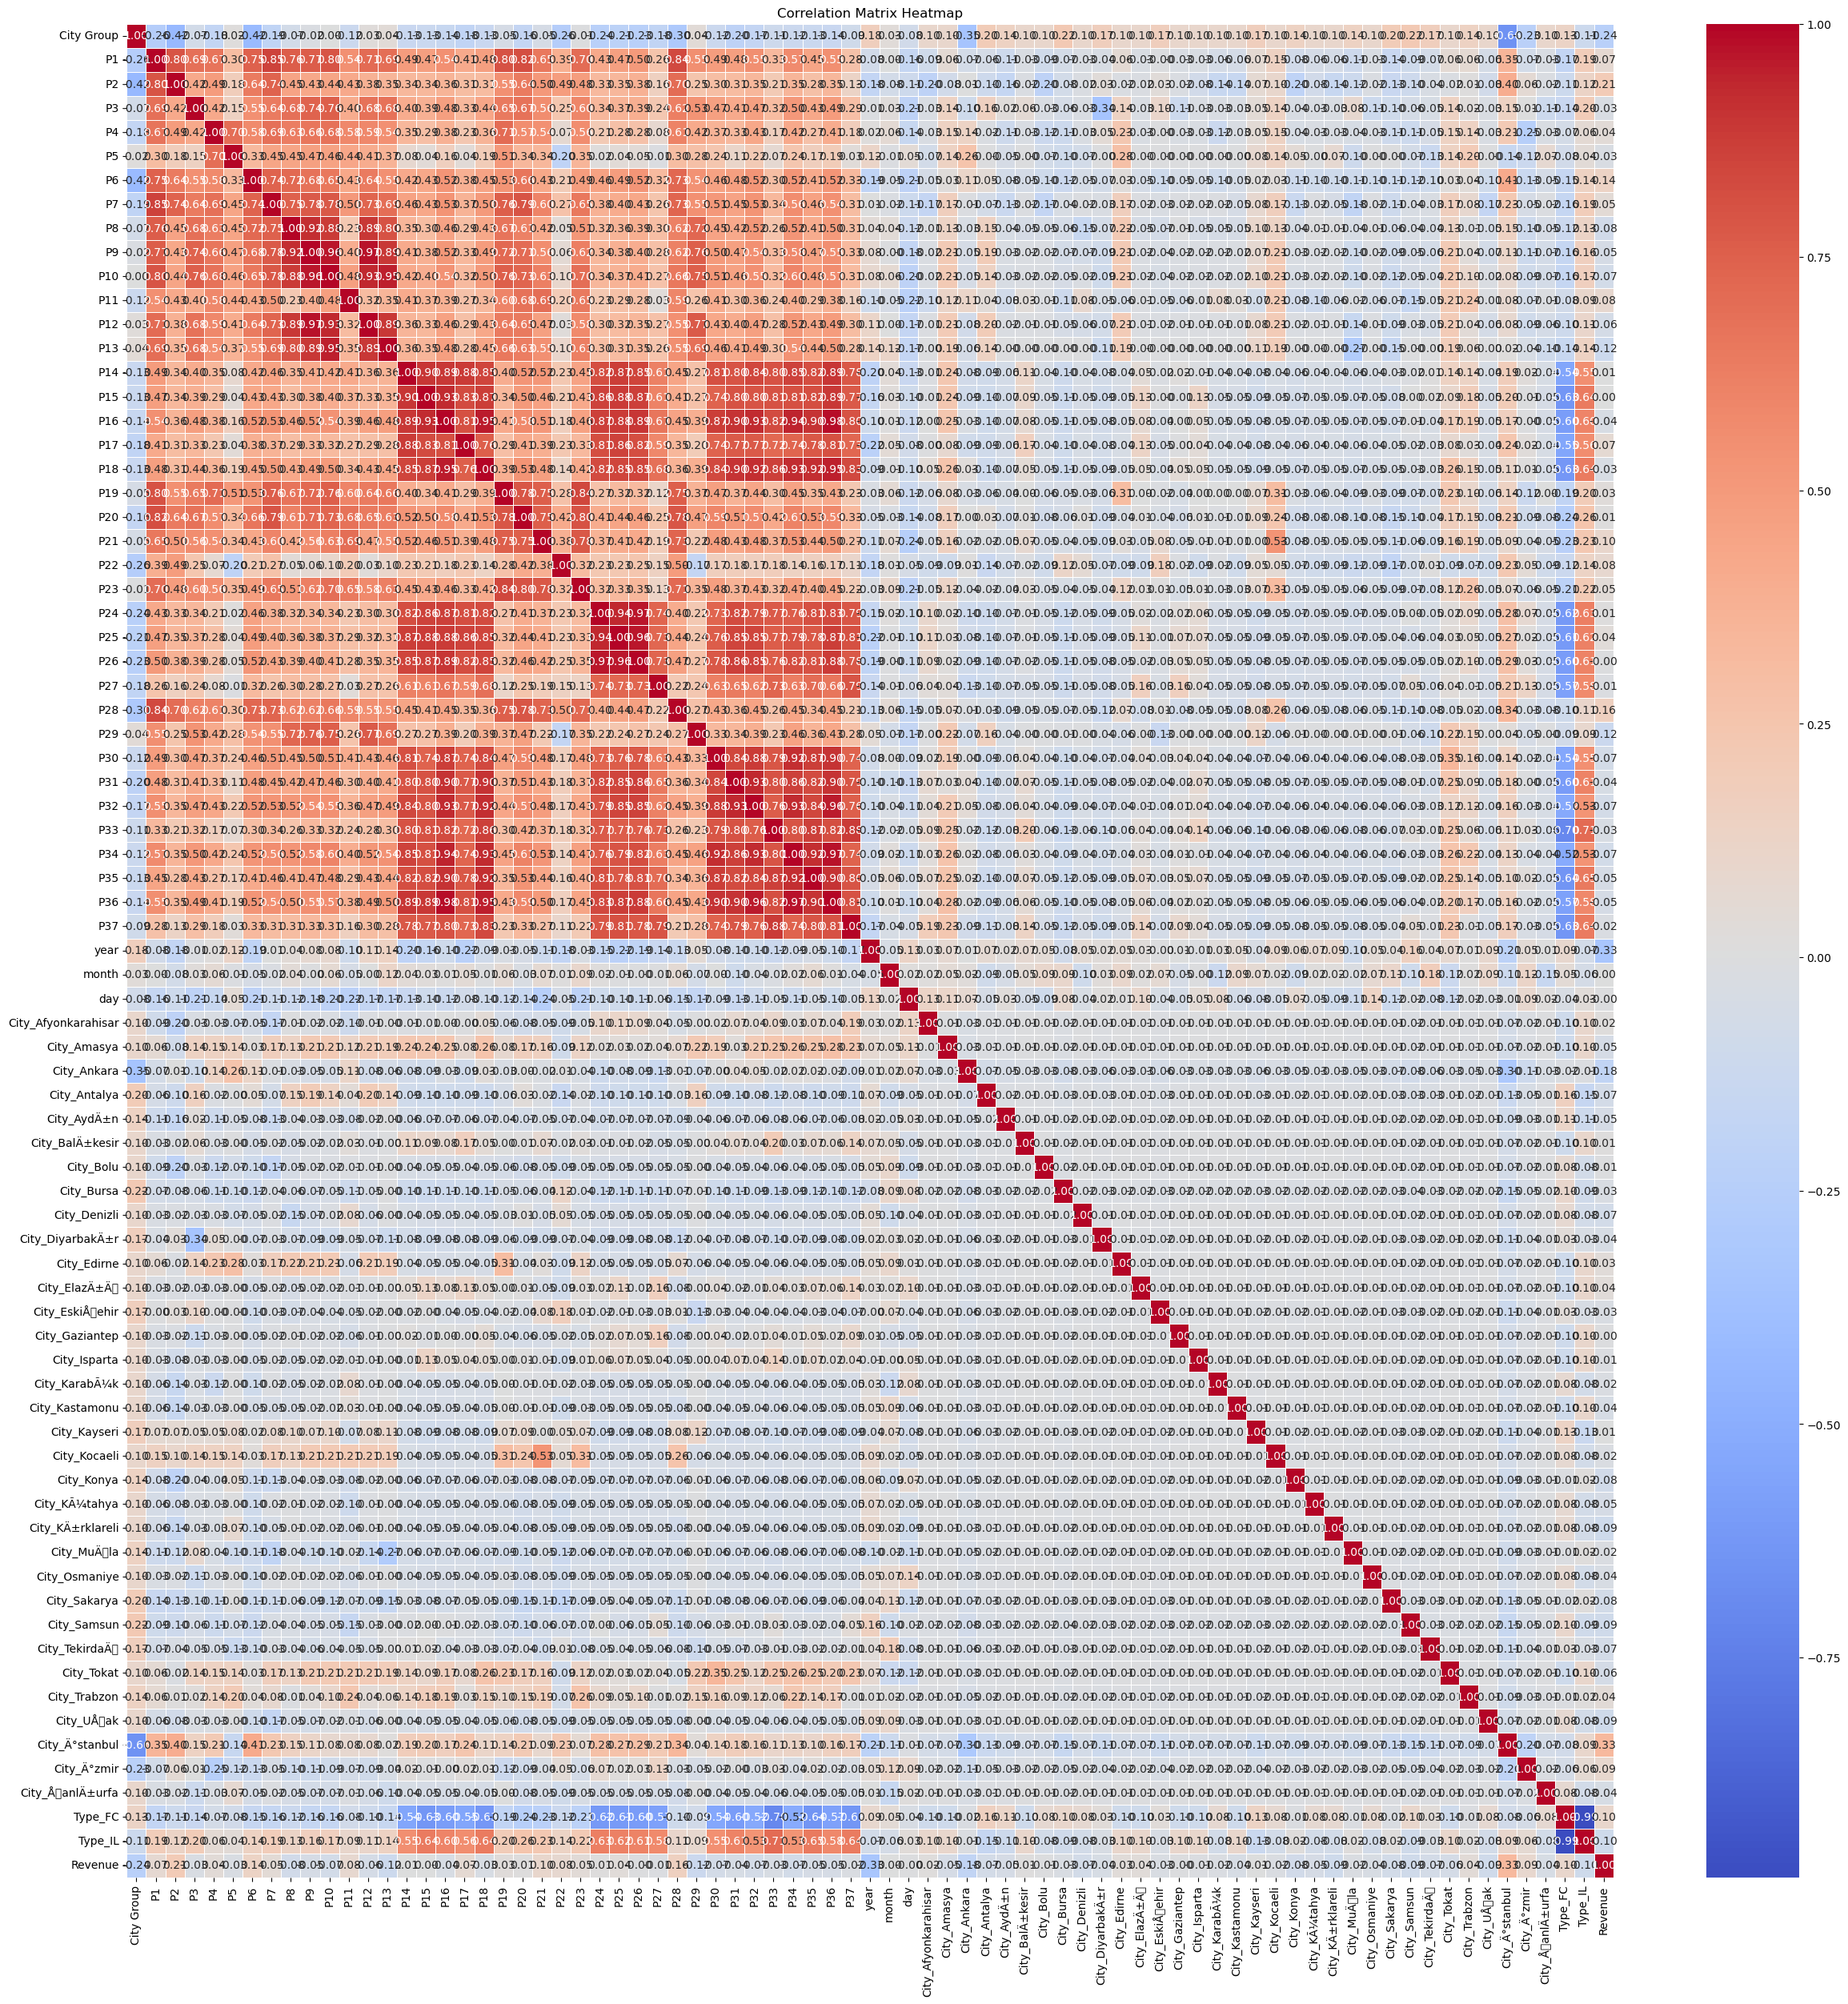

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = T_data1.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.title('Correlation Matrix Heatmap')
plt.show()

In [49]:

T_data1.drop("City_Gaziantep",axis=1,inplace = True)

In [50]:
T_data1.drop("City_Bolu",axis=1,inplace = True)

In [51]:
T_data1.drop("City_Konya",axis=1,inplace = True)

In [52]:
T_data1.drop("City_Trabzon",axis=1,inplace = True)

In [53]:
# # Replace NaN with 0 and 1
# replacement_values = {'City_Bolu': 0, 'City_Gaziantep': 0, 'City_Konya': 0, 'City_Trabzon': 0}
# T_data2.fillna(replacement_values, inplace=True)

In [54]:
T_data1

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0             0   4   5   4   4   2   2   5   4   5    5    3    5    5    1   
1             0   4   5   4   4   1   2   5   5   5    5    1    5    5    0   
2             1   2   4   2   5   2   3   5   5   5    5    2    5    5    0   
3             1   6   4   6   6   4   4  10   8  10   10    8   10    7    6   
4             1   3   4   3   4   2   2   5   5   5    5    2    5    5    2   
..          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
132           1   2   3   3   5   4   2   4   4   4    4    4    4    4    0   
133           0   4   5   4   4   2   3   5   4   4    5    5    4    5    0   
134           1   3   4   4   4   2   3   5   5   5    5    1    5    5    0   
135           0   4   5   4   5   2   2   5   5   5    5    2    5    5    0   
136           0   4   5   3   5   2   2   5   4   4    5    4    4    5    0   

     P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  \
0      2    2    2    4    5    4    1    3    3    1    1    1    4    2   
1      0    0    0    0    3    2    1    3    2    0    0    0    0    3   
2      0    0    0    0    1    1    1    1    1    0    0    0    0    1   
3      4    9    3   12   20   12    6    1   10    2    2    2    2    2   
4      1    2    1    4    2    2    1    2    1    2    3    3    5    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
132    0    0    0    0    4    3    2    1    1    0    0    0    0    2   
133    0    0    0    0    3    2    2    1    1    0    0    0    0    3   
134    0    0    0    0    2    3    1    2    2    0    0    0    0    2   
135    0    0    0    0    1    1    1    1    1    0    0    0    0    3   
136    0    0    0    0    2    1    1    1    1    0    0    0    0    3   

     P29  P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0      3    5    3    4    5    5    4    3    4  1999      7   17   
1      3    0    0    0    0    0    0    0    0  2008      2   14   
2      3    0    0    0    0    0    0    0    0  2013      3    9   
3      7   25   12   10    6   18   12   12    6  2012      2    2   
4      3    5    1    3    2    3    4    3    3  2009      5    9   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...   
132    3    0    0    0    0    0    0    0    0  2008      6   25   
133    3    0    0    0    0    0    0    0    0  2006     10   12   
134    3    0    0    0    0    0    0    0    0  2006      7    8   
135    3    0    0    0    0    0    0    0    0  2010     10   29   
136    3    0    0    0    0    0    0    0    0  2009      9    1   

     City_Afyonkarahisar  City_Amasya  City_Ankara  City_Antalya  City_AydÄ±n  \
0                      0            0            0             0            0   
1                      0            0            1             0            0   
2                      0            0            0             0            0   
3                      0            0            0             0            0   
4                      0            0            0             0            0   
..                   ...          ...          ...           ...          ...   
132                    0            0            0             0            0   
133                    0            0            0             0            0   
134                    0            0            0             0            0   
135                    0            0            0             0            0   
136                    0            0            0             0            0   

     City_BalÄ±kesir  City_Bursa  City_Denizli  City_DiyarbakÄ±r  City_Edirne  \
0                  0           0             0                 0            0   
1                  0           0             0                 0            0   
2                  0           0             0                

In [55]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Assuming you have a DataFrame 'df' with your features and target variable
# # X is the feature matrix, and y is the target variable

# # Exclude datetime columns
# X = T_data1.drop(['revenue'], axis=1)
# y = T_data1['revenue']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Calculate VIF for each feature
# def calculate_vif(data_frame):
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = data_frame.columns
#     vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
#     return vif_data

# # Display VIF values
# vif_df = calculate_vif(X_train)
# print(vif_df)


In [56]:
# import statsmodels.api as sm
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Assuming you have a DataFrame 'df' with your features and target variable
# # X is the feature matrix, and y is the target variable

# # Add a constant term for the intercept
# X_train = sm.add_constant(X_train)

# # Fit a linear regression model using Ordinary Least Squares (OLS)
# model = sm.OLS(y_train, X_train).fit()

# # Display the summary statistics
# print(model.summary())


In [57]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your features
# X is the feature matrix
X = T_data1.drop(['Revenue'], axis=1)
y = T_data1['Revenue']
# Define a correlation threshold
correlation_threshold = 0.8  # Adjust as needed

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Find highly correlated variable pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Display highly correlated variable pairs
if len(highly_correlated_pairs) > 0:
    print("Highly correlated variable pairs:")
    for pair in highly_correlated_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]}")
else:
    print("No highly correlated variable pairs found.")


Highly correlated variable pairs:
P1 and P7: 0.8537532695076292
P1 and P19: 0.8024940458945758
P1 and P20: 0.8209526096761871
P1 and P28: 0.8365448911418956
P8 and P9: 0.9199559970191745
P8 and P10: 0.8816504365674672
P8 and P12: 0.8898286157992552
P9 and P10: 0.9612656321721725
P9 and P12: 0.9715929506200703
P9 and P13: 0.8859531353420469
P10 and P12: 0.9304528386278579
P10 and P13: 0.9497564558006063
P12 and P13: 0.8851471355438238
P14 and P15: 0.8983702292006378
P14 and P16: 0.8900379723683912
P14 and P17: 0.8780692934705464
P14 and P18: 0.8507132954301847
P14 and P24: 0.8204703546630375
P14 and P25: 0.8737807240866462
P14 and P26: 0.8496964119557686
P14 and P30: 0.8127124239956234
P14 and P32: 0.8405919542887765
P14 and P33: 0.8010546188546422
P14 and P34: 0.8538237735745546
P14 and P35: 0.8155504172505486
P14 and P36: 0.8924587801504597
P15 and P16: 0.9295514077594325
P15 and P17: 0.8288431701916151
P15 and P18: 0.8721931570552348
P15 and P24: 0.8558136269746822
P15 and P25: 0.876

             Feature  Importance
39             month    0.058824
2                 P2    0.058824
5                 P5    0.051471
40               day    0.051471
29               P29    0.044118
..               ...         ...
17               P17    0.000000
48      City_Denizli    0.000000
47        City_Bursa    0.000000
46   City_BalÄ±kesir    0.000000
49  City_DiyarbakÄ±r    0.000000

[72 rows x 2 columns]


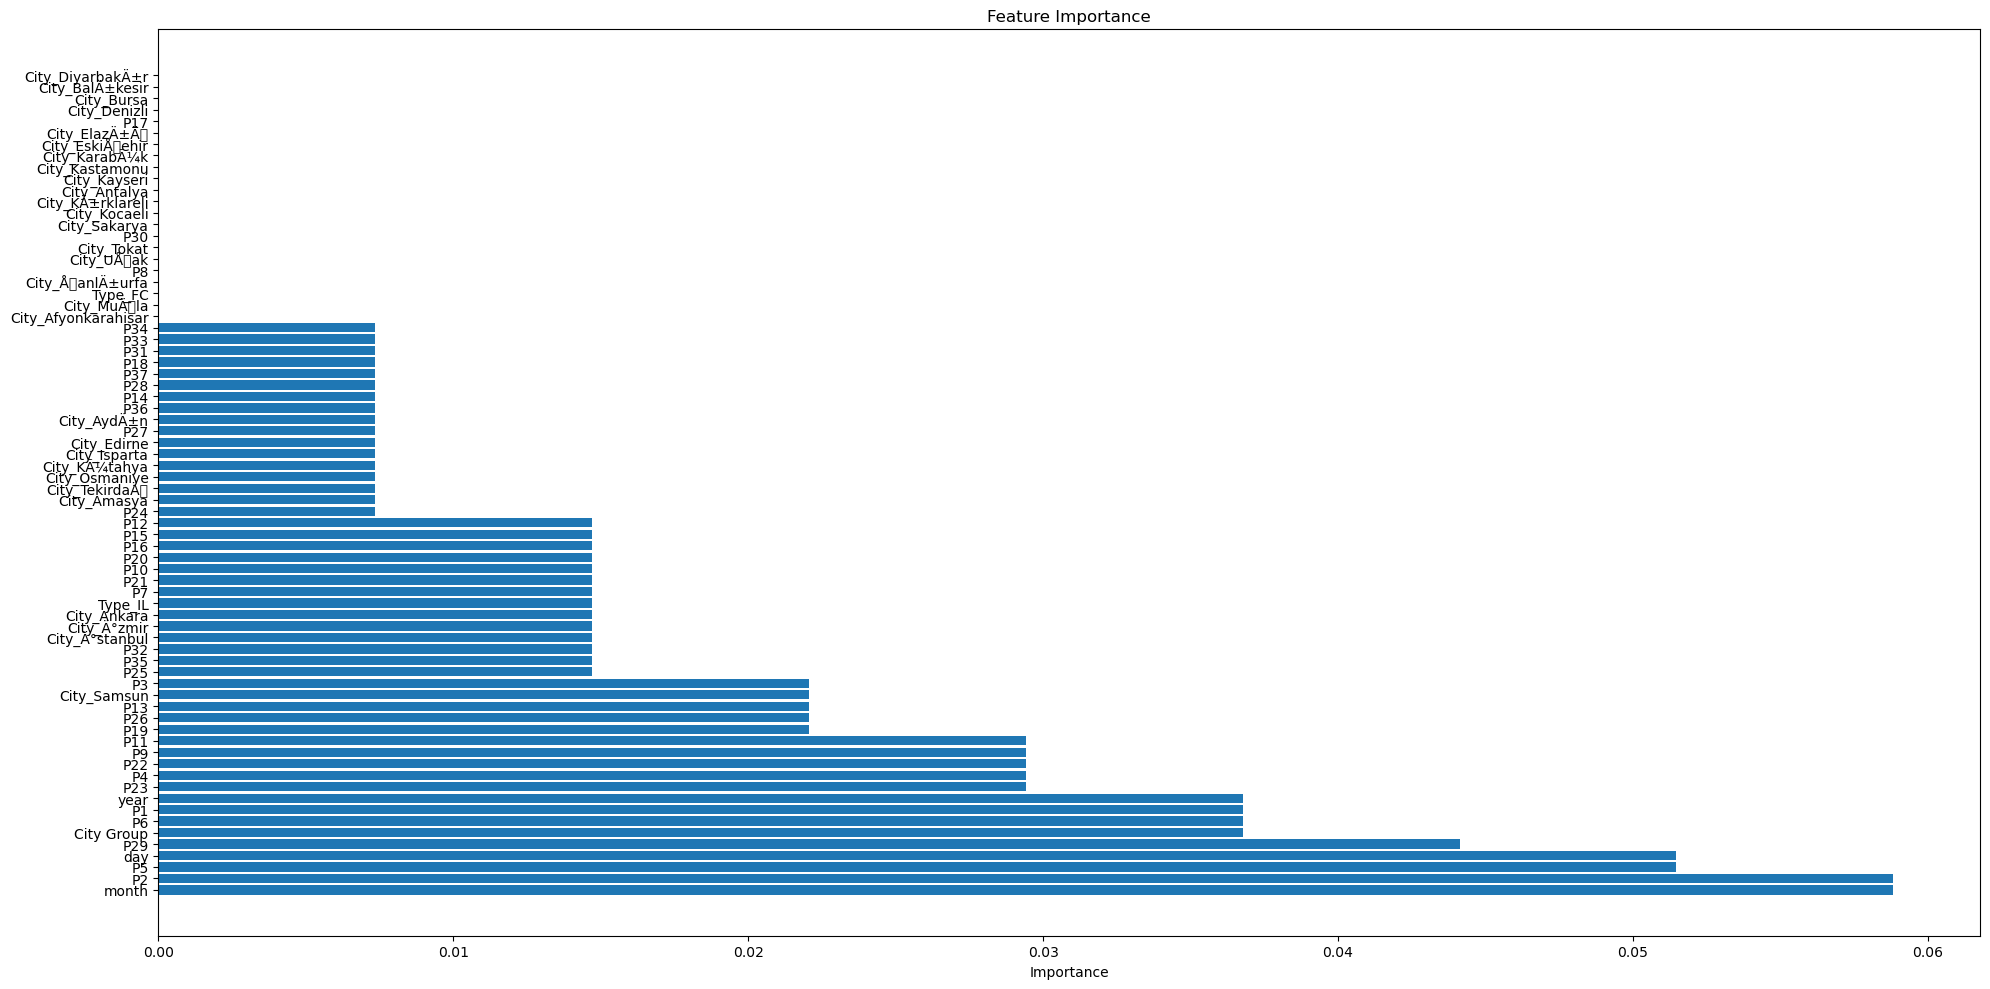

In [58]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your target variable
# You may need to encode categorical variables and handle missing values

# Train a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [59]:
# Select the top 10 features
top_10_features = importance_df.head(10)['Feature']

# Convert top 10 features to a list
x_selected_features = top_10_features.tolist()

# Print the selected features
# Filter out columns that are not present in the DataFrame
x_selected_features = [col for col in x_selected_features if col in T_data1.columns]

# Extract the data for the selected features
X_selected_data = T_data1[x_selected_features]

# Print the selected features along with the data
print("Selected features with data:")
print(X_selected_data)


Selected features with data:
     month  P2  P5  day  P29  City Group  P6  P1  year  P23
0        7   5   2   17    3           0   2   4  1999    3
1        2   5   1   14    3           0   2   4  2008    2
2        3   4   2    9    3           1   3   2  2013    1
3        2   4   4    2    7           1   4   6  2012   10
4        5   4   2    9    3           1   2   3  2009    1
..     ...  ..  ..  ...  ...         ...  ..  ..   ...  ...
132      6   3   4   25    3           1   2   2  2008    1
133     10   5   2   12    3           0   3   4  2006    1
134      7   4   2    8    3           1   3   3  2006    2
135     10   5   2   29    3           0   2   4  2010    1
136      9   5   2    1    3           0   2   4  2009    1

[137 rows x 10 columns]


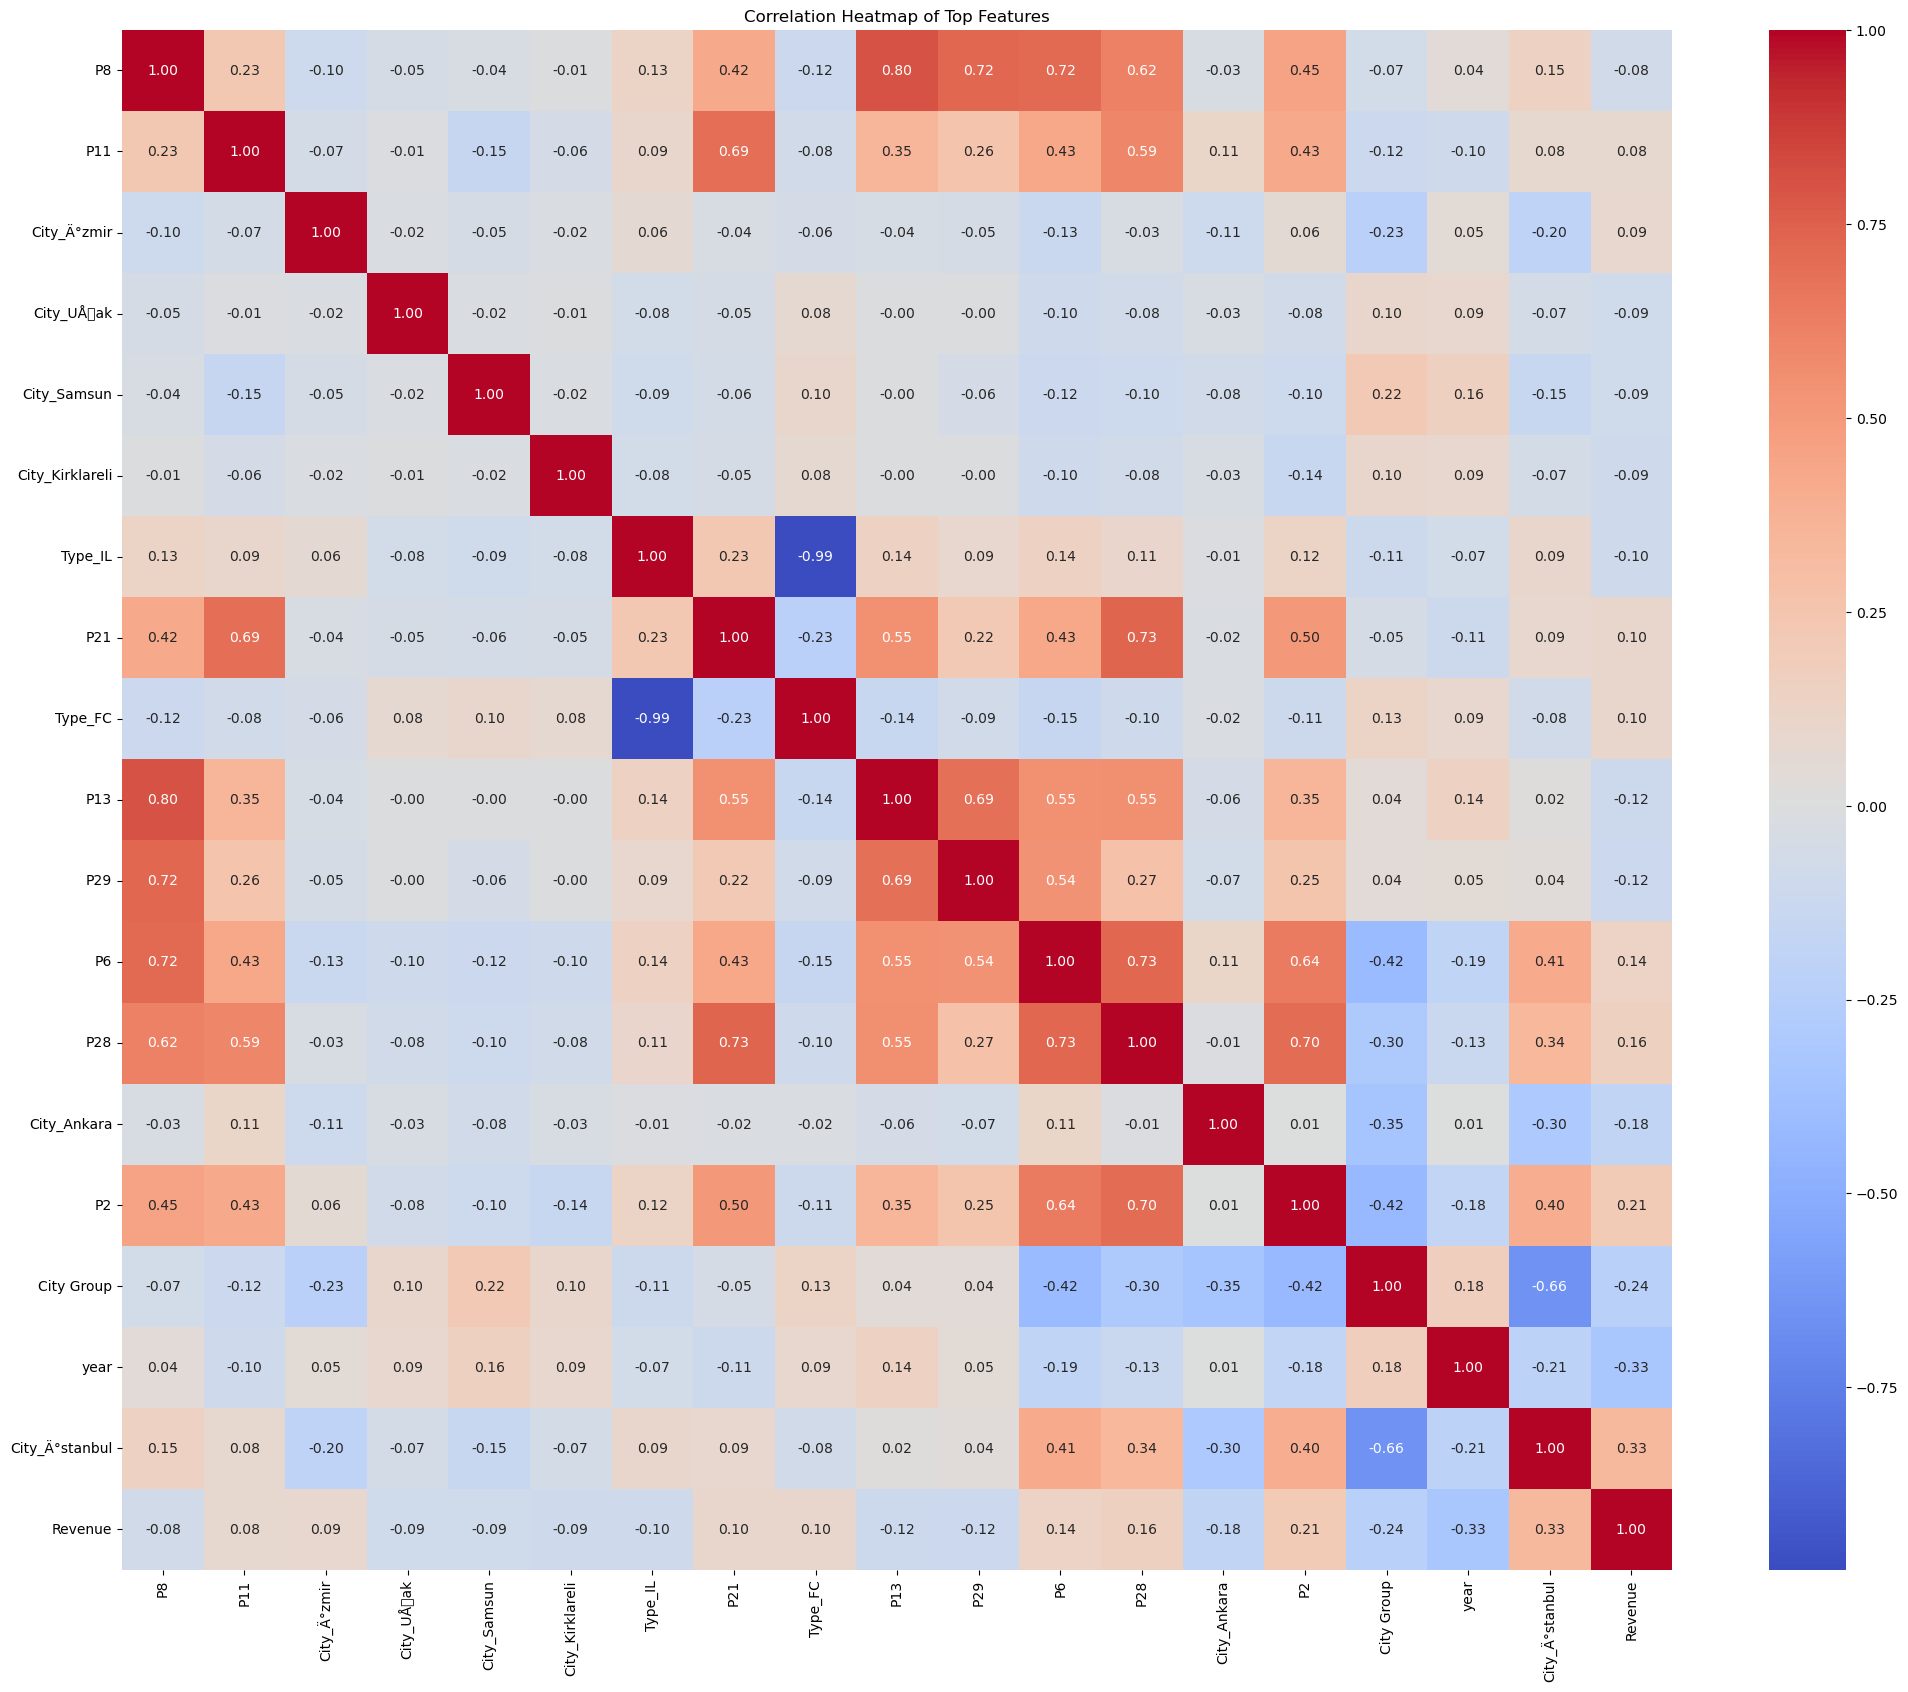

In [60]:
# Replace special characters in column names
T_data1.columns = T_data1.columns.str.replace('Ä±', 'i').str.replace('ÅŸ', 's').str.replace('ÄŸ', 'g').str.replace('Ä±', 'i').str.replace('ÅŸ', 's').str.replace('Å±', 'u')

# Continue with your code
numeric_columns = T_data1.select_dtypes(include=['number']).columns
corr = T_data1[numeric_columns].corr()["Revenue"].abs()

# Rest of your code remains the same
sorted_corr = corr.sort_values()
num_to_drop = int(0.75 * len(T_data1.columns))


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already calculated and sorted the correlation coefficients
# sorted_corr = corr.sort_values()

# Specify the number of features to keep
num_to_keep = len(sorted_corr) - num_to_drop

# Select the top features based on correlation
top_features = sorted_corr.index[-num_to_keep:]

# Extract the relevant subset of the DataFrame
subset_df = T_data1[top_features]

# Calculate the correlation matrix for the subset
corr_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features')
plt.show()



In [61]:
X_selected_data

month  P2  P5  day  P29  City Group  P6  P1  year  P23
0        7   5   2   17    3           0   2   4  1999    3
1        2   5   1   14    3           0   2   4  2008    2
2        3   4   2    9    3           1   3   2  2013    1
3        2   4   4    2    7           1   4   6  2012   10
4        5   4   2    9    3           1   2   3  2009    1
..     ...  ..  ..  ...  ...         ...  ..  ..   ...  ...
132      6   3   4   25    3           1   2   2  2008    1
133     10   5   2   12    3           0   3   4  2006    1
134      7   4   2    8    3           1   3   3  2006    2
135     10   5   2   29    3           0   2   4  2010    1
136      9   5   2    1    3           0   2   4  2009    1

[137 rows x 10 columns]

In [62]:
subset_df

P8  P11  City_Ä°zmir  City_UÅak  City_Samsun  City_Kirklareli  Type_IL  \
0     4    3            0           0            0                0        1   
1     5    1            0           0            0                0        0   
2     5    2            0           0            0                0        1   
3     8    8            0           0            0                0        1   
4     5    2            0           0            0                0        1   
..   ..  ...          ...         ...          ...              ...      ...   
132   4    4            0           0            0                0        0   
133   4    5            1           0            0                0        0   
134   5    1            0           0            0                0        0   
135   5    2            0           0            0                0        0   
136   4    4            0           0            0                0        0   

     P21  Type_FC  P13  P29  P6  P28  City_Ankara  P2  City Group  year  \
0      1        0    5    3   2    2            0   5           0  1999   
1      1        1    5    3   2    3            1   5           0  2008   
2      1        0    5    3   3    1            0   4           1  2013   
3      6        0    7    7   4    2            0   4           1  2012   
4      1        0    5    3   2    1            0   4           1  2009   
..   ...      ...  ...  ...  ..  ...          ...  ..         ...   ...   
132    2        1    4    3   2    2            0   3           1  2008   
133    2        1    5    3   3    3            0   5           0  2006   
134    1        1    5    3   3    2            0   4           1  2006   
135    1        1    5    3   2    3            0   5           0  2010   
136    1        1    5    3   2    3            0   5           0  2009   

     City_Ä°stanbul  Revenue  
0                 1  5653753  
1                 0  6923131  
2                 0  2055379  
3                 0  2675511  
4                 0  4316715  
..              ...      ...  
132               0  5787594  
133               0  9262754  
134               0  2544857  
135               1  7217634  
136               1  6363241  

[137 rows x 19 columns]

In [63]:
# Combine the two dataframes, ensuring no duplicates
combined_data = X_selected_data.join(subset_df, rsuffix='_subset')

# Print the combined data
print("Combined data:")
print(combined_data)




Combined data:
     month  P2  P5  day  P29  City Group  P6  P1  year  P23  P8  P11  \
0        7   5   2   17    3           0   2   4  1999    3   4    3   
1        2   5   1   14    3           0   2   4  2008    2   5    1   
2        3   4   2    9    3           1   3   2  2013    1   5    2   
3        2   4   4    2    7           1   4   6  2012   10   8    8   
4        5   4   2    9    3           1   2   3  2009    1   5    2   
..     ...  ..  ..  ...  ...         ...  ..  ..   ...  ...  ..  ...   
132      6   3   4   25    3           1   2   2  2008    1   4    4   
133     10   5   2   12    3           0   3   4  2006    1   4    5   
134      7   4   2    8    3           1   3   3  2006    2   5    1   
135     10   5   2   29    3           0   2   4  2010    1   5    2   
136      9   5   2    1    3           0   2   4  2009    1   4    4   

     City_Ä°zmir  City_UÅak  City_Samsun  City_Kirklareli  Type_IL  P21  \
0              0           0            0   

In [64]:
X = combined_data.drop("Revenue",axis=1)
y = combined_data["Revenue"]

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
X.drop('P29_subset',axis=1, inplace=True)

In [67]:
X.drop('P6_subset',axis=1, inplace=True)
X.drop('P2_subset',axis=1, inplace=True)
X.drop('City Group_subset',axis=1, inplace=True)
X.drop('year_subset',axis=1, inplace=True)

In [68]:
X

month  P2  P5  day  P29  City Group  P6  P1  year  P23  P8  P11  \
0        7   5   2   17    3           0   2   4  1999    3   4    3   
1        2   5   1   14    3           0   2   4  2008    2   5    1   
2        3   4   2    9    3           1   3   2  2013    1   5    2   
3        2   4   4    2    7           1   4   6  2012   10   8    8   
4        5   4   2    9    3           1   2   3  2009    1   5    2   
..     ...  ..  ..  ...  ...         ...  ..  ..   ...  ...  ..  ...   
132      6   3   4   25    3           1   2   2  2008    1   4    4   
133     10   5   2   12    3           0   3   4  2006    1   4    5   
134      7   4   2    8    3           1   3   3  2006    2   5    1   
135     10   5   2   29    3           0   2   4  2010    1   5    2   
136      9   5   2    1    3           0   2   4  2009    1   4    4   

     City_Ä°zmir  City_UÅak  City_Samsun  City_Kirklareli  Type_IL  P21  \
0              0           0            0                0        1    1   
1              0           0            0                0        0    1   
2              0           0            0                0        1    1   
3              0           0            0                0        1    6   
4              0           0            0                0        1    1   
..           ...         ...          ...              ...      ...  ...   
132            0           0            0                0        0    2   
133            1           0            0                0        0    2   
134            0           0            0                0        0    1   
135            0           0            0                0        0    1   
136            0           0            0                0        0    1   

     Type_FC  P13  P28  City_Ankara  City_Ä°stanbul  
0          0    5    2            0               1  
1          1    5    3            1               0  
2          0    5    1            0               0  
3          0    7    2            0               0  
4          0    5    1            0               0  
..       ...  ...  ...          ...             ...  
132        1    4    2            0               0  
133        1    5    3            0               0  
134        1    5    2            0               0  
135        1    5    3            0               1  
136        1    5    3            0               1  

[137 rows x 23 columns]

In [69]:
y

0      5653753
1      6923131
2      2055379
3      2675511
4      4316715
        ...   
132    5787594
133    9262754
134    2544857
135    7217634
136    6363241
Name: Revenue, Length: 137, dtype: int32

In [70]:
# Apply log transformation to X and y
X_log = X.applymap(lambda x: np.log(x) if isinstance(x, (int, float)) and x > 0 else x)
y_log = np.log1p(y)

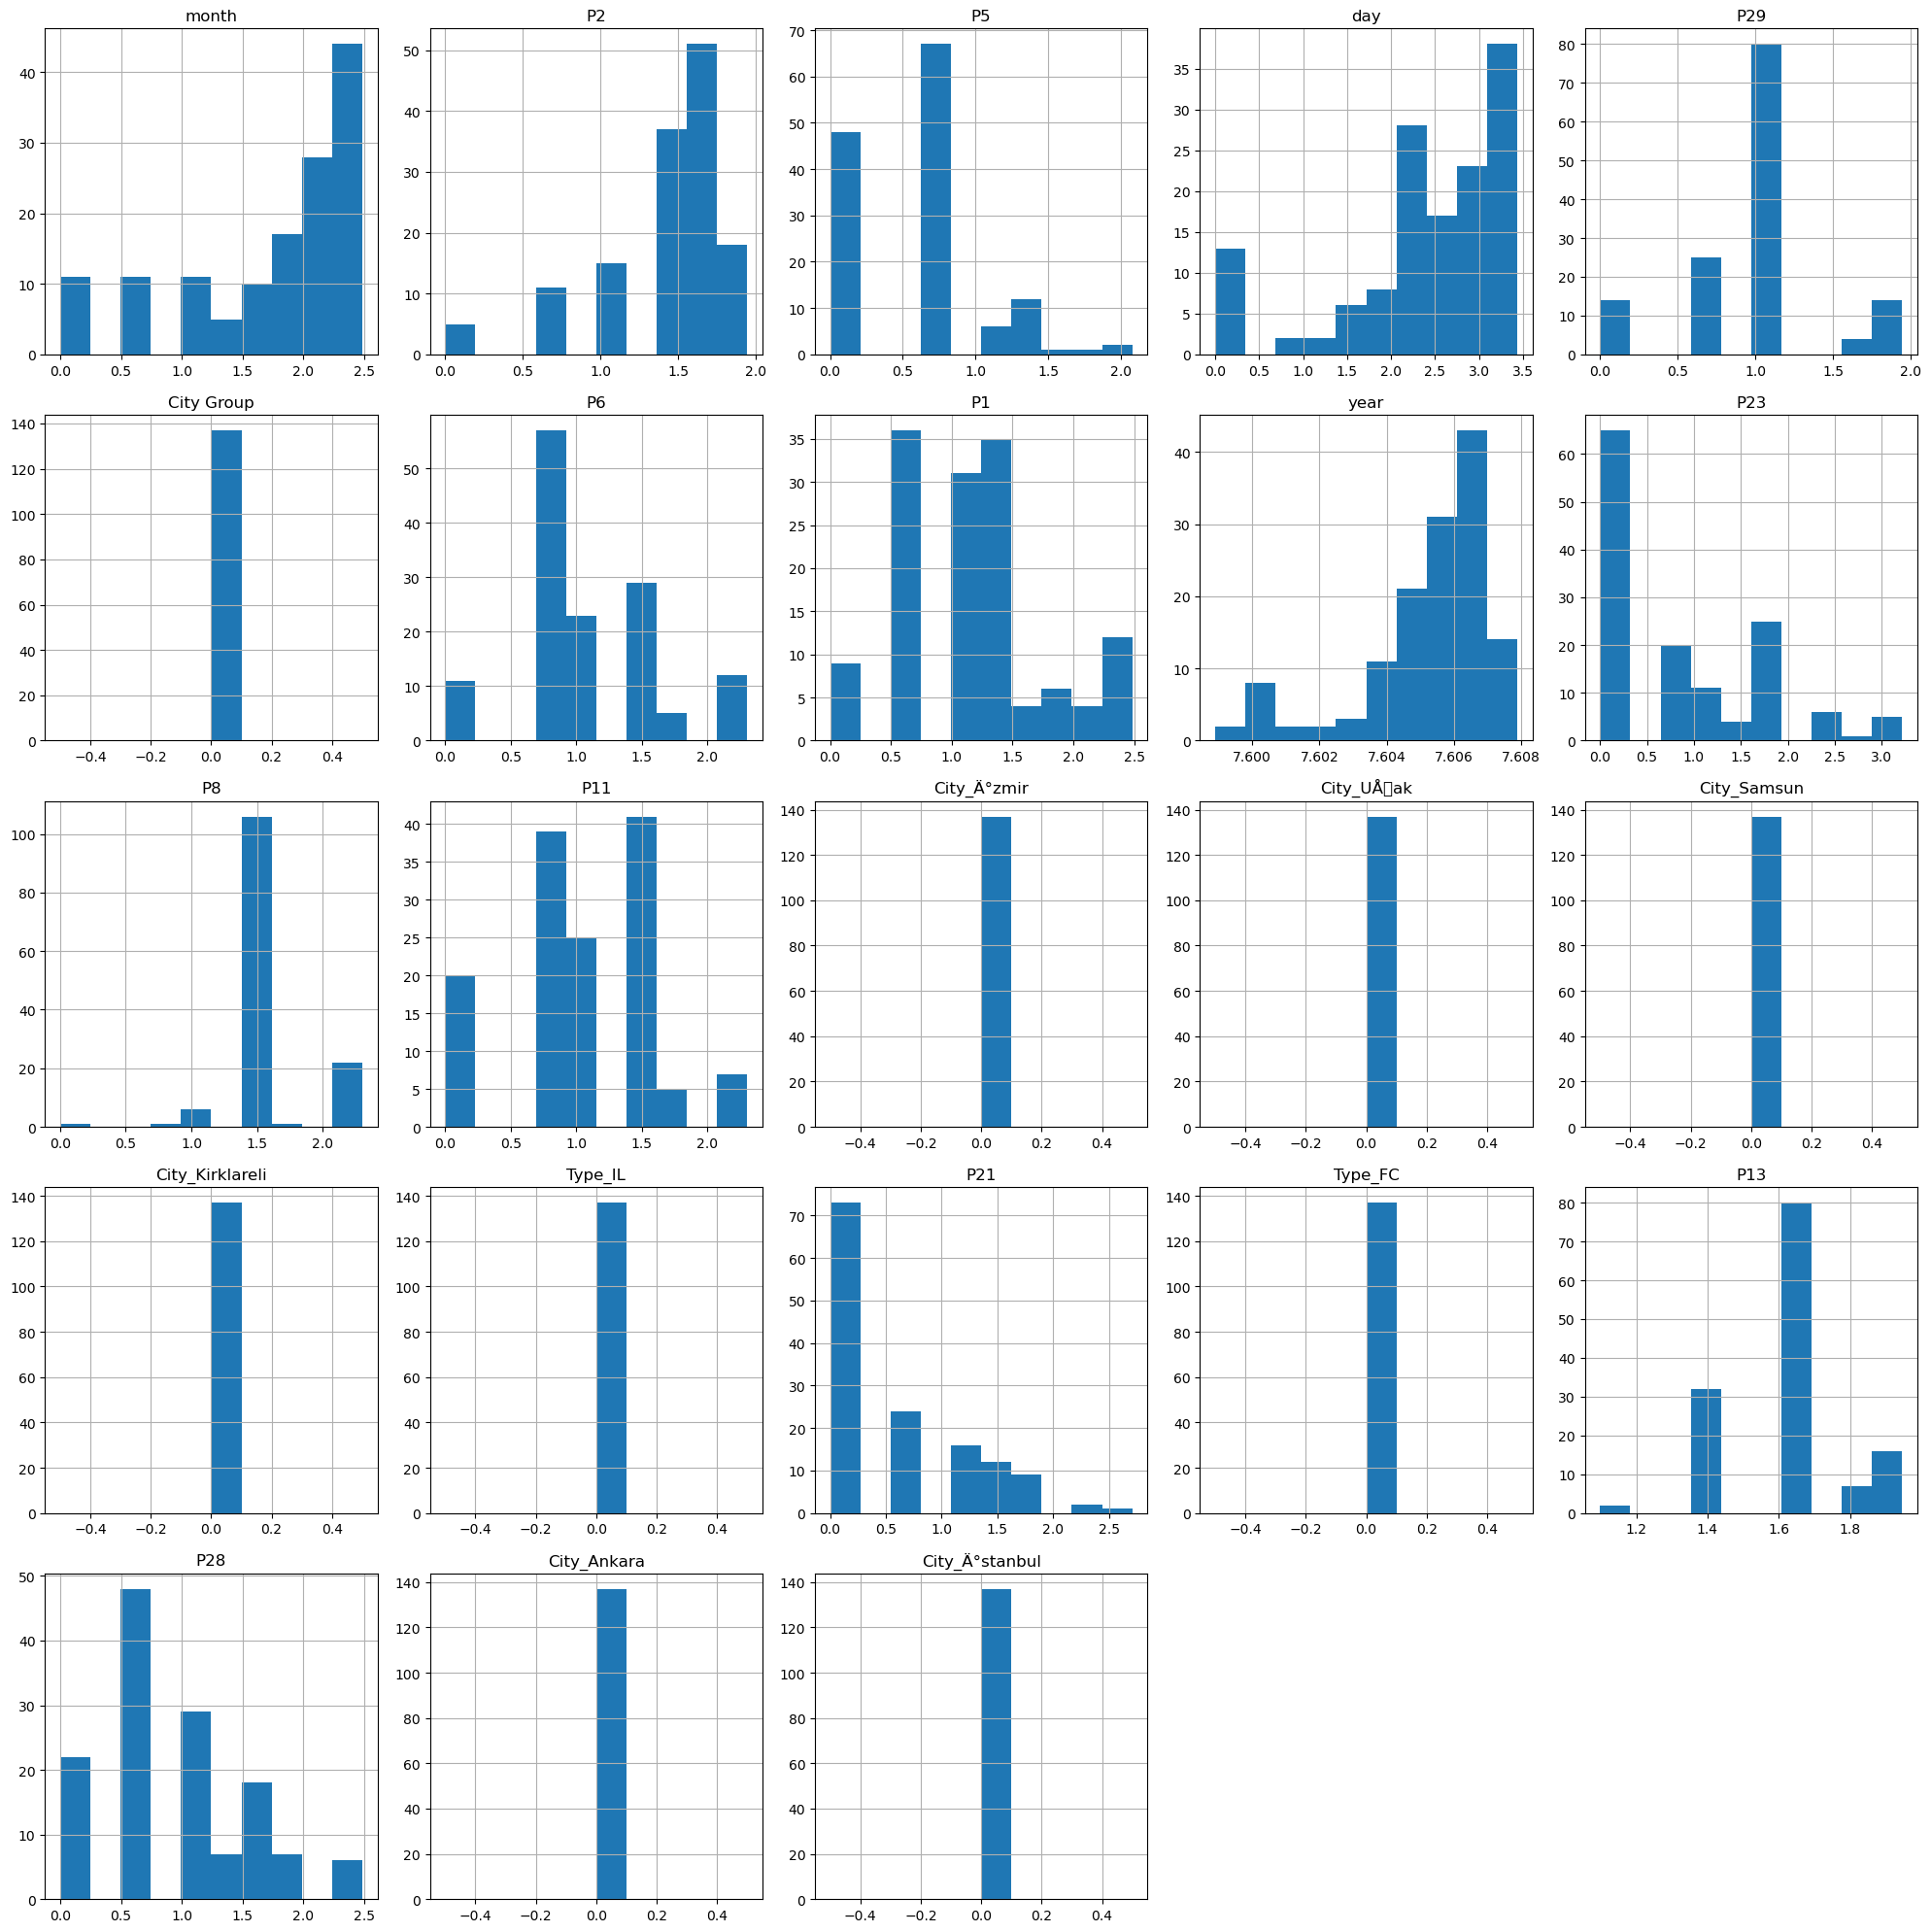

In [71]:
import pandas as pd

# Assuming your DataFrame is named df

# Plot histograms for all features
X_log.hist(figsize=(20, 20))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [72]:
X_log

month        P2        P5       day       P29  City Group        P6  \
0    1.945910  1.609438  0.693147  2.833213  1.098612         0.0  0.693147   
1    0.693147  1.609438  0.000000  2.639057  1.098612         0.0  0.693147   
2    1.098612  1.386294  0.693147  2.197225  1.098612         0.0  1.098612   
3    0.693147  1.386294  1.386294  0.693147  1.945910         0.0  1.386294   
4    1.609438  1.386294  0.693147  2.197225  1.098612         0.0  0.693147   
..        ...       ...       ...       ...       ...         ...       ...   
132  1.791759  1.098612  1.386294  3.218876  1.098612         0.0  0.693147   
133  2.302585  1.609438  0.693147  2.484907  1.098612         0.0  1.098612   
134  1.945910  1.386294  0.693147  2.079442  1.098612         0.0  1.098612   
135  2.302585  1.609438  0.693147  3.367296  1.098612         0.0  0.693147   
136  2.197225  1.609438  0.693147  0.000000  1.098612         0.0  0.693147   

           P1      year       P23        P8       P11  City_Ä°zmir  \
0    1.386294  7.600402  1.098612  1.386294  1.098612          0.0   
1    1.386294  7.604894  0.693147  1.609438  0.000000          0.0   
2    0.693147  7.607381  0.000000  1.609438  0.693147          0.0   
3    1.791759  7.606885  2.302585  2.079442  2.079442          0.0   
4    1.098612  7.605392  0.000000  1.609438  0.693147          0.0   
..        ...       ...       ...       ...       ...          ...   
132  0.693147  7.604894  0.000000  1.386294  1.386294          0.0   
133  1.386294  7.603898  0.000000  1.386294  1.609438          0.0   
134  1.098612  7.603898  0.693147  1.609438  0.000000          0.0   
135  1.386294  7.605890  0.000000  1.609438  0.693147          0.0   
136  1.386294  7.605392  0.000000  1.386294  1.386294          0.0   

     City_UÅak  City_Samsun  City_Kirklareli  Type_IL       P21  Type_FC  \
0           0.0          0.0              0.0      0.0  0.000000      0.0   
1           0.0          0.0              0.0      0.0  0.000000      0.0   
2           0.0          0.0              0.0      0.0  0.000000      0.0   
3           0.0          0.0              0.0      0.0  1.791759      0.0   
4           0.0          0.0              0.0      0.0  0.000000      0.0   
..          ...          ...              ...      ...       ...      ...   
132         0.0          0.0              0.0      0.0  0.693147      0.0   
133         0.0          0.0              0.0      0.0  0.693147      0.0   
134         0.0          0.0              0.0      0.0  0.000000      0.0   
135         0.0          0.0              0.0      0.0  0.000000      0.0   
136         0.0          0.0              0.0      0.0  0.000000      0.0   

          P13       P28  City_Ankara  City_Ä°stanbul  
0    1.609438  0.693147          0.0             0.0  
1    1.609438  1.098612          0.0             0.0  
2    1.609438  0.000000          0.0             0.0  
3    1.945910  0.693147          0.0             0.0  
4    1.609438  0.000000          0.0             0.0  
..        ...       ...          ...             ...  
132  1.386294  0.693147          0.0             0.0  
133  1.609438  1.098612          0.0             0.0  
134  1.609438  0.693147          0.0             0.0  
135  1.609438  1.098612          0.0             0.0  
136  1.609438  1.098612          0.0             0.0  

[137 rows x 23 columns]

In [73]:
y_log

0      15.547830
1      15.750379
2      14.535971
3      14.799651
4      15.278005
         ...    
132    15.571227
133    16.041512
134    14.749585
135    15.792038
136    15.666049
Name: Revenue, Length: 137, dtype: float64

In [74]:
import pandas as pd

# Assuming your DataFrame is named df

# Check for NaN values in the entire DataFrame
nan_values = X_log.isna().sum()

# Display the number of NaN values for each column
print("NaN values in each column:")
print(nan_values)

# Total number of NaN values in the DataFrame
total_nan = X_log.isna().sum().sum()
print("Total NaN values in the DataFrame:", total_nan)


NaN values in each column:
month              0
P2                 0
P5                 0
day                0
P29                0
City Group         0
P6                 0
P1                 0
year               0
P23                0
P8                 0
P11                0
City_Ä°zmir        0
City_UÅak         0
City_Samsun        0
City_Kirklareli    0
Type_IL            0
P21                0
Type_FC            0
P13                0
P28                0
City_Ankara        0
City_Ä°stanbul     0
dtype: int64
Total NaN values in the DataFrame: 0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

In [76]:
X_train

month        P2        P5       day       P29  City Group        P6  \
10   2.079442  1.791759  1.386294  2.197225  0.693147         0.0  1.386294   
130  2.302585  1.386294  0.693147  3.367296  1.098612         0.0  0.000000   
51   2.397895  0.693147  0.693147  2.079442  1.098612         0.0  0.693147   
11   1.609438  1.386294  0.693147  3.091042  1.098612         0.0  1.609438   
114  2.484907  1.609438  0.693147  1.791759  0.000000         0.0  0.693147   
..        ...       ...       ...       ...       ...         ...       ...   
71   2.484907  1.945910  0.693147  1.791759  1.945910         0.0  2.302585   
106  1.791759  1.098612  1.386294  2.708050  1.945910         0.0  0.693147   
14   2.484907  0.693147  0.000000  3.367296  1.098612         0.0  0.693147   
92   2.397895  1.945910  0.693147  0.000000  1.945910         0.0  2.302585   
102  2.197225  1.609438  0.693147  2.397895  1.098612         0.0  0.693147   

           P1      year       P23        P8       P11  City_Ä°zmir  \
10   2.197225  7.607381  2.995732  2.079442  2.079442          0.0   
130  1.098612  7.606387  0.000000  1.609438  0.693147          0.0   
51   0.693147  7.606387  0.693147  1.386294  1.386294          0.0   
11   0.693147  7.606885  1.098612  1.609438  0.693147          0.0   
114  1.386294  7.604894  1.609438  1.386294  1.098612          0.0   
..        ...       ...       ...       ...       ...          ...   
71   2.484907  7.603898  1.609438  2.302585  1.386294          0.0   
106  1.098612  7.604894  1.609438  2.079442  1.791759          0.0   
14   0.693147  7.606387  0.693147  1.609438  0.693147          0.0   
92   2.484907  7.601902  3.218876  2.079442  2.079442          0.0   
102  1.386294  7.602900  1.098612  1.386294  1.098612          0.0   

     City_UÅak  City_Samsun  City_Kirklareli  Type_IL       P21  Type_FC  \
10          0.0          0.0              0.0      0.0  2.708050      0.0   
130         0.0          0.0              0.0      0.0  0.000000      0.0   
51          0.0          0.0              0.0      0.0  0.693147      0.0   
11          0.0          0.0              0.0      0.0  0.000000      0.0   
114         0.0          0.0              0.0      0.0  1.386294      0.0   
..          ...          ...              ...      ...       ...      ...   
71          0.0          0.0              0.0      0.0  1.791759      0.0   
106         0.0          0.0              0.0      0.0  1.098612      0.0   
14          0.0          0.0              0.0      0.0  0.000000      0.0   
92          0.0          0.0              0.0      0.0  1.791759      0.0   
102         0.0          0.0              0.0      0.0  0.000000      0.0   

          P13       P28  City_Ankara  City_Ä°stanbul  
10   1.945910  2.302585          0.0             0.0  
130  1.609438  0.693147          0.0             0.0  
51   1.609438  0.000000          0.0             0.0  
11   1.609438  1.098612          0.0             0.0  
114  1.609438  1.386294          0.0             0.0  
..        ...       ...          ...             ...  
71   1.945910  2.302585          0.0             0.0  
106  1.945910  0.693147          0.0             0.0  
14   1.609438  0.693147          0.0             0.0  
92   1.945910  2.302585          0.0             0.0  
102  1.386294  0.000000          0.0             0.0  

[109 rows x 23 columns]

In [77]:
y_train

10     15.135968
130    15.032245
51     15.001230
11     15.456713
114    15.239928
         ...    
71     15.235343
106    15.402452
14     14.508207
92     15.729845
102    14.822758
Name: Revenue, Length: 109, dtype: float64

In [78]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with your features and target variable
# X is the feature matrix, and y is the target variable

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit a linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y_train, X_train).fit()

# Display the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.172
Date:                Tue, 27 Feb 2024   Prob (F-statistic):             0.0144
Time:                        02:27:42   Log-Likelihood:                -54.764
No. Observations:                 109   AIC:                             139.5
Df Residuals:                      94   BIC:                             179.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             311.7317    178.324     

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Display VIF values
vif_df = calculate_vif(X_train)
print(vif_df)

           Variable           VIF
0             const  1.869071e+07
1             month  1.155523e+00
2                P2  4.312602e+00
3                P5  1.501098e+00
4               day  1.138536e+00
5               P29  1.937232e+00
6        City Group           NaN
7                P6  2.469953e+00
8                P1  8.297941e+00
9              year  1.266345e+00
10              P23  3.560128e+00
11               P8  3.525333e+00
12              P11  2.286599e+00
13      City_Ä°zmir           NaN
14       City_UÅak           NaN
15      City_Samsun           NaN
16  City_Kirklareli           NaN
17          Type_IL           NaN
18              P21  4.082548e+00
19          Type_FC           NaN
20              P13  3.046178e+00
21              P28  3.737657e+00
22      City_Ankara           NaN
23   City_Ä°stanbul           NaN


In [80]:
T_datatest = pd.read_csv(r"C:\Users\ARADHYA\Music\test.csv",encoding='unicode_escape')

In [81]:
T_datatest.head()

Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0   0  01/22/2011          NiÄde       Other   FC   1  4.0  4.0  4.0   1   2   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

   P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
0   5   4   5    5    5    3  4.0    0    0    0    2    0    5    5    3   
1   5   3   4    4    2    4  5.0    0    0    0    0    0    5    5    3   
2   5   4   4    5    4    5  5.0    0    0    0    0    0    5    5    5   
3   5   4   5    4    3    4  5.0    0    0    0    0    4    4    4    3   
4   5   4   5    4    3    5  4.0    0    0    0    0    0    1    5    3   

   P22  P23  P24  P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  \
0    1    4    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
1    2    1    0    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0   
2    5    5    0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0   
3    2    2    0    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0   
4    1    1    0    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0   

   P37  
0    0  
1    0  
2    0  
3    0  
4    0

In [82]:
T_datatest.shape
T_datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [83]:
T_datatest.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [84]:
T_datatest.drop("Id",axis=1,inplace = True)

In [85]:
T_datatest['Open Date'] = pd.to_datetime(T_data['Open Date'])
T_datatest['year'] = T_datatest['Open Date'].apply(lambda x:x.year)
T_datatest['month'] = T_datatest['Open Date'].apply(lambda x:x.month)
T_datatest['day'] = T_datatest['Open Date'].apply(lambda x:x.day)

In [86]:
T_datatest = T_datatest.drop("Open Date", axis=1)
T_datatest.head(5)

City  City Group Type  P1   P2   P3   P4  P5  P6  P7  P8  P9  \
0          NiÄde       Other   FC   1  4.0  4.0  4.0   1   2   5   4   5   
1           Konya       Other   IL   3  4.0  4.0  4.0   2   2   5   3   4   
2          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   5   4   4   
3         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   5   4   5   
4  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   5   4   5   

   P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  \
0    5    5    3  4.0    0    0    0    2    0    5    5    3    1    4    0   
1    4    2    4  5.0    0    0    0    0    0    5    5    3    2    1    0   
2    5    4    5  5.0    0    0    0    0    0    5    5    5    5    5    0   
3    4    3    4  5.0    0    0    0    0    4    4    4    3    2    2    0   
4    4    3    5  4.0    0    0    0    0    0    1    5    3    1    1    0   

   P25  P26  P27  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37    year  \
0    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  1999.0   
1    0  0.0  0.0  1.0  3.0    0    0    0    0    0    0    0    0  2008.0   
2    0  0.0  0.0  2.0  3.0    0    0    0    0    0    0    0    0  2013.0   
3    0  0.0  0.0  2.0  3.0    0    4    0    0    0    0    0    0  2012.0   
4    0  0.0  0.0  5.0  3.0    0    0    0    0    0    0    0    0  2009.0   

   month   day  
0    7.0  17.0  
1    2.0  14.0  
2    3.0   9.0  
3    2.0   2.0  
4    5.0   9.0

In [87]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming your DataFrame is named 'T_data1'
label_encoder = LabelEncoder()

# Encode 'City Group' column
T_datatest['City Group'] = label_encoder.fit_transform(T_datatest['City Group'])

# One-hot encode 'City' and 'Type' columns
T_datatest = pd.get_dummies(T_datatest, columns=['City', 'Type'], drop_first=True)

# Assuming T_datatest is your DataFrame
# Fill missing values with 0
T_datatest = T_datatest.fillna(0)

# Convert boolean columns to integers (0 and 1)
T_datatest = T_datatest.astype(int)

# Display the updated DataFrame
print(T_datatest.head())

   City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           1   1   4   4   4   1   2   5   4   5    5    5    3    4    0   
1           1   3   4   4   4   2   2   5   3   4    4    2    4    5    0   
2           0   3   4   4   4   2   2   5   4   4    5    4    5    5    0   
3           1   2   4   4   4   2   3   5   4   5    4    3    4    5    0   
4           1   2   4   4   4   1   2   5   4   5    4    3    5    4    0   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    0    0    2    0    5    5    3    1    4    0    0    0    0    2    3   
1    0    0    0    0    5    5    3    2    1    0    0    0    0    1    3   
2    0    0    0    0    5    5    5    5    5    0    0    0    0    2    3   
3    0    0    0    4    4    4    3    2    2    0    0    0    0    2    3   
4    0    0    0    0    1    5    3    1    1    0    0    0    0    5    3   

   P30  P31  P32  P33  P34  P35  P36  P37  year  m

In [88]:
T_datatest

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  \
0               1   1   4   4   4   1   2   5   4   5    5    5    3    4   
1               1   3   4   4   4   2   2   5   3   4    4    2    4    5   
2               0   3   4   4   4   2   2   5   4   4    5    4    5    5   
3               1   2   4   4   4   2   3   5   4   5    4    3    4    5   
4               1   2   4   4   4   1   2   5   4   5    4    3    5    4   
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
99995           1   5   5   4   4   2   2   5   5   4    4    4    4    4   
99996           1   1   2   4   3   1   1   1   5   5    5    2    4    5   
99997           0   4   5   4   4   1   2   5   3   4    5    5    4    5   
99998           0  12   7   6   6   4   4  10  10  10   10    6   10    7   
99999           0   2   5   4   4   2   2   5   5   5    4    4    4    5   

       P14  P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  \
0        0    0    0    2    0    5    5    3    1    4    0    0    0    0   
1        0    0    0    0    0    5    5    3    2    1    0    0    0    0   
2        0    0    0    0    0    5    5    5    5    5    0    0    0    0   
3        0    0    0    0    4    4    4    3    2    2    0    0    0    0   
4        0    0    0    0    0    1    5    3    1    1    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995    0    0    0    0    0    3    1    1    3    2    0    0    0    0   
99996    0    0    0    1    0    1    1    1    1    2    0    0    0    0   
99997    0    4    4    3    3    3    5    4    5    5    4    4    4    3   
99998    0    0    0    0    0   20    9    3    3   15    0    2    0    0   
99999    5    0    0    1    1    5    4    1    2    1    5    0    0    1   

       P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0        2    3    0    0    0    0    0    0    0    0  1999      7   17   
1        1    3    0    0    0    0    0    0    0    0  2008      2   14   
2        2    3    0    0    0    0    0    0    0    0  2013      3    9   
3        2    3    0    4    0    0    0    0    0    0  2012      2    2   
4        5    3    0    0    0    0    0    0    0    0  2009      5    9   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...   
99995    2    3    0    0    0    0    0    0    0    0     0      0    0   
99996    1    3    5    0    0    0    4    0    0    0     0      0    0   
99997    4    1    5    5    3    2    4    4    4    2     0      0    0   
99998    7    5    0    0    0    4    0    0    0    0     0      0    0   
99999    5    3    0    2    0    2    2    4    2    0     0      0    0   

       City_Afyonkarahisar  City_Aksaray  City_Ankara  City_Antalya  \
0                        0             0            0             0   
1                        0             0            0             0   
2                        0             0            1             0   
3                        0             0            0             0   
4                        1             0            0             0   
...                    ...           ...          ...           ...   
99995                    0             0            0             1   
99996                    0             0            0             0   
99997                    0             0            0             0   
99998                    0             0            0             0   
99999                    0             0            0             0   

       City_Artvin  City_AydÄ±n  City_BalÄ±kesir  City_Batman  City_Bilecik  \
0                0            0                0            0             0   
1                0            0                0            0             0   
2                0            0                0            0             0   
3                0            0        

In [89]:
T_datatest.drop("City_Trabzon",axis=1,inplace = True)

In [90]:
T_datatest.drop("City_Bolu",axis=1,inplace = True)

In [91]:
T_datatest.drop("City_Konya",axis=1,inplace = True)

In [92]:
X_train

const     month        P2        P5       day       P29  City Group  \
10     1.0  2.079442  1.791759  1.386294  2.197225  0.693147         0.0   
130    1.0  2.302585  1.386294  0.693147  3.367296  1.098612         0.0   
51     1.0  2.397895  0.693147  0.693147  2.079442  1.098612         0.0   
11     1.0  1.609438  1.386294  0.693147  3.091042  1.098612         0.0   
114    1.0  2.484907  1.609438  0.693147  1.791759  0.000000         0.0   
..     ...       ...       ...       ...       ...       ...         ...   
71     1.0  2.484907  1.945910  0.693147  1.791759  1.945910         0.0   
106    1.0  1.791759  1.098612  1.386294  2.708050  1.945910         0.0   
14     1.0  2.484907  0.693147  0.000000  3.367296  1.098612         0.0   
92     1.0  2.397895  1.945910  0.693147  0.000000  1.945910         0.0   
102    1.0  2.197225  1.609438  0.693147  2.397895  1.098612         0.0   

           P6        P1      year       P23        P8       P11  City_Ä°zmir  \
10   1.386294  2.197225  7.607381  2.995732  2.079442  2.079442          0.0   
130  0.000000  1.098612  7.606387  0.000000  1.609438  0.693147          0.0   
51   0.693147  0.693147  7.606387  0.693147  1.386294  1.386294          0.0   
11   1.609438  0.693147  7.606885  1.098612  1.609438  0.693147          0.0   
114  0.693147  1.386294  7.604894  1.609438  1.386294  1.098612          0.0   
..        ...       ...       ...       ...       ...       ...          ...   
71   2.302585  2.484907  7.603898  1.609438  2.302585  1.386294          0.0   
106  0.693147  1.098612  7.604894  1.609438  2.079442  1.791759          0.0   
14   0.693147  0.693147  7.606387  0.693147  1.609438  0.693147          0.0   
92   2.302585  2.484907  7.601902  3.218876  2.079442  2.079442          0.0   
102  0.693147  1.386294  7.602900  1.098612  1.386294  1.098612          0.0   

     City_UÅak  City_Samsun  City_Kirklareli  Type_IL       P21  Type_FC  \
10          0.0          0.0              0.0      0.0  2.708050      0.0   
130         0.0          0.0              0.0      0.0  0.000000      0.0   
51          0.0          0.0              0.0      0.0  0.693147      0.0   
11          0.0          0.0              0.0      0.0  0.000000      0.0   
114         0.0          0.0              0.0      0.0  1.386294      0.0   
..          ...          ...              ...      ...       ...      ...   
71          0.0          0.0              0.0      0.0  1.791759      0.0   
106         0.0          0.0              0.0      0.0  1.098612      0.0   
14          0.0          0.0              0.0      0.0  0.000000      0.0   
92          0.0          0.0              0.0      0.0  1.791759      0.0   
102         0.0          0.0              0.0      0.0  0.000000      0.0   

          P13       P28  City_Ankara  City_Ä°stanbul  
10   1.945910  2.302585          0.0             0.0  
130  1.609438  0.693147          0.0             0.0  
51   1.609438  0.000000          0.0             0.0  
11   1.609438  1.098612          0.0             0.0  
114  1.609438  1.386294          0.0             0.0  
..        ...       ...          ...             ...  
71   1.945910  2.302585          0.0             0.0  
106  1.945910  0.693147          0.0             0.0  
14   1.609438  0.693147          0.0             0.0  
92   1.945910  2.302585          0.0             0.0  
102  1.386294  0.000000          0.0             0.0  

[109 rows x 24 columns]

In [93]:
X_test

month        P2        P5       day       P29  City Group        P6  \
105  1.098612  0.693147  0.000000  2.708050  0.693147         0.0  0.693147   
104  0.000000  1.609438  0.000000  3.091042  1.098612         0.0  1.098612   
12   0.693147  0.693147  0.693147  3.332205  1.098612         0.0  0.000000   
26   0.693147  1.609438  0.693147  3.135494  1.098612         0.0  1.098612   
123  2.397895  0.000000  0.000000  1.609438  1.098612         0.0  0.000000   
66   0.000000  0.693147  0.000000  2.197225  1.098612         0.0  0.000000   
64   1.945910  1.945910  0.693147  2.564949  1.945910         0.0  2.079442   
115  1.609438  1.386294  1.386294  1.386294  1.945910         0.0  2.079442   
133  2.302585  1.609438  0.693147  2.484907  1.098612         0.0  1.098612   
85   0.000000  1.609438  0.693147  1.945910  1.098612         0.0  1.609438   
84   2.302585  1.386294  0.000000  2.197225  1.098612         0.0  1.098612   
45   0.693147  1.791759  0.693147  0.693147  1.945910         0.0  2.079442   
69   2.079442  0.693147  1.386294  3.401197  1.098612         0.0  0.693147   
67   1.098612  1.609438  0.693147  0.000000  0.000000         0.0  1.386294   
31   2.484907  1.609438  0.000000  3.433987  1.098612         0.0  1.098612   
42   2.197225  1.945910  1.386294  3.295837  1.609438         0.0  1.386294   
27   2.302585  1.609438  0.000000  2.197225  1.098612         0.0  0.693147   
19   2.079442  1.386294  0.693147  2.772589  1.098612         0.0  0.693147   
132  1.791759  1.098612  1.386294  3.218876  1.098612         0.0  0.693147   
56   1.098612  1.609438  0.693147  2.772589  1.098612         0.0  0.693147   
125  2.197225  1.791759  1.386294  0.000000  1.945910         0.0  1.791759   
4    1.609438  1.386294  0.693147  2.197225  1.098612         0.0  0.693147   
109  2.079442  1.386294  1.386294  3.218876  0.693147         0.0  1.609438   
36   1.609438  1.609438  0.000000  2.197225  1.098612         0.0  1.609438   
89   1.609438  0.000000  0.000000  2.397895  1.098612         0.0  0.693147   
100  2.197225  1.609438  0.693147  3.044522  1.098612         0.0  1.609438   
16   0.000000  1.609438  0.693147  1.945910  0.693147         0.0  1.609438   
18   1.386294  1.609438  0.000000  3.044522  1.098612         0.0  0.693147   

           P1      year       P23        P8       P11  City_Ä°zmir  \
105  0.000000  7.604894  0.000000  1.609438  0.000000          0.0   
104  1.386294  7.604396  1.386294  1.609438  0.693147          0.0   
12   0.693147  7.607381  0.693147  1.386294  1.098612          0.0   
26   1.098612  7.605890  0.693147  1.098612  1.609438          0.0   
123  0.000000  7.606387  0.000000  1.386294  1.098612          0.0   
66   0.693147  7.605890  0.693147  1.386294  1.098612          0.0   
64   2.484907  7.599902  1.609438  2.302585  1.386294          0.0   
115  1.791759  7.606885  1.609438  2.302585  1.386294          0.0   
133  1.386294  7.603898  0.000000  1.386294  1.609438          0.0   
85   1.098612  7.600902  0.000000  1.386294  1.098612          0.0   
84   1.386294  7.605392  1.098612  1.609438  0.693147          0.0   
45   1.791759  7.606885  1.609438  2.302585  1.386294          0.0   
69   0.693147  7.606387  0.000000  1.609438  0.000000          0.0   
67   1.386294  7.606387  1.098612  1.386294  1.098612          0.0   
31   1.386294  7.606885  0.000000  1.609438  0.693147          0.0   
42   2.484907  7.606387  2.995732  2.079442  1.791759          0.0   
27   1.386294  7.600402  1.609438  1.386294  1.386294          0.0   
19   0.693147  7.606387  0.000000  1.609438  0.000000          0.0   
132  0.693147  7.604894  0.000000  1.386294  1.386294          0.0   
56   1.386294  7.607381  0.693147  1.386294  1.609438          0.0   
125  2.197225  7.605890  3.218876  1.791759  2.302585          0.0   
4    1.098612  7.605392  0.000000  1.609438  0.693147          0.0   
109  0.693147  7.604396  0.000000  1.386294  1.609438          0.0   
36   1.098612  7.604894  1.098612  1

In [94]:
T_datatest.drop("City_Gaziantep",axis=1,inplace = True)

In [95]:
T_datatest.head()

City Group  P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  \
0           1   1   4   4   4   1   2   5   4   5    5    5    3    4    0   
1           1   3   4   4   4   2   2   5   3   4    4    2    4    5    0   
2           0   3   4   4   4   2   2   5   4   4    5    4    5    5    0   
3           1   2   4   4   4   2   3   5   4   5    4    3    4    5    0   
4           1   2   4   4   4   1   2   5   4   5    4    3    5    4    0   

   P15  P16  P17  P18  P19  P20  P21  P22  P23  P24  P25  P26  P27  P28  P29  \
0    0    0    2    0    5    5    3    1    4    0    0    0    0    2    3   
1    0    0    0    0    5    5    3    2    1    0    0    0    0    1    3   
2    0    0    0    0    5    5    5    5    5    0    0    0    0    2    3   
3    0    0    0    4    4    4    3    2    2    0    0    0    0    2    3   
4    0    0    0    0    1    5    3    1    1    0    0    0    0    5    3   

   P30  P31  P32  P33  P34  P35  P36  P37  year  month  day  \
0    0    0    0    0    0    0    0    0  1999      7   17   
1    0    0    0    0    0    0    0    0  2008      2   14   
2    0    0    0    0    0    0    0    0  2013      3    9   
3    0    4    0    0    0    0    0    0  2012      2    2   
4    0    0    0    0    0    0    0    0  2009      5    9   

   City_Afyonkarahisar  City_Aksaray  City_Ankara  City_Antalya  City_Artvin  \
0                    0             0            0             0            0   
1                    0             0            0             0            0   
2                    0             0            1             0            0   
3                    0             0            0             0            0   
4                    1             0            0             0            0   

   City_AydÄ±n  City_BalÄ±kesir  City_Batman  City_Bilecik  City_Bursa  \
0            0                0            0             0           0   
1            0                0            0             0           0   
2            0                0            0             0           0   
3            0                0            0             0           0   
4            0                0            0             0           0   

   City_Denizli  City_DiyarbakÄ±r  City_DÃ¼zce  City_Edirne  City_Erzincan  \
0             0                 0            0            0              0   
1             0                 0            0            0              0   
2             0                 0            0            0              0   
3             0                 0            0            0              0   
4             0                 0            0            0              0   

   City_Erzurum  City_EskiÅehir  City_Giresun  City_Hatay  City_Isparta  \
0             0                0             0           0             0   
1             0                0             0           0             0   
2             0                0             0           0             0   
3             0                0             0           0             0   
4             0                0             0           0             0   

   City_KahramanmaraÅ  City_Kars  City_Kayseri  City_Kocaeli  City_KÃ¼tahya  \
0                    0          0             0             0              0   
1                    0          0             0             0              0   
2                    0          0             0             0              0   
3                    0          0             0             1              0   
4                    0          0             0             0              0   

   City_KÄ±rklareli  City_KÄ±rÄ±kkale  City_KÄ±rÅehir  City_Malatya  \
0                 0                 0                0             0   
1                 0                 0                0             0   
2                 0                 0                0             0   
3                 0                 0                

In [96]:
for i in T_datatest.columns:
    if i not in X_train.columns:
        print(i)
        T_datatest = T_datatest.drop([i], axis =1)

P3
P4
P7
P9
P10
P12
P14
P15
P16
P17
P18
P19
P20
P22
P24
P25
P26
P27
P30
P31
P32
P33
P34
P35
P36
P37
City_Afyonkarahisar
City_Aksaray
City_Antalya
City_Artvin
City_AydÄ±n
City_BalÄ±kesir
City_Batman
City_Bilecik
City_Bursa
City_Denizli
City_DiyarbakÄ±r
City_DÃ¼zce
City_Edirne
City_Erzincan
City_Erzurum
City_EskiÅehir
City_Giresun
City_Hatay
City_Isparta
City_KahramanmaraÅ
City_Kars
City_Kayseri
City_Kocaeli
City_KÃ¼tahya
City_KÄ±rklareli
City_KÄ±rÄ±kkale
City_KÄ±rÅehir
City_Malatya
City_Manisa
City_Mardin
City_Mersin
City_MuÄla
City_NevÅehir
City_NiÄde
City_Ordu
City_Rize
City_Sakarya
City_Siirt
City_Sivas
City_TanÄ±msÄ±z
City_TekirdaÄ
City_Yalova
City_Zonguldak
City_Ãanakkale
City_ÃankÄ±rÄ±
City_Ãorum
City_ÅanlÄ±urfa
Type_MB


In [97]:
for i in X_train.columns:
    if i not in T_datatest.columns:
        print(i)
        X_train= X_train.drop([i], axis =1)

const
City_Kirklareli


In [98]:
# columns_to_drop = ['City_Amasya',
# 'City_Aydin',
# 'City_Balikesir',
# 'City_Diyarbakir',
# 'City_KarabÃ¼k',
# 'City_Kastamonu',
# 'City_Osmaniye',
# 'City_Tokat',
# 'City_Åanliurfa']
# X_test.drop(columns_to_drop, axis =1, inplace=True)

In [99]:
  X_test.drop('City_Kirklareli', axis =1, inplace=True)

In [100]:
X_train

month        P2        P5       day       P29  City Group        P6  \
10   2.079442  1.791759  1.386294  2.197225  0.693147         0.0  1.386294   
130  2.302585  1.386294  0.693147  3.367296  1.098612         0.0  0.000000   
51   2.397895  0.693147  0.693147  2.079442  1.098612         0.0  0.693147   
11   1.609438  1.386294  0.693147  3.091042  1.098612         0.0  1.609438   
114  2.484907  1.609438  0.693147  1.791759  0.000000         0.0  0.693147   
..        ...       ...       ...       ...       ...         ...       ...   
71   2.484907  1.945910  0.693147  1.791759  1.945910         0.0  2.302585   
106  1.791759  1.098612  1.386294  2.708050  1.945910         0.0  0.693147   
14   2.484907  0.693147  0.000000  3.367296  1.098612         0.0  0.693147   
92   2.397895  1.945910  0.693147  0.000000  1.945910         0.0  2.302585   
102  2.197225  1.609438  0.693147  2.397895  1.098612         0.0  0.693147   

           P1      year       P23        P8       P11  City_Ä°zmir  \
10   2.197225  7.607381  2.995732  2.079442  2.079442          0.0   
130  1.098612  7.606387  0.000000  1.609438  0.693147          0.0   
51   0.693147  7.606387  0.693147  1.386294  1.386294          0.0   
11   0.693147  7.606885  1.098612  1.609438  0.693147          0.0   
114  1.386294  7.604894  1.609438  1.386294  1.098612          0.0   
..        ...       ...       ...       ...       ...          ...   
71   2.484907  7.603898  1.609438  2.302585  1.386294          0.0   
106  1.098612  7.604894  1.609438  2.079442  1.791759          0.0   
14   0.693147  7.606387  0.693147  1.609438  0.693147          0.0   
92   2.484907  7.601902  3.218876  2.079442  2.079442          0.0   
102  1.386294  7.602900  1.098612  1.386294  1.098612          0.0   

     City_UÅak  City_Samsun  Type_IL       P21  Type_FC       P13       P28  \
10          0.0          0.0      0.0  2.708050      0.0  1.945910  2.302585   
130         0.0          0.0      0.0  0.000000      0.0  1.609438  0.693147   
51          0.0          0.0      0.0  0.693147      0.0  1.609438  0.000000   
11          0.0          0.0      0.0  0.000000      0.0  1.609438  1.098612   
114         0.0          0.0      0.0  1.386294      0.0  1.609438  1.386294   
..          ...          ...      ...       ...      ...       ...       ...   
71          0.0          0.0      0.0  1.791759      0.0  1.945910  2.302585   
106         0.0          0.0      0.0  1.098612      0.0  1.945910  0.693147   
14          0.0          0.0      0.0  0.000000      0.0  1.609438  0.693147   
92          0.0          0.0      0.0  1.791759      0.0  1.945910  2.302585   
102         0.0          0.0      0.0  0.000000      0.0  1.386294  0.000000   

     City_Ankara  City_Ä°stanbul  
10           0.0             0.0  
130          0.0             0.0  
51           0.0             0.0  
11           0.0             0.0  
114          0.0             0.0  
..           ...             ...  
71           0.0             0.0  
106          0.0             0.0  
14           0.0             0.0  
92           0.0             0.0  
102          0.0             0.0  

[109 rows x 22 columns]

In [101]:
T_datatest.head(5)

City Group  P1  P2  P5  P6  P8  P11  P13  P21  P23  P28  P29  year  month  \
0           1   1   4   1   2   4    5    4    3    4    2    3  1999      7   
1           1   3   4   2   2   3    2    5    3    1    1    3  2008      2   
2           0   3   4   2   2   4    4    5    5    5    2    3  2013      3   
3           1   2   4   2   3   4    3    5    3    2    2    3  2012      2   
4           1   2   4   1   2   4    3    4    3    1    5    3  2009      5   

   day  City_Ankara  City_Samsun  City_UÅak  City_Ä°stanbul  City_Ä°zmir  \
0   17            0            0           0               0            0   
1   14            0            0           0               0            0   
2    9            1            0           0               0            0   
3    2            0            0           0               0            0   
4    9            0            0           0               0            0   

   Type_FC  Type_IL  
0        1        0  
1        0        1  
2        1        0  
3        0        1  
4        1        0

In [102]:
X_test

month        P2        P5       day       P29  City Group        P6  \
105  1.098612  0.693147  0.000000  2.708050  0.693147         0.0  0.693147   
104  0.000000  1.609438  0.000000  3.091042  1.098612         0.0  1.098612   
12   0.693147  0.693147  0.693147  3.332205  1.098612         0.0  0.000000   
26   0.693147  1.609438  0.693147  3.135494  1.098612         0.0  1.098612   
123  2.397895  0.000000  0.000000  1.609438  1.098612         0.0  0.000000   
66   0.000000  0.693147  0.000000  2.197225  1.098612         0.0  0.000000   
64   1.945910  1.945910  0.693147  2.564949  1.945910         0.0  2.079442   
115  1.609438  1.386294  1.386294  1.386294  1.945910         0.0  2.079442   
133  2.302585  1.609438  0.693147  2.484907  1.098612         0.0  1.098612   
85   0.000000  1.609438  0.693147  1.945910  1.098612         0.0  1.609438   
84   2.302585  1.386294  0.000000  2.197225  1.098612         0.0  1.098612   
45   0.693147  1.791759  0.693147  0.693147  1.945910         0.0  2.079442   
69   2.079442  0.693147  1.386294  3.401197  1.098612         0.0  0.693147   
67   1.098612  1.609438  0.693147  0.000000  0.000000         0.0  1.386294   
31   2.484907  1.609438  0.000000  3.433987  1.098612         0.0  1.098612   
42   2.197225  1.945910  1.386294  3.295837  1.609438         0.0  1.386294   
27   2.302585  1.609438  0.000000  2.197225  1.098612         0.0  0.693147   
19   2.079442  1.386294  0.693147  2.772589  1.098612         0.0  0.693147   
132  1.791759  1.098612  1.386294  3.218876  1.098612         0.0  0.693147   
56   1.098612  1.609438  0.693147  2.772589  1.098612         0.0  0.693147   
125  2.197225  1.791759  1.386294  0.000000  1.945910         0.0  1.791759   
4    1.609438  1.386294  0.693147  2.197225  1.098612         0.0  0.693147   
109  2.079442  1.386294  1.386294  3.218876  0.693147         0.0  1.609438   
36   1.609438  1.609438  0.000000  2.197225  1.098612         0.0  1.609438   
89   1.609438  0.000000  0.000000  2.397895  1.098612         0.0  0.693147   
100  2.197225  1.609438  0.693147  3.044522  1.098612         0.0  1.609438   
16   0.000000  1.609438  0.693147  1.945910  0.693147         0.0  1.609438   
18   1.386294  1.609438  0.000000  3.044522  1.098612         0.0  0.693147   

           P1      year       P23        P8       P11  City_Ä°zmir  \
105  0.000000  7.604894  0.000000  1.609438  0.000000          0.0   
104  1.386294  7.604396  1.386294  1.609438  0.693147          0.0   
12   0.693147  7.607381  0.693147  1.386294  1.098612          0.0   
26   1.098612  7.605890  0.693147  1.098612  1.609438          0.0   
123  0.000000  7.606387  0.000000  1.386294  1.098612          0.0   
66   0.693147  7.605890  0.693147  1.386294  1.098612          0.0   
64   2.484907  7.599902  1.609438  2.302585  1.386294          0.0   
115  1.791759  7.606885  1.609438  2.302585  1.386294          0.0   
133  1.386294  7.603898  0.000000  1.386294  1.609438          0.0   
85   1.098612  7.600902  0.000000  1.386294  1.098612          0.0   
84   1.386294  7.605392  1.098612  1.609438  0.693147          0.0   
45   1.791759  7.606885  1.609438  2.302585  1.386294          0.0   
69   0.693147  7.606387  0.000000  1.609438  0.000000          0.0   
67   1.386294  7.606387  1.098612  1.386294  1.098612          0.0   
31   1.386294  7.606885  0.000000  1.609438  0.693147          0.0   
42   2.484907  7.606387  2.995732  2.079442  1.791759          0.0   
27   1.386294  7.600402  1.609438  1.386294  1.386294          0.0   
19   0.693147  7.606387  0.000000  1.609438  0.000000          0.0   
132  0.693147  7.604894  0.000000  1.386294  1.386294          0.0   
56   1.386294  7.607381  0.693147  1.386294  1.609438          0.0   
125  2.197225  7.605890  3.218876  1.791759  2.302585          0.0   
4    1.098612  7.605392  0.000000  1.609438  0.693147          0.0   
109  0.693147  7.604396  0.000000  1.386294  1.609438          0.0   
36   1.098612  7.604894  1.098612  1

In [103]:
T_datatest.head()

City Group  P1  P2  P5  P6  P8  P11  P13  P21  P23  P28  P29  year  month  \
0           1   1   4   1   2   4    5    4    3    4    2    3  1999      7   
1           1   3   4   2   2   3    2    5    3    1    1    3  2008      2   
2           0   3   4   2   2   4    4    5    5    5    2    3  2013      3   
3           1   2   4   2   3   4    3    5    3    2    2    3  2012      2   
4           1   2   4   1   2   4    3    4    3    1    5    3  2009      5   

   day  City_Ankara  City_Samsun  City_UÅak  City_Ä°stanbul  City_Ä°zmir  \
0   17            0            0           0               0            0   
1   14            0            0           0               0            0   
2    9            1            0           0               0            0   
3    2            0            0           0               0            0   
4    9            0            0           0               0            0   

   Type_FC  Type_IL  
0        1        0  
1        0        1  
2        1        0  
3        0        1  
4        1        0

In [104]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate

In [105]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),AdaBoostRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),XGBRegressor(),LGBMRegressor(),CatBoostRegressor(),Lasso(),Ridge()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","KNeighborsRegressor","DecisionTreeRegressor","GradientBoostingRegressor","XGBRegressor","LGBMRegressor","CatBoostRegressor","Lasso","Ridge"]
MSE=[]
r_2_train = []
accuracy = []
RMSE = []
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    C = cross_validate(model,X,y,cv=5,scoring=("neg_mean_squared_error","neg_root_mean_squared_error","neg_mean_absolute_error","r2"),return_train_score=True)
    MSE.append((C["test_neg_mean_squared_error"] * -1).mean())
    r_2_train.append(C["train_r2"].mean())
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append((C["test_neg_root_mean_squared_error"] * -1).mean())
model_report=pd.DataFrame({'Modelling Name':model_names,"Train R2":r_2_train,'MSE':MSE,
"Accuracy":accuracy,"RMSE":RMSE})


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 109, number of used features: 14
[LightGBM] [Info] Start training from score 15.183129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

0:	learn: 0.4579122	total: 96.8ms	remaining: 1m 36s
1:	learn: 0.4567923	total: 97.3ms	remaining: 48.5s
2:	learn: 0.4549160	total: 97.7ms	remaining: 32.5s
3:	learn: 0.4517302	total: 98ms	remaining: 24.4s
4:	learn: 0.4488593	total: 98.4ms	remaining: 19.6s
5:	learn: 0.4456062	total: 98.8ms	remaining: 16.4s
6:	learn: 0.4432743	total: 99.2ms	remaining: 14.1s
7:	learn: 0.4406587	total: 99.6ms	remaining: 12.3s
8:	learn: 0.4384935	total: 100ms	remaining: 11s
9:	learn: 0.4366641	total: 100ms	remaining: 9.94s
10:	learn: 0.4337166	total: 101ms	remaining: 9.06s
11:	learn: 0.4313662	total: 101ms	remaining: 8.33s
12:	learn: 0.4291171	total: 102ms	remaining: 7.71s
13:	learn: 0.4265261	total: 102ms	remaining: 7.19s
14:	learn: 0.4245608	total: 102ms	remaining: 6.73s
15:	learn: 0.4233298	total: 103ms	remaining: 6.32s
16:	learn: 0.4213584	total: 103ms	remaining: 5.96s
17:	learn: 0.4188211	total: 104ms	remaining: 5.65s
18:	learn: 0.4168904	total: 104ms	remaining: 5.36s
19:	learn: 0.4145294	total: 104ms	re

413:	learn: 0.1046421	total: 264ms	remaining: 373ms
414:	learn: 0.1041788	total: 265ms	remaining: 373ms
415:	learn: 0.1038273	total: 265ms	remaining: 372ms
416:	learn: 0.1032716	total: 265ms	remaining: 371ms
417:	learn: 0.1029354	total: 266ms	remaining: 370ms
418:	learn: 0.1024922	total: 267ms	remaining: 370ms
419:	learn: 0.1024336	total: 267ms	remaining: 369ms
420:	learn: 0.1019085	total: 267ms	remaining: 368ms
421:	learn: 0.1014925	total: 268ms	remaining: 367ms
422:	learn: 0.1010650	total: 268ms	remaining: 366ms
423:	learn: 0.1006193	total: 269ms	remaining: 365ms
424:	learn: 0.1001889	total: 269ms	remaining: 364ms
425:	learn: 0.0998627	total: 270ms	remaining: 363ms
426:	learn: 0.0993803	total: 270ms	remaining: 362ms
427:	learn: 0.0990308	total: 271ms	remaining: 362ms
428:	learn: 0.0989719	total: 271ms	remaining: 361ms
429:	learn: 0.0985695	total: 271ms	remaining: 360ms
430:	learn: 0.0981916	total: 272ms	remaining: 359ms
431:	learn: 0.0978140	total: 272ms	remaining: 358ms
432:	learn: 

825:	learn: 0.0319865	total: 432ms	remaining: 91ms
826:	learn: 0.0319319	total: 433ms	remaining: 90.5ms
827:	learn: 0.0318674	total: 433ms	remaining: 90ms
828:	learn: 0.0317890	total: 434ms	remaining: 89.4ms
829:	learn: 0.0317695	total: 434ms	remaining: 88.9ms
830:	learn: 0.0317615	total: 434ms	remaining: 88.4ms
831:	learn: 0.0316532	total: 435ms	remaining: 87.8ms
832:	learn: 0.0316414	total: 435ms	remaining: 87.3ms
833:	learn: 0.0315226	total: 436ms	remaining: 86.7ms
834:	learn: 0.0314398	total: 436ms	remaining: 86.2ms
835:	learn: 0.0313199	total: 437ms	remaining: 85.7ms
836:	learn: 0.0311221	total: 437ms	remaining: 85.1ms
837:	learn: 0.0311116	total: 438ms	remaining: 84.6ms
838:	learn: 0.0309575	total: 438ms	remaining: 84.1ms
839:	learn: 0.0308125	total: 439ms	remaining: 83.5ms
840:	learn: 0.0306906	total: 439ms	remaining: 83ms
841:	learn: 0.0305563	total: 440ms	remaining: 82.5ms
842:	learn: 0.0303927	total: 440ms	remaining: 82ms
843:	learn: 0.0302807	total: 441ms	remaining: 81.5ms
8

64:	learn: 1636810.0394984	total: 30ms	remaining: 432ms
65:	learn: 1624501.2013166	total: 30.6ms	remaining: 433ms
66:	learn: 1615764.6249682	total: 31.1ms	remaining: 433ms
67:	learn: 1607504.3336338	total: 31.6ms	remaining: 433ms
68:	learn: 1599050.4991828	total: 32.1ms	remaining: 433ms
69:	learn: 1590525.4553861	total: 32.6ms	remaining: 433ms
70:	learn: 1583123.1599457	total: 33.1ms	remaining: 433ms
71:	learn: 1573667.5816666	total: 33.6ms	remaining: 433ms
72:	learn: 1565962.7831269	total: 34.1ms	remaining: 432ms
73:	learn: 1557670.6232595	total: 34.5ms	remaining: 431ms
74:	learn: 1545620.1538227	total: 34.9ms	remaining: 431ms
75:	learn: 1540134.1350205	total: 35.4ms	remaining: 430ms
76:	learn: 1531995.5532858	total: 35.9ms	remaining: 430ms
77:	learn: 1521506.7294612	total: 36.4ms	remaining: 430ms
78:	learn: 1515064.5698340	total: 36.8ms	remaining: 430ms
79:	learn: 1508683.5900510	total: 37.3ms	remaining: 429ms
80:	learn: 1502308.4358293	total: 37.8ms	remaining: 428ms
81:	learn: 14965

443:	learn: 380745.1656911	total: 202ms	remaining: 253ms
444:	learn: 378718.1264375	total: 202ms	remaining: 252ms
445:	learn: 376907.6911621	total: 203ms	remaining: 252ms
446:	learn: 375973.6566788	total: 203ms	remaining: 252ms
447:	learn: 374664.0541411	total: 204ms	remaining: 251ms
448:	learn: 373833.0850978	total: 204ms	remaining: 251ms
449:	learn: 373017.8079651	total: 205ms	remaining: 250ms
450:	learn: 371745.7257344	total: 205ms	remaining: 250ms
451:	learn: 369936.8553499	total: 206ms	remaining: 249ms
452:	learn: 369101.9984635	total: 206ms	remaining: 249ms
453:	learn: 367563.2259625	total: 206ms	remaining: 248ms
454:	learn: 367069.1300096	total: 207ms	remaining: 248ms
455:	learn: 366487.2408001	total: 207ms	remaining: 247ms
456:	learn: 365064.6568750	total: 208ms	remaining: 247ms
457:	learn: 363351.6271255	total: 208ms	remaining: 247ms
458:	learn: 362679.4468725	total: 209ms	remaining: 246ms
459:	learn: 360802.0352395	total: 209ms	remaining: 246ms
460:	learn: 360232.9872061	tota

832:	learn: 105497.2065078	total: 374ms	remaining: 75ms
833:	learn: 105157.0444298	total: 374ms	remaining: 74.5ms
834:	learn: 105050.6518287	total: 375ms	remaining: 74.1ms
835:	learn: 104760.0588708	total: 375ms	remaining: 73.6ms
836:	learn: 104461.3226405	total: 376ms	remaining: 73.2ms
837:	learn: 104000.6616079	total: 376ms	remaining: 72.7ms
838:	learn: 103431.2499792	total: 377ms	remaining: 72.3ms
839:	learn: 102786.6397066	total: 377ms	remaining: 71.8ms
840:	learn: 102601.1215667	total: 377ms	remaining: 71.3ms
841:	learn: 102205.2485981	total: 378ms	remaining: 70.9ms
842:	learn: 101683.7213481	total: 378ms	remaining: 70.4ms
843:	learn: 101182.6911191	total: 379ms	remaining: 70ms
844:	learn: 101084.9719031	total: 379ms	remaining: 69.5ms
845:	learn: 100966.0069837	total: 379ms	remaining: 69.1ms
846:	learn: 100533.3277271	total: 380ms	remaining: 68.6ms
847:	learn: 100442.9820762	total: 380ms	remaining: 68.2ms
848:	learn: 99968.6998137	total: 381ms	remaining: 67.7ms
849:	learn: 99873.7

116:	learn: 1553088.5991180	total: 47.4ms	remaining: 358ms
117:	learn: 1544872.2524722	total: 47.9ms	remaining: 358ms
118:	learn: 1539940.4339406	total: 48.3ms	remaining: 358ms
119:	learn: 1535992.3626667	total: 48.8ms	remaining: 358ms
120:	learn: 1530583.2759364	total: 49.2ms	remaining: 357ms
121:	learn: 1527666.5648716	total: 49.5ms	remaining: 356ms
122:	learn: 1518469.5479643	total: 50ms	remaining: 356ms
123:	learn: 1513927.2290265	total: 50.4ms	remaining: 356ms
124:	learn: 1508895.9342579	total: 50.8ms	remaining: 356ms
125:	learn: 1502834.7875942	total: 51.2ms	remaining: 355ms
126:	learn: 1496268.8920736	total: 51.6ms	remaining: 355ms
127:	learn: 1488986.4770087	total: 52ms	remaining: 354ms
128:	learn: 1482074.0786486	total: 52.4ms	remaining: 354ms
129:	learn: 1474054.5323220	total: 52.9ms	remaining: 354ms
130:	learn: 1469649.3629226	total: 53.3ms	remaining: 354ms
131:	learn: 1461750.6258772	total: 53.8ms	remaining: 354ms
132:	learn: 1454123.6615782	total: 54.2ms	remaining: 353ms
1

529:	learn: 332810.0468288	total: 217ms	remaining: 193ms
530:	learn: 331493.9427943	total: 218ms	remaining: 193ms
531:	learn: 330758.8546927	total: 218ms	remaining: 192ms
532:	learn: 330052.5967153	total: 219ms	remaining: 192ms
533:	learn: 328418.4761148	total: 220ms	remaining: 192ms
534:	learn: 327126.8666622	total: 220ms	remaining: 191ms
535:	learn: 326613.9719363	total: 220ms	remaining: 191ms
536:	learn: 325486.6789566	total: 221ms	remaining: 190ms
537:	learn: 324494.8328739	total: 221ms	remaining: 190ms
538:	learn: 324268.8120813	total: 222ms	remaining: 190ms
539:	learn: 323848.0262295	total: 223ms	remaining: 190ms
540:	learn: 322654.3329905	total: 223ms	remaining: 189ms
541:	learn: 321387.8614940	total: 223ms	remaining: 189ms
542:	learn: 321055.2131759	total: 224ms	remaining: 188ms
543:	learn: 320510.6526839	total: 224ms	remaining: 188ms
544:	learn: 320075.2378732	total: 225ms	remaining: 188ms
545:	learn: 319268.2021508	total: 225ms	remaining: 187ms
546:	learn: 317778.3404828	tota

924:	learn: 119105.8524860	total: 390ms	remaining: 31.6ms
925:	learn: 118821.6565228	total: 390ms	remaining: 31.2ms
926:	learn: 118701.6244053	total: 391ms	remaining: 30.8ms
927:	learn: 118427.2690976	total: 391ms	remaining: 30.4ms
928:	learn: 118172.4347970	total: 392ms	remaining: 30ms
929:	learn: 118034.0047709	total: 392ms	remaining: 29.5ms
930:	learn: 117779.4744899	total: 393ms	remaining: 29.1ms
931:	learn: 117462.7554237	total: 393ms	remaining: 28.7ms
932:	learn: 117201.2840974	total: 394ms	remaining: 28.3ms
933:	learn: 116873.1662603	total: 394ms	remaining: 27.9ms
934:	learn: 116674.4581924	total: 395ms	remaining: 27.4ms
935:	learn: 116658.1839827	total: 395ms	remaining: 27ms
936:	learn: 116593.4323494	total: 396ms	remaining: 26.6ms
937:	learn: 116350.5762161	total: 396ms	remaining: 26.2ms
938:	learn: 116234.9968999	total: 397ms	remaining: 25.8ms
939:	learn: 115946.8693748	total: 397ms	remaining: 25.4ms
940:	learn: 115827.8958304	total: 398ms	remaining: 24.9ms
941:	learn: 115530

180:	learn: 1129982.8416056	total: 74.8ms	remaining: 339ms
181:	learn: 1126434.0307835	total: 75.3ms	remaining: 339ms
182:	learn: 1123741.2433416	total: 75.8ms	remaining: 338ms
183:	learn: 1118983.9480541	total: 76.3ms	remaining: 338ms
184:	learn: 1114566.6930547	total: 76.7ms	remaining: 338ms
185:	learn: 1110416.2623489	total: 77.2ms	remaining: 338ms
186:	learn: 1106163.7184837	total: 77.6ms	remaining: 337ms
187:	learn: 1103512.9489663	total: 77.9ms	remaining: 337ms
188:	learn: 1099630.7544789	total: 78.4ms	remaining: 336ms
189:	learn: 1095134.1313750	total: 78.8ms	remaining: 336ms
190:	learn: 1090990.5946332	total: 79.2ms	remaining: 335ms
191:	learn: 1087730.1667674	total: 79.6ms	remaining: 335ms
192:	learn: 1084656.9758997	total: 80.1ms	remaining: 335ms
193:	learn: 1080669.1773456	total: 80.6ms	remaining: 335ms
194:	learn: 1074884.4302868	total: 81ms	remaining: 334ms
195:	learn: 1070013.9145948	total: 81.4ms	remaining: 334ms
196:	learn: 1066979.4371451	total: 81.9ms	remaining: 334ms

587:	learn: 322632.3330398	total: 249ms	remaining: 174ms
588:	learn: 321298.1454488	total: 249ms	remaining: 174ms
589:	learn: 320385.0262878	total: 250ms	remaining: 174ms
590:	learn: 319328.3485538	total: 250ms	remaining: 173ms
591:	learn: 318541.9554263	total: 251ms	remaining: 173ms
592:	learn: 318288.1593386	total: 251ms	remaining: 172ms
593:	learn: 317025.0049674	total: 252ms	remaining: 172ms
594:	learn: 316244.9774425	total: 252ms	remaining: 172ms
595:	learn: 315206.0416907	total: 253ms	remaining: 171ms
596:	learn: 314937.2618966	total: 253ms	remaining: 171ms
597:	learn: 314673.7316806	total: 254ms	remaining: 170ms
598:	learn: 313729.0105186	total: 254ms	remaining: 170ms
599:	learn: 312702.4953224	total: 255ms	remaining: 170ms
600:	learn: 312179.2249235	total: 255ms	remaining: 169ms
601:	learn: 311937.0091384	total: 255ms	remaining: 169ms
602:	learn: 311857.5987372	total: 256ms	remaining: 169ms
603:	learn: 310539.0391587	total: 256ms	remaining: 168ms
604:	learn: 309204.7190674	tota

944:	learn: 131517.5780778	total: 420ms	remaining: 24.5ms
945:	learn: 131302.8047168	total: 421ms	remaining: 24ms
946:	learn: 131234.2025002	total: 421ms	remaining: 23.6ms
947:	learn: 130759.1584106	total: 422ms	remaining: 23.1ms
948:	learn: 130164.7623228	total: 422ms	remaining: 22.7ms
949:	learn: 130094.1228838	total: 423ms	remaining: 22.2ms
950:	learn: 129469.7145820	total: 423ms	remaining: 21.8ms
951:	learn: 129186.7620073	total: 424ms	remaining: 21.4ms
952:	learn: 128626.8898030	total: 424ms	remaining: 20.9ms
953:	learn: 128462.2383439	total: 425ms	remaining: 20.5ms
954:	learn: 128084.7561282	total: 425ms	remaining: 20ms
955:	learn: 127624.2040110	total: 425ms	remaining: 19.6ms
956:	learn: 127292.5417840	total: 426ms	remaining: 19.1ms
957:	learn: 126857.8588161	total: 426ms	remaining: 18.7ms
958:	learn: 126797.0980723	total: 427ms	remaining: 18.2ms
959:	learn: 126529.1649448	total: 427ms	remaining: 17.8ms
960:	learn: 126158.5325184	total: 428ms	remaining: 17.4ms
961:	learn: 125640

209:	learn: 1062908.2591635	total: 91.4ms	remaining: 344ms
210:	learn: 1058956.0878205	total: 91.9ms	remaining: 344ms
211:	learn: 1053786.5860428	total: 92.4ms	remaining: 343ms
212:	learn: 1047825.6274139	total: 92.9ms	remaining: 343ms
213:	learn: 1040859.4108544	total: 93.3ms	remaining: 343ms
214:	learn: 1035514.4619876	total: 93.8ms	remaining: 342ms
215:	learn: 1030770.0290379	total: 94.2ms	remaining: 342ms
216:	learn: 1024441.4291183	total: 94.6ms	remaining: 342ms
217:	learn: 1020974.6157839	total: 95.1ms	remaining: 341ms
218:	learn: 1015983.8949869	total: 95.6ms	remaining: 341ms
219:	learn: 1012589.3959453	total: 96.1ms	remaining: 341ms
220:	learn: 1006033.0576018	total: 96.5ms	remaining: 340ms
221:	learn: 1002282.6594939	total: 96.9ms	remaining: 340ms
222:	learn: 997280.4410152	total: 97.4ms	remaining: 339ms
223:	learn: 993589.0714198	total: 97.8ms	remaining: 339ms
224:	learn: 989418.2858021	total: 98.2ms	remaining: 338ms
225:	learn: 983837.7905202	total: 98.7ms	remaining: 338ms
2

545:	learn: 321519.4378179	total: 261ms	remaining: 217ms
546:	learn: 321029.2904901	total: 261ms	remaining: 216ms
547:	learn: 319806.4143184	total: 262ms	remaining: 216ms
548:	learn: 319375.1516976	total: 262ms	remaining: 216ms
549:	learn: 317579.8334039	total: 263ms	remaining: 215ms
550:	learn: 316305.1403362	total: 263ms	remaining: 215ms
551:	learn: 315187.5493251	total: 264ms	remaining: 214ms
552:	learn: 315003.1798207	total: 264ms	remaining: 214ms
553:	learn: 314240.9803081	total: 265ms	remaining: 213ms
554:	learn: 314099.5842085	total: 266ms	remaining: 213ms
555:	learn: 313250.3343951	total: 266ms	remaining: 213ms
556:	learn: 311579.8705448	total: 267ms	remaining: 212ms
557:	learn: 310316.4875926	total: 267ms	remaining: 212ms
558:	learn: 309793.5534244	total: 268ms	remaining: 211ms
559:	learn: 309578.5825610	total: 268ms	remaining: 211ms
560:	learn: 307826.7426233	total: 270ms	remaining: 211ms
561:	learn: 306569.7366409	total: 270ms	remaining: 211ms
562:	learn: 305646.7506236	tota

877:	learn: 123808.2702818	total: 431ms	remaining: 59.9ms
878:	learn: 123292.4646411	total: 431ms	remaining: 59.4ms
879:	learn: 123244.2318041	total: 432ms	remaining: 58.9ms
880:	learn: 122908.7078357	total: 432ms	remaining: 58.4ms
881:	learn: 122263.1868493	total: 433ms	remaining: 57.9ms
882:	learn: 121930.8328586	total: 433ms	remaining: 57.4ms
883:	learn: 121757.3586974	total: 434ms	remaining: 56.9ms
884:	learn: 121642.8810708	total: 434ms	remaining: 56.4ms
885:	learn: 121228.0078240	total: 434ms	remaining: 55.9ms
886:	learn: 120820.6185760	total: 435ms	remaining: 55.4ms
887:	learn: 120781.5610984	total: 436ms	remaining: 55ms
888:	learn: 120748.7574165	total: 437ms	remaining: 54.5ms
889:	learn: 120494.4433664	total: 437ms	remaining: 54ms
890:	learn: 119972.2107232	total: 438ms	remaining: 53.5ms
891:	learn: 119875.8480612	total: 438ms	remaining: 53ms
892:	learn: 119824.3584271	total: 439ms	remaining: 52.6ms
893:	learn: 119357.2748701	total: 440ms	remaining: 52.1ms
894:	learn: 119118.4

148:	learn: 1261333.3145726	total: 64.7ms	remaining: 370ms
149:	learn: 1253667.9677351	total: 65.3ms	remaining: 370ms
150:	learn: 1248528.4601182	total: 65.7ms	remaining: 370ms
151:	learn: 1244082.7561551	total: 66.3ms	remaining: 370ms
152:	learn: 1238191.7665005	total: 66.7ms	remaining: 369ms
153:	learn: 1232436.1750169	total: 67.2ms	remaining: 369ms
154:	learn: 1225458.3854232	total: 67.6ms	remaining: 369ms
155:	learn: 1220589.7854796	total: 68.1ms	remaining: 368ms
156:	learn: 1217614.5695203	total: 68.5ms	remaining: 368ms
157:	learn: 1211172.4527294	total: 68.9ms	remaining: 367ms
158:	learn: 1206834.4357893	total: 69.3ms	remaining: 367ms
159:	learn: 1201460.0893461	total: 69.8ms	remaining: 367ms
160:	learn: 1195339.2599285	total: 70.2ms	remaining: 366ms
161:	learn: 1192512.8758746	total: 70.6ms	remaining: 365ms
162:	learn: 1192002.8539483	total: 71ms	remaining: 364ms
163:	learn: 1189257.1624589	total: 71.4ms	remaining: 364ms
164:	learn: 1185095.2065830	total: 71.8ms	remaining: 363ms

558:	learn: 293402.0153712	total: 238ms	remaining: 188ms
559:	learn: 292749.0247451	total: 238ms	remaining: 187ms
560:	learn: 291818.2732807	total: 239ms	remaining: 187ms
561:	learn: 291094.4731383	total: 239ms	remaining: 186ms
562:	learn: 290824.2999516	total: 240ms	remaining: 186ms
563:	learn: 290686.6000890	total: 240ms	remaining: 186ms
564:	learn: 290574.9206701	total: 241ms	remaining: 185ms
565:	learn: 290128.1053332	total: 241ms	remaining: 185ms
566:	learn: 288593.3978946	total: 241ms	remaining: 184ms
567:	learn: 288324.9450931	total: 242ms	remaining: 184ms
568:	learn: 287925.4215527	total: 242ms	remaining: 184ms
569:	learn: 287302.5580225	total: 243ms	remaining: 183ms
570:	learn: 286697.0140820	total: 243ms	remaining: 183ms
571:	learn: 286221.4563433	total: 244ms	remaining: 182ms
572:	learn: 285517.0242675	total: 244ms	remaining: 182ms
573:	learn: 284352.2620098	total: 244ms	remaining: 181ms
574:	learn: 283611.3941284	total: 245ms	remaining: 181ms
575:	learn: 281992.8516749	tota

931:	learn: 96972.1862682	total: 410ms	remaining: 29.9ms
932:	learn: 96586.5500145	total: 411ms	remaining: 29.5ms
933:	learn: 96430.1533864	total: 411ms	remaining: 29.1ms
934:	learn: 96176.8671636	total: 412ms	remaining: 28.6ms
935:	learn: 95767.8114692	total: 412ms	remaining: 28.2ms
936:	learn: 95413.6775993	total: 413ms	remaining: 27.8ms
937:	learn: 95045.0154319	total: 413ms	remaining: 27.3ms
938:	learn: 94897.1581916	total: 414ms	remaining: 26.9ms
939:	learn: 94377.2456341	total: 414ms	remaining: 26.4ms
940:	learn: 94215.8760030	total: 415ms	remaining: 26ms
941:	learn: 94178.8771971	total: 415ms	remaining: 25.6ms
942:	learn: 94079.5078931	total: 416ms	remaining: 25.1ms
943:	learn: 93775.8442532	total: 416ms	remaining: 24.7ms
944:	learn: 93753.9265509	total: 417ms	remaining: 24.3ms
945:	learn: 93578.5564592	total: 417ms	remaining: 23.8ms
946:	learn: 93309.9323614	total: 418ms	remaining: 23.4ms
947:	learn: 92960.4151655	total: 418ms	remaining: 22.9ms
948:	learn: 92864.8276611	total: 

In [106]:
model_report

Modelling Name  Train R2           MSE   Accuracy          RMSE
0            LinearRegression  0.349147  7.049159e+12   8.738323  2.592135e+06
1       RandomForestRegressor  0.844992  7.419775e+12  19.196984  2.707479e+06
2           AdaBoostRegressor  0.753358  9.085842e+12   8.254207  2.983197e+06
3         KNeighborsRegressor  0.317129  6.375759e+12 -10.678592  2.483647e+06
4       DecisionTreeRegressor  1.000000  1.340625e+13 -14.368432  3.610301e+06
5   GradientBoostingRegressor  0.959644  7.651998e+12   8.073093  2.728104e+06
6                XGBRegressor  1.000000  9.437330e+12   4.693900  3.048171e+06
7               LGBMRegressor  0.586318  6.595484e+12  15.058947  2.514579e+06
8           CatBoostRegressor  0.998785  6.596617e+12  17.456909  2.534609e+06
9                       Lasso  0.349147  7.057923e+12  -0.132592  2.593982e+06
10                      Ridge  0.344927  6.938163e+12  -0.171981  2.568511e+06

In [107]:
# Assuming T_datatest is your test dataset and T_data1 is your training dataset

# Get the columns of T_data1
X_train_columns = X_train.columns

# Reorder the columns of T_datatest to match the sequence of columns in T_data1
matched_T_datatest = T_datatest[X_train_columns]

# Now, matched_T_datatest has the columns in the same sequence as T_data1


In [108]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()


param_grid = {
    "n_estimators" : [100,150,200,250,300],
    "max_depth" : [10,15,20,None],
    "n_jobs" : [1,-1,None],
    "verbose" : [0,1,2,-1]
}



gr = GridSearchCV(model,param_grid=param_grid,cv=3)



gr.fit(X_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tre

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    0.0s remaining:    0.0s

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
building tree 113 of 250
building tree 114 of 250
building tree 115 of 250
building tree 116 of 250
building tree 117 of 250
building tree 118 of 250
building tree 119 of 250
building tree 120 of 250
building tree 121 of 250
building tree 122 of 250
building tree 123 of 250
building tree 124 of 250
building tree 125 of 250
building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
buildin

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 o

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96 of 250
building tree 97 of 250
building tree 98 of 250
building tree 99 of 250
building tree 100 of 250
building tree 101 of 250
building tree 102 of 250
building tree 103 of 250
building tree 104 of 250
building tree 105 of 250
building tree 106 of 250
building tree 107 of 250
building tree 108 of 250
building tree 109 of 250
building tree 110 of 250
building tree 111 of 250
building tree 112 of 250
bui

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Pa

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 107 of 150
building tree 108 of 150
building tree 109 of 150
building tree 110 of 150
building tree 111 of 150
building tree 112 of 150
building tree 113 of 150
building tree 114 of 150
building tree 115 of 150
building tree 116 of 150
building tree 117 of 150
building tree 118 of 150
building tree 119 of 150
building tree 120 of 150
building tree 121 of 150
building tree 122 of 150
building tree 123 of 150
building tree 124 of 150
building tree 125 of 150
building tree 126 of 150
building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150
building tree 144 of 150
building tree 145 of 150
building tree 146 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84 of 150
building tree 85 of 150
building tree 86 of 150
building tree 87 of 150
building tree 88 of 150
building tree 89 of 150
building tree 90 of 150
building tree 91 of 150
building tree 92 of 150
building tree 93 of 150
building tree 94 of 150
building tree 95 of 150
building tree 96 of 150
building tree 97 of 150
building tree 98 of 150
building tree 99 of 150
building tree 100 of 150
building tree 101 of 150
building tree 102 of 150
building tree 103 of 150
building tree 104 of 150
building tree 105 of 150
building tree 106 of 150
building tree 107 of 150
building tree 108 of 150
building tree 109 of 150
buildi

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
build

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94 of 250
building tree 95 of 250
building tree 96

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
buil

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75 of 250
building tree 76 of 250
building tree 77 of 250
building tree 78 of 250
building tree 79 of 250
building tree 80 of 250
building tree 81 of 250
building tree 82 of 250
building tree 83 of 250
building tree 84 of 250
building tree 85 of 250
building tree 86 of 250
building tree 87 of 250
building tree 88 of 250
building tree 89 of 250
building tree 90 of 250
building tree 91 of 250
building tree 92 of 250
building tree 93 of 250
building tree 94

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
buildin

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, None],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [1, -1, None], 'verbose': [0, 1, 2, -1]})

In [109]:
gr.best_params_

{'max_depth': None, 'n_estimators': 100, 'n_jobs': None, 'verbose': 0}

In [110]:
gr.best_estimator_

RandomForestRegressor()

In [111]:
model = gr.best_estimator_

In [112]:
Prediction = model.predict(matched_T_datatest)


In [113]:
predictions_original = np.exp(Prediction)

# Printing the original predictions
print(predictions_original)

[3592202.97783624 3537392.72505053 3555968.3242465  ... 5012785.94016061
 5245908.06919585 5337422.41710434]


In [114]:


Predictions = pd.DataFrame({"Id":id,"Prediction":predictions_original})
# Convert 'Prediction' column to integers
# Predictions['Prediction'] = Predictions['Prediction'].astype(int)
# Reset index to numerical values starting from 0
# Reset index to numerical values starting from 0
Predictions.reset_index(drop=True, inplace=True)

# Rename the index column to 'Id'
Predictions.rename(columns={'index': 'Id'}, inplace=True)

# Convert 'Prediction' column to strings with two decimal places
Predictions['Prediction'] = Predictions['Prediction'].apply(lambda x: f'{x:.2f}')

# Convert index values to integers and set them as 'Id'
Predictions['Id'] = Predictions.index.astype(int)

# Display the DataFrame
print(Predictions)





          Id  Prediction
0          0  3592202.98
1          1  3537392.73
2          2  3555968.32
3          3  3374105.20
4          4  3560649.72
...      ...         ...
99995  99995  5513999.56
99996  99996  3800656.25
99997  99997  5012785.94
99998  99998  5245908.07
99999  99999  5337422.42

[100000 rows x 2 columns]


In [115]:

Predictions


Id  Prediction
0          0  3592202.98
1          1  3537392.73
2          2  3555968.32
3          3  3374105.20
4          4  3560649.72
...      ...         ...
99995  99995  5513999.56
99996  99996  3800656.25
99997  99997  5012785.94
99998  99998  5245908.07
99999  99999  5337422.42

[100000 rows x 2 columns]

In [ ]:
Predictions.to_csv("C:/Users/ARADHYA/Music/FinalPredictionRevenues.csv")

In [127]:
highest_revenue = Predictions['Prediction'].max()

# Find the lowest revenue value
lowest_revenue = Predictions['Prediction'].min()

# Display the highest and lowest revenue values
print("Highest Revenue:", highest_revenue)
print("Lowest Revenue:", lowest_revenue)

Highest Revenue: 6469988.31
Lowest Revenue: 3311170.86
